#Importando as bibliotecas

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

#1. Dados Gerais

# Evolução de alunos matriculados

Inserindo um dataframe com os dados de alunos com deficiência, alunos totais nos últimos censos
(explicar de onde vem os dados, fonte)

In [3]:
#Criando um dicionário, onde cada chave representa uma coluna
dados_gerais = {
'ANO': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'ALUNO_COM_DEFICIENCIA': [34656, 37796, 45088, 51685, 49813, 52542, 59496, 66750],
'ALUNO_TOTAL': [9565483, 9929289, 8081369, 11187296, 11449222, 11589194, 12043993, 16425302],
'POPULACAO_TOTAL': [198314934, 200004188, 201717541, 203475683, 205156587, 206804741, 208494900,210147122]
}
#Criando o dataframe
df_dados_gerais = pd.DataFrame(dados_gerais, columns=['ANO','ALUNO_COM_DEFICIENCIA','ALUNO_TOTAL','POPULACAO_TOTAL'])
df_dados_gerais

ANO  ALUNO_COM_DEFICIENCIA  ALUNO_TOTAL  POPULACAO_TOTAL
0  2012                  34656      9565483        198314934
1  2013                  37796      9929289        200004188
2  2014                  45088      8081369        201717541
3  2015                  51685     11187296        203475683
4  2016                  49813     11449222        205156587
5  2017                  52542     11589194        206804741
6  2018                  59496     12043993        208494900
7  2019                  66750     16425302        210147122

In [4]:
#Inserindo uma coluna com a porcentagem para saber a proporção dos alunos com deficiência em relação ao total de alunos
df_dados_gerais['PORCENTAGEM'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'] / df_dados_gerais['ALUNO_TOTAL'] * 100
df_dados_gerais

ANO  ALUNO_COM_DEFICIENCIA  ALUNO_TOTAL  POPULACAO_TOTAL  PORCENTAGEM
0  2012                  34656      9565483        198314934     0.362303
1  2013                  37796      9929289        200004188     0.380652
2  2014                  45088      8081369        201717541     0.557925
3  2015                  51685     11187296        203475683     0.461997
4  2016                  49813     11449222        205156587     0.435078
5  2017                  52542     11589194        206804741     0.453371
6  2018                  59496     12043993        208494900     0.493989
7  2019                  66750     16425302        210147122     0.406385

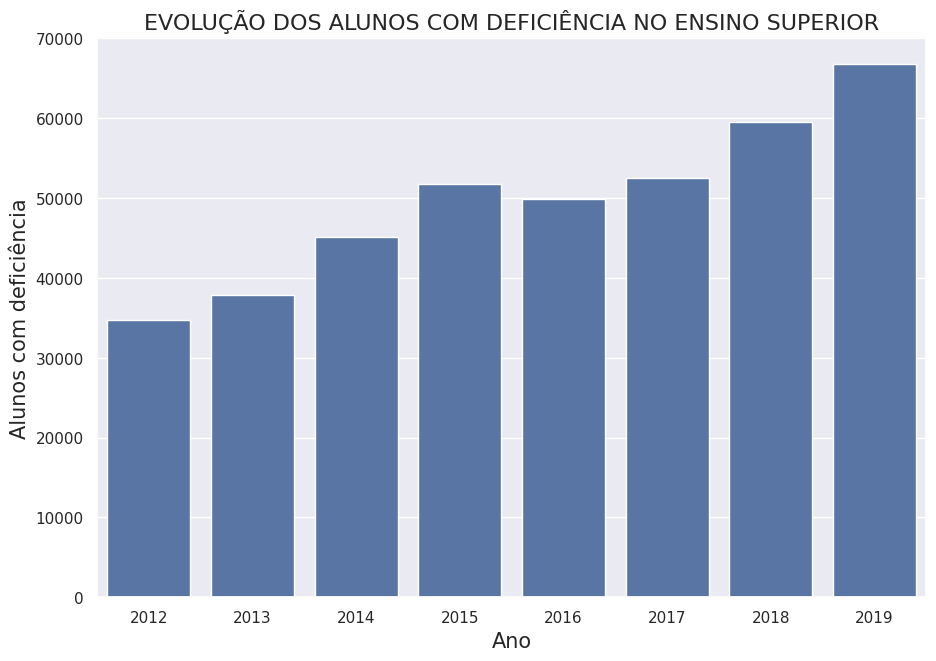

In [5]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(10.7,7.27)})
evolucao_alunoscomdeficiencia = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_COM_DEFICIENCIA')
plt.title("EVOLUÇÃO DOS ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunoscomdeficiencia.png', transparent = True)

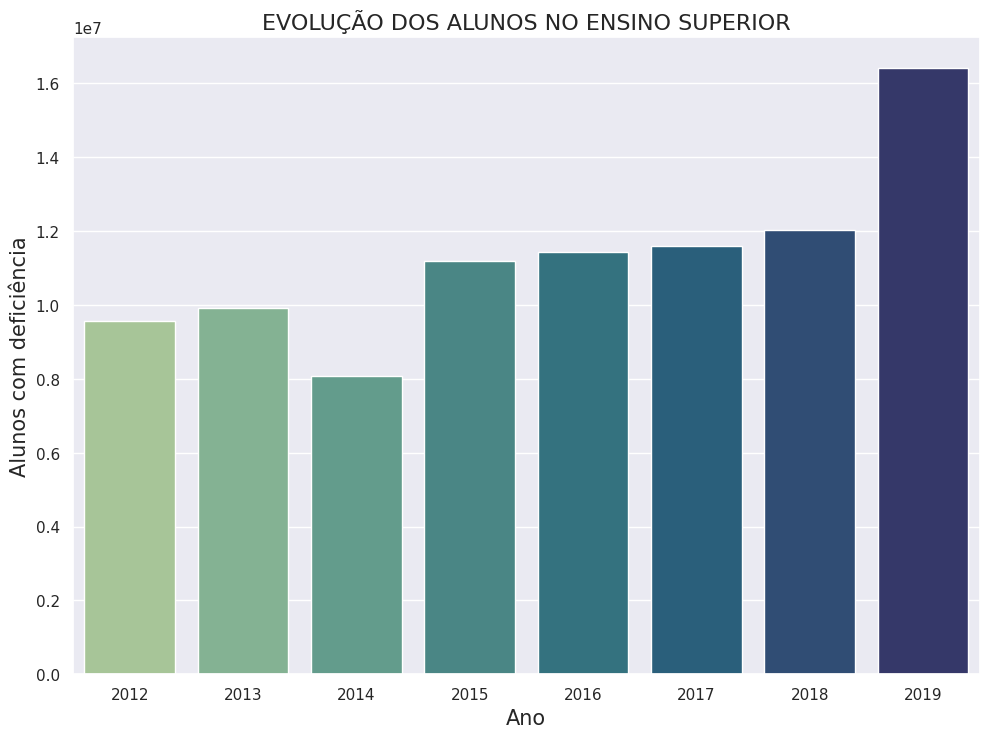

In [6]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunos = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_TOTAL', palette='crest', hue='ANO', legend=False)
plt.title("EVOLUÇÃO DOS ALUNOS NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunos.png', transparent = True)

In [7]:
#Inserindo um percentual de evolução anual no dataframe
df_dados_gerais['VALOR_INICIAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'].shift()
df_dados_gerais['VALOR_FINAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA']
df_dados_gerais['EVOLUCAO_ANUAL'] = (df_dados_gerais['VALOR_FINAL'] - df_dados_gerais['VALOR_INICIAL']) * 100/ df_dados_gerais['VALOR_INICIAL']
df_dados_gerais

ANO  ALUNO_COM_DEFICIENCIA  ALUNO_TOTAL  POPULACAO_TOTAL  PORCENTAGEM  \
0  2012                  34656      9565483        198314934     0.362303   
1  2013                  37796      9929289        200004188     0.380652   
2  2014                  45088      8081369        201717541     0.557925   
3  2015                  51685     11187296        203475683     0.461997   
4  2016                  49813     11449222        205156587     0.435078   
5  2017                  52542     11589194        206804741     0.453371   
6  2018                  59496     12043993        208494900     0.493989   
7  2019                  66750     16425302        210147122     0.406385   

   VALOR_INICIAL  VALOR_FINAL  EVOLUCAO_ANUAL  
0            NaN        34656             NaN  
1        34656.0        37796        9.060480  
2        37796.0        45088       19.293047  
3        45088.0        51685       14.631388  
4        51685.0        49813       -3.621941  
5        49813.0        52542        5.478490  
6        52542.0        59496       13.235126  
7        59496.0        66750       12.192416

In [8]:
#Tipos de dados do dataframe
df_dados_gerais.dtypes

ANO                        int64
ALUNO_COM_DEFICIENCIA      int64
ALUNO_TOTAL                int64
POPULACAO_TOTAL            int64
PORCENTAGEM              float64
VALOR_INICIAL            float64
VALOR_FINAL                int64
EVOLUCAO_ANUAL           float64
dtype: object

In [9]:
#Explorando dados estatísticos do dataframe
df_dados_gerais.describe()

ANO  ALUNO_COM_DEFICIENCIA   ALUNO_TOTAL  POPULACAO_TOTAL  \
count     8.00000                8.00000  8.000000e+00     8.000000e+00   
mean   2015.50000            49728.25000  1.128389e+07     2.042645e+08   
std       2.44949            10609.86997  2.454901e+06     4.147409e+06   
min    2012.00000            34656.00000  8.081369e+06     1.983149e+08   
25%    2013.75000            43265.00000  9.838338e+06     2.012892e+08   
50%    2015.50000            50749.00000  1.131826e+07     2.043161e+08   
75%    2017.25000            54280.50000  1.170289e+07     2.072273e+08   
max    2019.00000            66750.00000  1.642530e+07     2.101471e+08   

       PORCENTAGEM  VALOR_INICIAL  VALOR_FINAL  EVOLUCAO_ANUAL  
count     8.000000       7.000000      8.00000        7.000000  
mean      0.443962   47296.571429  49728.25000       10.038429  
std       0.063326    8725.957328  10609.86997        7.415714  
min       0.362303   34656.000000  34656.00000       -3.621941  
25%       0.399952   41442.000000  43265.00000        7.269485  
50%       0.444224   49813.000000  50749.00000       12.192416  
75%       0.469995   52113.500000  54280.50000       13.933257  
max       0.557925   59496.000000  66750.00000       19.293047

<Figure size 700x400 with 0 Axes>

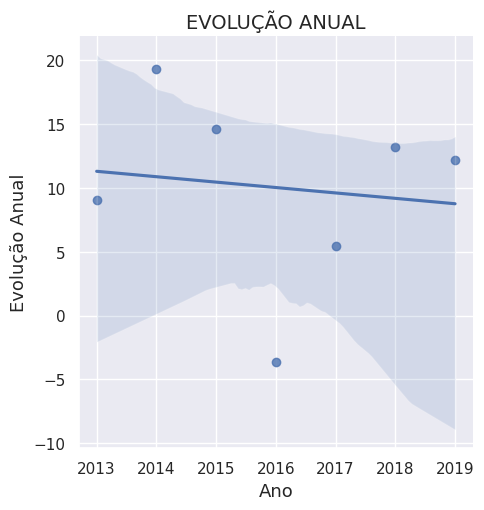

In [10]:
#Visualizando a evolução com um LinePlot
plt.figure(figsize =(7, 4))
sns.lmplot(x='ANO',y='EVOLUCAO_ANUAL',data=df_dados_gerais)
plt.title("EVOLUÇÃO ANUAL", loc="center", fontsize=14)
plt.xlabel('Ano', fontsize=13), plt.ylabel('Evolução Anual', fontsize=13)
plt.savefig('evolucao_anual.png', transparent = True)

#Proporções de pessoas com deficiência no Brasil e no ensino superior

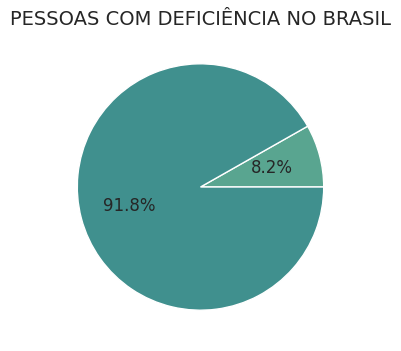

In [11]:
plt.figure(figsize = (5,4))
brasil = [17258000,(210147125-17258000)]
colors = sns.color_palette("crest")[1:]
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", loc="center", fontsize=14)
plt.savefig('pessoas_brasil.png', transparent = True)

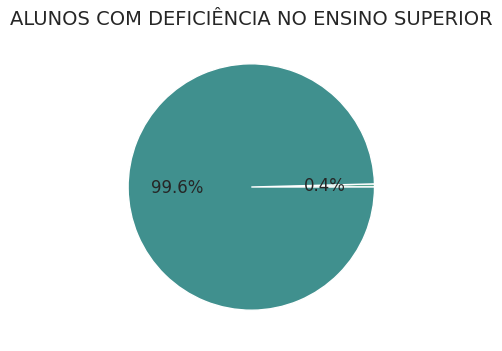

In [12]:
plt.figure(figsize = (5,4))
brasil = [66750,(16525302-66750)]
colors = sns.color_palette("crest")[1:]
plt.pie(brasil, colors=colors, autopct='%.1f%%')
plt.title("ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=14)
plt.savefig('alunos_ensino_superior.png', transparent = True)

#2. Dados do Censo do Ensino Superior (INEP)

#2.1 Censo 2019 - IES

In [6]:
#Carregando os dados das IES
df_ies = pd.read_csv(r"dados/SUP_IES_2019.CSV", sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF'])
df_ies.head()

CO_IES                               NO_IES SG_IES  \
0       1  UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT   
1       2             UNIVERSIDADE DE BRASÍLIA    UNB   
2       3      UNIVERSIDADE FEDERAL DE SERGIPE    UFS   
3       4     UNIVERSIDADE FEDERAL DO AMAZONAS   UFAM   
4       6   UNIVERSIDADE FEDERAL DE OURO PRETO   UFOP   

   TP_CATEGORIA_ADMINISTRATIVA  TP_ORGANIZACAO_ACADEMICA  CO_REGIAO  CO_UF  
0                            1                         1          5     51  
1                            1                         1          5     53  
2                            1                         1          2     28  
3                            1                         1          1     13  
4                            1                         1          3     31

In [15]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF'
    })
df_ies.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           2             UNIVERSIDADE DE BRASÍLIA       UNB   
2           3      UNIVERSIDADE FEDERAL DE SERGIPE       UFS   
3           4     UNIVERSIDADE FEDERAL DO AMAZONAS      UFAM   
4           6   UNIVERSIDADE FEDERAL DE OURO PRETO      UFOP   

   TIPO_CATEGORIA_ADM  TIPO_ORG_ACADEMICA  REGIAO  UF  
0                   1                   1       5  51  
1                   1                   1       5  53  
2                   1                   1       2  28  
3                   1                   1       1  13  
4                   1                   1       3  31

In [16]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           2             UNIVERSIDADE DE BRASÍLIA       UNB   
2           3      UNIVERSIDADE FEDERAL DE SERGIPE       UFS   
3           4     UNIVERSIDADE FEDERAL DO AMAZONAS      UFAM   
4           6   UNIVERSIDADE FEDERAL DE OURO PRETO      UFOP   

   TIPO_CATEGORIA_ADM  TIPO_ORG_ACADEMICA  REGIAO                UF  
0                   1                   1       5       Mato Grosso  
1                   1                   1       5  Distrito Federal  
2                   1                   1       2           Sergipe  
3                   1                   1       1          Amazonas  
4                   1                   1       3      Minas Gerais

In [17]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           2             UNIVERSIDADE DE BRASÍLIA       UNB   
2           3      UNIVERSIDADE FEDERAL DE SERGIPE       UFS   
3           4     UNIVERSIDADE FEDERAL DO AMAZONAS      UFAM   
4           6   UNIVERSIDADE FEDERAL DE OURO PRETO      UFOP   

   TIPO_CATEGORIA_ADM  TIPO_ORG_ACADEMICA        REGIAO                UF  
0                   1                   1  Centro-Oeste       Mato Grosso  
1                   1                   1  Centro-Oeste  Distrito Federal  
2                   1                   1      Nordeste           Sergipe  
3                   1                   1         Norte          Amazonas  
4                   1                   1       Sudeste      Minas Gerais

In [18]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           2             UNIVERSIDADE DE BRASÍLIA       UNB   
2           3      UNIVERSIDADE FEDERAL DE SERGIPE       UFS   
3           4     UNIVERSIDADE FEDERAL DO AMAZONAS      UFAM   
4           6   UNIVERSIDADE FEDERAL DE OURO PRETO      UFOP   

  TIPO_CATEGORIA_ADM  TIPO_ORG_ACADEMICA        REGIAO                UF  
0    Pública Federal                   1  Centro-Oeste       Mato Grosso  
1    Pública Federal                   1  Centro-Oeste  Distrito Federal  
2    Pública Federal                   1      Nordeste           Sergipe  
3    Pública Federal                   1         Norte          Amazonas  
4    Pública Federal                   1       Sudeste      Minas Gerais

In [19]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           2             UNIVERSIDADE DE BRASÍLIA       UNB   
2           3      UNIVERSIDADE FEDERAL DE SERGIPE       UFS   
3           4     UNIVERSIDADE FEDERAL DO AMAZONAS      UFAM   
4           6   UNIVERSIDADE FEDERAL DE OURO PRETO      UFOP   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO                UF  
0    Pública Federal       Universidade  Centro-Oeste       Mato Grosso  
1    Pública Federal       Universidade  Centro-Oeste  Distrito Federal  
2    Pública Federal       Universidade      Nordeste           Sergipe  
3    Pública Federal       Universidade         Norte          Amazonas  
4    Pública Federal       Universidade       Sudeste      Minas Gerais

In [ ]:
#Exportando o dataframe para um arquivo csv
df_ies.to_csv('df_ies.csv', sep=',')

#2.2 Censo 2019 - Cursos

In [7]:
df_curso = pd.read_csv(r'dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso.head()

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

   TP_SITUACAO CO_CINE_ROTULO  TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  ...  \
0            1        0421D01                1.0                     1  ...   
1            1        0311E01                1.0                     1  ...   
2            1        0732E01                1.0                     1  ...   
3            1        0113P01                2.0                     1  ...   
4            1        0923S01                1.0                     1  ...   

   IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  IN_MATERIAL_LIBRAS  \
0                0.0                  0.0                 0.0   
1                NaN                  NaN                 NaN   
2                NaN                  NaN                 NaN   
3                1.0                  0.0                 0.0   
4                0.0                  0.0                 0.0   

   IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  IN_GUIA_INTERPRETE  \
0                   1.0                 0.0                 0.0   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   1.0                 1.0                 1.0   
4                   1.0                 0.0                 0.0   

   IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  QT_MATRICULA_TOTAL  \
0                      0.0                      0.0                 447   
1                      NaN                      NaN                 323   
2                      NaN                      NaN                 248   
3                      1.0                      1.0                 331   
4                      0.0                      0.0                 274   

   QT_CONCLUINTE_TOTAL  
0                   75  
1                   28  
2                   45  
3                   53  
4                   32  

[5 rows x 25 columns]

Avaliando a quantidade de dados faltantes em recursos:

In [21]:
df_curso.shape

(40709, 25)

In [22]:
#Avaliando a quantidade de dados NaN na coluna referente à material digital
df_curso[df_curso['IN_MATERIAL_DIGITAL'].isnull()]

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO  \
1              2019       1   51.0     5103403.0         2   
2              2019       1   51.0     5103403.0         3   
5              2019       1   51.0     5103403.0         8   
6              2019       1   51.0     5103403.0         9   
7              2019       1   51.0     5103403.0        10   
...             ...     ...    ...           ...       ...   
40702          2019   23705   35.0     3516408.0   1465936   
40703          2019   23705   35.0     3516408.0   5001434   
40704          2019   23713   33.0     3300407.0   1503889   
40705          2019   23725   53.0     5300108.0   1454890   
40707          2019   24462   35.0     3520509.0   1487256   

                                        NO_CURSO  TP_SITUACAO CO_CINE_ROTULO  \
1                            CIÊNCIAS ECONÔMICAS            1        0311E01   
2                               ENGENHARIA CIVIL            1        0732E01   
5                             CIÊNCIAS CONTÁBEIS            1        0411C01   
6                                      AGRONOMIA            1        0811A04   
7                           ENGENHARIA FLORESTAL            1        0821E01   
...                                          ...          ...            ...   
40702  GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA            1        0713S01   
40703         GESTÃO DA TECNOLOGIA DA INFORMAÇÃO            1        0612G01   
40704                     SISTEMAS PARA INTERNET            1        0615S03   
40705                             GESTÃO PÚBLICA            1        0413G12   
40707                         PROCESSOS QUÍMICOS            1        0531Q02   

       TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  ...  IN_MATERIAL_AUDIO  \
1                    1.0                     1  ...                NaN   
2                    1.0                     1  ...                NaN   
5                    1.0                     1  ...                NaN   
6                    1.0                     1  ...                NaN   
7                    1.0                     1  ...                NaN   
...                  ...                   ...  ...                ...   
40702                3.0                     1  ...                NaN   
40703                3.0                     1  ...                NaN   
40704                3.0                     1  ...                NaN   
40705                3.0                     1  ...                NaN   
40707                3.0                     1  ...                NaN   

       IN_MATERIAL_BRAILLE  IN_MATERIAL_LIBRAS  IN_DISCIPLINA_LIBRAS  \
1                      NaN                 NaN                   NaN   
2                      NaN                 NaN                   NaN   
5                      NaN                 NaN                   NaN   
6                      NaN                 NaN                   NaN   
7                      NaN                 NaN                   NaN   
...                    ...                 ...                   ...   
40702                  NaN                 NaN                   NaN   
40703                  NaN                 NaN                   NaN   
40704                  NaN                 NaN                   NaN   
40705                  NaN                 NaN                   NaN   
40707                  NaN                 NaN                   NaN   

       IN_TRADUTOR_LIBRAS  IN_GUIA_INTERPRETE  IN_RECURSOS_COMUNICACAO  \
1                     NaN                 NaN                      NaN   
2                     NaN                 NaN                      NaN   
5                     NaN                 NaN                      NaN   
6                     NaN                 NaN                      NaN   
7                     NaN                 NaN                      NaN   
...                   ...                 ...                      ...   
40702                 NaN    

A porcentagem de dados NaN referentes à existência de material digital nos cursos é de 0,08%, ou seja, há 3308 dados NaN num total de 40709.

Foram verificados também a quantidade de dados NaN de todos os outros recursos e o resultado foi o mesmo, 3308 dados NaN OU 0,08% do total de dados registrados em curso.


In [ ]:
#Avaliando a quantidade de dados NaN na coluna referente à material digital
# df_curso[df_curso['IN_MATERIAL_AMPLIADO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_TATIL'].isnull()]
# df_curso[df_curso['IN_MATERIAL_IMPRESSO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_AUDIO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_BRAILLE'].isnull()]
# df_curso[df_curso['IN_MATERIAL_LIBRAS'].isnull()]
# df_curso[df_curso['IN_DISCIPLINA_LIBRAS'].isnull()]
# df_curso[df_curso['IN_TRADUTOR_LIBRAS'].isnull()]
# df_curso[df_curso['IN_GUIA_INTERPRETE'].isnull()]
# df_curso[df_curso['IN_RECURSOS_COMUNICACAO'].isnull()]
# df_curso[df_curso['IN_RECURSOS_INFORMATICA'].isnull()]

In [23]:
#Reduzindo os dados de 'CO_CINE_ROTULO' apenas para a grande área
def grande_area(row):
  return row['CO_CINE_ROTULO'][0:2]
df_curso['CO_CINE_ROTULO'] = df_curso.apply(grande_area, axis=1)
df_curso.head()

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

   TP_SITUACAO CO_CINE_ROTULO  TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  ...  \
0            1             04                1.0                     1  ...   
1            1             03                1.0                     1  ...   
2            1             07                1.0                     1  ...   
3            1             01                2.0                     1  ...   
4            1             09                1.0                     1  ...   

   IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  IN_MATERIAL_LIBRAS  \
0                0.0                  0.0                 0.0   
1                NaN                  NaN                 NaN   
2                NaN                  NaN                 NaN   
3                1.0                  0.0                 0.0   
4                0.0                  0.0                 0.0   

   IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  IN_GUIA_INTERPRETE  \
0                   1.0                 0.0                 0.0   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                   1.0                 1.0                 1.0   
4                   1.0                 0.0                 0.0   

   IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  QT_MATRICULA_TOTAL  \
0                      0.0                      0.0                 447   
1                      NaN                      NaN                 323   
2                      NaN                      NaN                 248   
3                      1.0                      1.0                 331   
4                      0.0                      0.0                 274   

   QT_CONCLUINTE_TOTAL  
0                   75  
1                   28  
2                   45  
3                   53  
4                   32  

[5 rows x 25 columns]

In [24]:
#Substituindo o código pela área de formação geral, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco
area_formacao = {
    '01':'Educação',
    '02':'Artes e Humanidades',
    '03':'Ciências Sociais, Jornalismo e Informação',
    '04':'Negócios, Administração e Direito',
    '05':'Ciências naturais, Matemática e Estatística',
    '06':'Tecnologias da informação e Comunicação (TIC)',
    '07':'Engenharia, Produção e Construção',
    '08':'Agricultura, Veterinária, Recursos florestais e pesqueiros',
    '09':'Saúde e Bem-estar',
    '10':'Serviços',
}
df_curso = df_curso.astype({'CO_CINE_ROTULO':str})
df_curso.CO_CINE_ROTULO = df_curso.CO_CINE_ROTULO.map(area_formacao)
df_curso.head()


NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

   TP_SITUACAO                             CO_CINE_ROTULO  TP_GRAU_ACADEMICO  \
0            1          Negócios, Administração e Direito                1.0   
1            1  Ciências Sociais, Jornalismo e Informação                1.0   
2            1          Engenharia, Produção e Construção                1.0   
3            1                                   Educação                2.0   
4            1                          Saúde e Bem-estar                1.0   

   TP_MODALIDADE_ENSINO  ...  IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  \
0                     1  ...                0.0                  0.0   
1                     1  ...                NaN                  NaN   
2                     1  ...                NaN                  NaN   
3                     1  ...                1.0                  0.0   
4                     1  ...                0.0                  0.0   

   IN_MATERIAL_LIBRAS  IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  \
0                 0.0                   1.0                 0.0   
1                 NaN                   NaN                 NaN   
2                 NaN                   NaN                 NaN   
3                 0.0                   1.0                 1.0   
4                 0.0                   1.0                 0.0   

   IN_GUIA_INTERPRETE  IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  \
0                 0.0                      0.0                      0.0   
1                 NaN                      NaN                      NaN   
2                 NaN                      NaN                      NaN   
3                 1.0                      1.0                      1.0   
4                 0.0                      0.0                      0.0   

   QT_MATRICULA_TOTAL  QT_CONCLUINTE_TOTAL  
0                 447                   75  
1                 323                   28  
2                 248                   45  
3                 331                   53  
4                 274                   32  

[5 rows x 25 columns]

Para discutir com o grupo:

Problemas com os dados do Censo, como:

1. Vários cursos do censo não condizem com os códigos de grande área, como:

*   linha 1: DIREITO em "Ciências, Matemática e Computação"
*   linha 3: ENGENHARIA CIVIL em "Saúde e Bem Estar Social"

2. alguns dados não informados, como:

*   linha 4: SERVIÇO SOCIAL




In [25]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

    TP_SITUACAO                             CO_CINE_ROTULO  TP_GRAU_ACADEMICO  \
0  Em atividade          Negócios, Administração e Direito                1.0   
1  Em atividade  Ciências Sociais, Jornalismo e Informação                1.0   
2  Em atividade          Engenharia, Produção e Construção                1.0   
3  Em atividade                                   Educação                2.0   
4  Em atividade                          Saúde e Bem-estar                1.0   

   TP_MODALIDADE_ENSINO  ...  IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  \
0                     1  ...                0.0                  0.0   
1                     1  ...                NaN                  NaN   
2                     1  ...                NaN                  NaN   
3                     1  ...                1.0                  0.0   
4                     1  ...                0.0                  0.0   

   IN_MATERIAL_LIBRAS  IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  \
0                 0.0                   1.0                 0.0   
1                 NaN                   NaN                 NaN   
2                 NaN                   NaN                 NaN   
3                 0.0                   1.0                 1.0   
4                 0.0                   1.0                 0.0   

   IN_GUIA_INTERPRETE  IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  \
0                 0.0                      0.0                      0.0   
1                 NaN                      NaN                      NaN   
2                 NaN                      NaN                      NaN   
3                 1.0                      1.0                      1.0   
4                 0.0                      0.0                      0.0   

   QT_MATRICULA_TOTAL  QT_CONCLUINTE_TOTAL  
0                 447                   75  
1                 323                   28  
2                 248                   45  
3                 331                   53  
4                 274                   32  

[5 rows x 25 columns]

In [26]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

    TP_SITUACAO                             CO_CINE_ROTULO TP_GRAU_ACADEMICO  \
0  Em atividade          Negócios, Administração e Direito       Bacharelado   
1  Em atividade  Ciências Sociais, Jornalismo e Informação       Bacharelado   
2  Em atividade          Engenharia, Produção e Construção       Bacharelado   
3  Em atividade                                   Educação      Licenciatura   
4  Em atividade                          Saúde e Bem-estar       Bacharelado   

   TP_MODALIDADE_ENSINO  ...  IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  \
0                     1  ...                0.0                  0.0   
1                     1  ...                NaN                  NaN   
2                     1  ...                NaN                  NaN   
3                     1  ...                1.0                  0.0   
4                     1  ...                0.0                  0.0   

   IN_MATERIAL_LIBRAS  IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  \
0                 0.0                   1.0                 0.0   
1                 NaN                   NaN                 NaN   
2                 NaN                   NaN                 NaN   
3                 0.0                   1.0                 1.0   
4                 0.0                   1.0                 0.0   

   IN_GUIA_INTERPRETE  IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  \
0                 0.0                      0.0                      0.0   
1                 NaN                      NaN                      NaN   
2                 NaN                      NaN                      NaN   
3                 1.0                      1.0                      1.0   
4                 0.0                      0.0                      0.0   

   QT_MATRICULA_TOTAL  QT_CONCLUINTE_TOTAL  
0                 447                   75  
1                 323                   28  
2                 248                   45  
3                 331                   53  
4                 274                   32  

[5 rows x 25 columns]

In [ ]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

NU_ANO_CENSO  CO_IES  CO_UF  CO_MUNICIPIO  CO_CURSO             NO_CURSO  \
0          2019       1   51.0     5103403.0         1              DIREITO   
1          2019       1   51.0     5103403.0         2  CIÊNCIAS ECONÔMICAS   
2          2019       1   51.0     5103403.0         3     ENGENHARIA CIVIL   
3          2019       1   51.0     5103403.0         6            PEDAGOGIA   
4          2019       1   51.0     5103403.0         7       SERVIÇO SOCIAL   

    TP_SITUACAO                             CO_CINE_ROTULO TP_GRAU_ACADEMICO  \
0  Em atividade          Negócios, Administração e Direito       Bacharelado   
1  Em atividade  Ciências Sociais, Jornalismo e Informação       Bacharelado   
2  Em atividade          Engenharia, Produção e Construção       Bacharelado   
3  Em atividade                                   Educação      Licenciatura   
4  Em atividade                          Saúde e Bem-estar       Bacharelado   

  TP_MODALIDADE_ENSINO  ...  IN_MATERIAL_AUDIO  IN_MATERIAL_BRAILLE  \
0           Presencial  ...                0.0                  0.0   
1           Presencial  ...                NaN                  NaN   
2           Presencial  ...                NaN                  NaN   
3           Presencial  ...                1.0                  0.0   
4           Presencial  ...                0.0                  0.0   

   IN_MATERIAL_LIBRAS  IN_DISCIPLINA_LIBRAS  IN_TRADUTOR_LIBRAS  \
0                 0.0                   1.0                 0.0   
1                 NaN                   NaN                 NaN   
2                 NaN                   NaN                 NaN   
3                 0.0                   1.0                 1.0   
4                 0.0                   1.0                 0.0   

   IN_GUIA_INTERPRETE  IN_RECURSOS_COMUNICACAO  IN_RECURSOS_INFORMATICA  \
0                 0.0                      0.0                      0.0   
1                 NaN                      NaN                      NaN   
2                 NaN                      NaN                      NaN   
3                 1.0                      1.0                      1.0   
4                 0.0                      0.0                      0.0   

   QT_MATRICULA_TOTAL  QT_CONCLUINTE_TOTAL  
0                 447                   75  
1                 323                   28  
2                 248                   45  
3                 331                   53  
4                 274                   32  

[5 rows x 25 columns]

In [27]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'CO_CINE_ROTULO':'AREA_FORMACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso.head()

ANO_CENSO  CODIGO_IES  CO_UF  CO_MUNICIPIO  CODIGO_CURSO  \
0       2019           1   51.0     5103403.0             1   
1       2019           1   51.0     5103403.0             2   
2       2019           1   51.0     5103403.0             3   
3       2019           1   51.0     5103403.0             6   
4       2019           1   51.0     5103403.0             7   

            NOME_CURSO      SITUACAO  \
0              DIREITO  Em atividade   
1  CIÊNCIAS ECONÔMICAS  Em atividade   
2     ENGENHARIA CIVIL  Em atividade   
3            PEDAGOGIA  Em atividade   
4       SERVIÇO SOCIAL  Em atividade   

                               AREA_FORMACAO TIPO_GRAU_ACADEMICO  \
0          Negócios, Administração e Direito         Bacharelado   
1  Ciências Sociais, Jornalismo e Informação         Bacharelado   
2          Engenharia, Produção e Construção         Bacharelado   
3                                   Educação        Licenciatura   
4                          Saúde e Bem-estar         Bacharelado   

   MODALIDADE_ENSINO  ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  \
0                  1  ...             0.0               0.0              0.0   
1                  1  ...             NaN               NaN              NaN   
2                  1  ...             NaN               NaN              NaN   
3                  1  ...             1.0               0.0              0.0   
4                  1  ...             0.0               0.0              0.0   

   DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0                1.0              0.0              0.0                   0.0   
1                NaN              NaN              NaN                   NaN   
2                NaN              NaN              NaN                   NaN   
3                1.0              1.0              1.0                   1.0   
4                1.0              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
1                   NaN                      323                      28  
2                   NaN                      248                      45  
3                   1.0                      331                      53  
4                   0.0                      274                      32  

[5 rows x 25 columns]

In [28]:
#Contando a quantidade de curso por IES
num_alunos_ies = df_curso.groupby('CODIGO_IES')[['NUM_ALUNOS_MATRICULADOS']].sum()
num_alunos_ies

NUM_ALUNOS_MATRICULADOS
CODIGO_IES                         
1                             20633
2                             36292
3                             24937
4                             28424
5                             28716
...                             ...
23713                            92
23725                            35
23867                           169
24462                            86
24672                            66

[2608 rows x 1 columns]

In [ ]:
#Transformando num dataframe
df_alunos_por_ies = pd.DataFrame(num_alunos_ies,columns=['NUM_ALUNOS_MATRICULADOS'])
df_alunos_por_ies['CODIGO_IES'] = num_alunos_ies.index
df_alunos_por_ies.index = range(len(num_alunos_ies))
df_alunos_por_ies.head()

NUM_ALUNOS_MATRICULADOS  CODIGO_IES
0                    20633           1
1                    36292           2
2                    24937           3
3                    28424           4
4                    28716           5

In [29]:
#Contando a quantidade de curso por IES
num_cursos_por_ies = df_curso.groupby('CODIGO_IES')[['CODIGO_CURSO']].count()
num_cursos_por_ies

CODIGO_CURSO
CODIGO_IES              
1                    114
2                    149
3                    116
4                    107
5                    100
...                  ...
23713                  1
23725                  1
23867                  1
24462                  1
24672                  1

[2608 rows x 1 columns]

In [30]:
#Transformando num dataframe
df_cursos_por_ies = pd.DataFrame(num_cursos_por_ies,columns=['CODIGO_CURSO'])
df_cursos_por_ies['CODIGO_IES'] = num_cursos_por_ies.index
df_cursos_por_ies.index = range(len(num_cursos_por_ies))
df_cursos_por_ies.head()

CODIGO_CURSO  CODIGO_IES
0           114           1
1           149           2
2           116           3
3           107           4
4           100           5

In [31]:
#Renomeando colunas
df_cursos_por_ies = df_cursos_por_ies.rename(columns={
    'CODIGO_CURSO':'NUM_CURSOS'})
df_cursos_por_ies.head(5)

NUM_CURSOS  CODIGO_IES
0         114           1
1         149           2
2         116           3
3         107           4
4         100           5

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso.csv', sep=',')

#2.3 Censo 2019 - Alunos com deficiência

In [32]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', encoding='latin-1')
#df_aluno.head()

Avaliando so campos de surdez, cegueira e surdocegueira

In [33]:
df_ad = df_aluno[['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_ad.loc[df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1]

IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  \
500                        0.0                    0.0   
512                        0.0                    0.0   
1879                       0.0                    0.0   
2406                       0.0                    0.0   
2432                       0.0                    0.0   
...                        ...                    ...   
59498                      0.0                    0.0   
60444                      0.0                    0.0   
66163                      0.0                    0.0   
66357                      0.0                    0.0   
66478                      0.0                    0.0   

       IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  \
500                           0.0                      0.0   
512                           0.0                      0.0   
1879                          0.0                      0.0   
2406                          0.0                      0.0   
2432                          0.0                      0.0   
...                           ...                      ...   
59498                         0.0                      0.0   
60444                         0.0                      0.0   
66163                         0.0                      0.0   
66357                         0.0                      0.0   
66478                         0.0                      0.0   

       IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
500                      0.0                           1.0   
512                      0.0                           1.0   
1879                     0.0                           1.0   
2406                     0.0                           1.0   
2432                     0.0                           1.0   
...                      ...                           ...   
59498                    0.0                           1.0   
60444                    0.0                           1.0   
66163                    0.0                           1.0   
66357                    0.0                           1.0   
66478                    0.0                           1.0   

       IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
500                           0.0                      0.0   
512                           0.0                      0.0   
1879                          0.0                      0.0   
2406                          0.0                      0.0   
2432                          0.0                      0.0   
...                           ...                      ...   
59498                         0.0                      0.0   
60444                         0.0                      0.0   
66163                         0.0                      0.0   
66357                         0.0                      0.0   
66478                         0.0                      0.0   

       IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
500                            0.0             0.0                       0.0   
512                            0.0             0.0                       0.0   
1879                           0.0             0.0                       0.0   
2406                           0.0             0.0                       0.0   
2432                           0.0             0.0                       0.0   
...                            ...             ...                       ...   
59498                          0.0             0.0                       0.0   
60444                          0.0             0.0                       0.0   
66163                          0.0             0.0                       0.0   
66357                          0.0             0.0                       0.0   
66478                          0.0             0.0                       0.0   

       IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  
500                     0.0                             0.0  
51

In [34]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDEZ'] == 1) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 1)]

Empty DataFrame
Columns: [IN_DEFICIENCIA_AUDITIVA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_INTELECTUAL, IN_DEFICIENCIA_MULTIPLA, IN_DEFICIENCIA_SURDEZ, IN_DEFICIENCIA_SURDOCEGUEIRA, IN_DEFICIENCIA_BAIXA_VISAO, IN_DEFICIENCIA_CEGUEIRA, IN_DEFICIENCIA_SUPERDOTACAO, IN_TGD_AUTISMO, IN_TGD_SINDROME_ASPERGER, IN_TGD_SINDROME_RETT, IN_TGD_TRANSTOR_DESINTEGRATIVO]
Index: []

Com isso observamos que não existe alunos com ambas as colunas deficiencia surdez e dificiencia cegueira com resultado de verdadeiro, ou seja, se um aluno tiver ambas as deficiencias apenas a coluna 'IN_DEFICIENCIA_SURDOCEGUEIRA' admitirá verdadeiro.

Além disso um estudante com a deficiencia de surdocegueira apesar de ter duas deficiencias, não tem a coluna 'IN_DEFICIENCIA_MULTIPLA' como verdadeira.

In [35]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1) & (df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1)]

IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  \
4222                       0.0                    0.0   
8159                       0.0                    1.0   
9359                       0.0                    1.0   
17008                      0.0                    0.0   
18575                      0.0                    1.0   
19069                      0.0                    1.0   
19088                      0.0                    0.0   
19584                      0.0                    0.0   
33717                      0.0                    1.0   
33726                      0.0                    1.0   
33745                      0.0                    1.0   
33750                      0.0                    1.0   
33762                      0.0                    1.0   
36905                      0.0                    1.0   
41194                      0.0                    0.0   
44517                      0.0                    1.0   
44534                      0.0                    0.0   
53211                      0.0                    1.0   
53215                      0.0                    1.0   

       IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  \
4222                          0.0                      1.0   
8159                          0.0                      1.0   
9359                          1.0                      1.0   
17008                         1.0                      1.0   
18575                         1.0                      1.0   
19069                         1.0                      1.0   
19088                         0.0                      1.0   
19584                         1.0                      1.0   
33717                         0.0                      1.0   
33726                         0.0                      1.0   
33745                         0.0                      1.0   
33750                         0.0                      1.0   
33762                         0.0                      1.0   
36905                         0.0                      1.0   
41194                         1.0                      1.0   
44517                         0.0                      1.0   
44534                         1.0                      1.0   
53211                         1.0                      1.0   
53215                         1.0                      1.0   

       IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
4222                     0.0                           1.0   
8159                     0.0                           1.0   
9359                     0.0                           1.0   
17008                    0.0                           1.0   
18575                    0.0                           1.0   
19069                    0.0                           1.0   
19088                    0.0                           1.0   
19584                    0.0                           1.0   
33717                    0.0                           1.0   
33726                    0.0                           1.0   
33745                    0.0                           1.0   
33750                    0.0                           1.0   
33762                    0.0                           1.0   
36905                    0.0                           1.0   
41194                    0.0                           1.0   
44517                    0.0                           1.0   
44534                    0.0                           1.0   
53211                    0.0                           1.0   
53215                    0.0                           1.0   

       IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
4222                          0.0                      0.0   
8159                          0.0                      0.0   
9359                          0.0                      0.0   
17008                         0.0                      0.0   
18575                         0.0                      0.0   
19069       

Conclui-se que para um aluno com a deficiencia surdez e cegueira obter verdadeiro para a coluna 'IN_DEFICIENCIA_MULTIPLA', o estudante tem que ter alguma outra deficiencia além da surdez e cegueira.

In [36]:
df_ad.loc[df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1]

IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  \
31                         0.0                    0.0   
229                        0.0                    0.0   
240                        0.0                    0.0   
316                        0.0                    0.0   
362                        0.0                    0.0   
...                        ...                    ...   
66467                      0.0                    0.0   
66473                      0.0                    0.0   
66482                      0.0                    0.0   
66484                      0.0                    0.0   
66487                      0.0                    0.0   

       IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  \
31                            0.0                      1.0   
229                           0.0                      1.0   
240                           0.0                      1.0   
316                           0.0                      1.0   
362                           0.0                      1.0   
...                           ...                      ...   
66467                         0.0                      1.0   
66473                         0.0                      1.0   
66482                         0.0                      1.0   
66484                         0.0                      1.0   
66487                         0.0                      1.0   

       IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
31                       0.0                           0.0   
229                      0.0                           0.0   
240                      0.0                           0.0   
316                      0.0                           0.0   
362                      0.0                           0.0   
...                      ...                           ...   
66467                    0.0                           0.0   
66473                    0.0                           0.0   
66482                    0.0                           0.0   
66484                    0.0                           0.0   
66487                    0.0                           0.0   

       IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
31                            0.0                      0.0   
229                           0.0                      0.0   
240                           0.0                      0.0   
316                           0.0                      0.0   
362                           0.0                      0.0   
...                           ...                      ...   
66467                         0.0                      0.0   
66473                         0.0                      0.0   
66482                         0.0                      0.0   
66484                         0.0                      0.0   
66487                         0.0                      0.0   

       IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
31                             0.0             0.0                       0.0   
229                            0.0             0.0                       0.0   
240                            0.0             0.0                       0.0   
316                            0.0             0.0                       0.0   
362                            0.0             0.0                       0.0   
...                            ...             ...                       ...   
66467                          0.0             0.0                       0.0   
66473                          0.0             0.0                       0.0   
66482                          0.0             0.0                       0.0   
66484                          0.0             0.0                       0.0   
66487                          0.0             0.0                       0.0   

       IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  
31                      0.0                             0.0  
22

In [37]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 0) & (df_aluno['IN_DEFICIENCIA_FISICA'] == 0) & (df_aluno['IN_DEFICIENCIA_INTELECTUAL'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDEZ'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_BAIXA_VISAO'] == 0) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_SUPERDOTACAO'] == 0) & (df_aluno['IN_TGD_AUTISMO'] == 0) & (df_aluno['IN_TGD_SINDROME_ASPERGER'] == 0) & (df_aluno['IN_TGD_SINDROME_RETT'] == 0) & (df_aluno['IN_TGD_TRANSTOR_DESINTEGRATIVO'] == 0)]

IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  \
31                         0.0                    0.0   
229                        0.0                    0.0   
240                        0.0                    0.0   
316                        0.0                    0.0   
362                        0.0                    0.0   
...                        ...                    ...   
66467                      0.0                    0.0   
66473                      0.0                    0.0   
66482                      0.0                    0.0   
66484                      0.0                    0.0   
66487                      0.0                    0.0   

       IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  \
31                            0.0                      1.0   
229                           0.0                      1.0   
240                           0.0                      1.0   
316                           0.0                      1.0   
362                           0.0                      1.0   
...                           ...                      ...   
66467                         0.0                      1.0   
66473                         0.0                      1.0   
66482                         0.0                      1.0   
66484                         0.0                      1.0   
66487                         0.0                      1.0   

       IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
31                       0.0                           0.0   
229                      0.0                           0.0   
240                      0.0                           0.0   
316                      0.0                           0.0   
362                      0.0                           0.0   
...                      ...                           ...   
66467                    0.0                           0.0   
66473                    0.0                           0.0   
66482                    0.0                           0.0   
66484                    0.0                           0.0   
66487                    0.0                           0.0   

       IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
31                            0.0                      0.0   
229                           0.0                      0.0   
240                           0.0                      0.0   
316                           0.0                      0.0   
362                           0.0                      0.0   
...                           ...                      ...   
66467                         0.0                      0.0   
66473                         0.0                      0.0   
66482                         0.0                      0.0   
66484                         0.0                      0.0   
66487                         0.0                      0.0   

       IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
31                             0.0             0.0                       0.0   
229                            0.0             0.0                       0.0   
240                            0.0             0.0                       0.0   
316                            0.0             0.0                       0.0   
362                            0.0             0.0                       0.0   
...                            ...             ...                       ...   
66467                          0.0             0.0                       0.0   
66473                          0.0             0.0                       0.0   
66482                          0.0             0.0                       0.0   
66484                          0.0             0.0                       0.0   
66487                          0.0             0.0                       0.0   

       IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  
31                      0.0                             0.0  
22

Entretando a maioria dos alunos com deficiencia multipla as demais colunas estão preenchida como False, ou seja, apenas exista a informação que os alunos tem deficiencia multipla porem não tem a informação de quais deficiencias eles tem especificamente. E esses alunos compõem grande parte dos dados sendo 919 de um total de 1201, que é aproximadamente 76%


In [38]:
df_aluno.dtypes

NU_ANO_CENSO                       int64
CO_IES                             int64
TP_CATEGORIA_ADMINISTRATIVA        int64
TP_ORGANIZACAO_ACADEMICA           int64
CO_CURSO                           int64
                                  ...   
IN_CONCLUINTE                      int64
IN_INGRESSO_TOTAL                  int64
IN_INGRESSO_VAGA_NOVA              int64
IN_INGRESSO_PROCESSO_SELETIVO    float64
NU_ANO_INGRESSO                    int64
Length: 105, dtype: object

Para discutir com o grupo:

Observação: Não vamos utilizar os dados de "CO_UF_NASCIMENTO" e "CO_MUNICIPIO_NASCIMENTO", por terem muitos campos vazios e porque nosso trabalho analisará os dados sobre municípios onde os alunos estudam e não onde os alunos nasceram.

In [39]:
df_aluno.head(3)

NU_ANO_CENSO  CO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0          2019       1                            1   
1          2019       1                            1   
2          2019       1                            1   

   TP_ORGANIZACAO_ACADEMICA  CO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1         1            NaN       3.0   
1                         1         1            NaN       3.0   
2                         1         1            NaN       3.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                            NaN             NaN   
1                     NaN                            NaN             NaN   
2                     NaN                            NaN             NaN   

   CO_PAIS_DESTINO  IN_MATRICULA  IN_CONCLUINTE  IN_INGRESSO_TOTAL  \
0              NaN             1              0                  0   
1              NaN             1              0                  1   
2              NaN             1              0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  

[3 rows x 105 columns]

In [ ]:
#Selecionanado apenas as colunas que serão analisadas no trabalho
df_aluno = pd.read_csv('', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_CURSO','CO_IES','ID_ALUNO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','CO_PAIS_ORIGEM','TP_SITUACAO','IN_MATRICULA','IN_CONCLUINTE','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO','IN_RESERVA_DEFICIENCIA'])
df_aluno.head()

NU_ANO_CENSO  CO_IES  CO_CURSO                          ID_ALUNO  \
0          2019       1         1  BD8D4626244A839A308F0AA4240CE43F   
1          2019       1         1  5EF5CD63C43D9B59200FDFCD2E1ACE36   
2          2019       1         1  2E56350182EF8B7FFF2C114F0B52B7DD   
3          2019       1         1  70F6C562984F1CC4EB1A287A8EC1AF9F   
4          2019       1         1  C6DDD99D39270AB04FE9382687D38C31   

   TP_COR_RACA  TP_SEXO  NU_ANO_NASCIMENTO  CO_PAIS_ORIGEM  IN_DEFICIENCIA  \
0            3        2               1989              76               1   
1            3        1               1982              76               1   
2            3        2               1978              76               1   
3            3        1               1984              76               1   
4            3        2               1992              76               1   

   IN_DEFICIENCIA_AUDITIVA  ...  IN_DEFICIENCIA_CEGUEIRA  \
0                      0.0  ...                      0.0   
1                      0.0  ...                      0.0   
2                      0.0  ...                      0.0   
3                      1.0  ...                      0.0   
4                      0.0  ...                      0.0   

   IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
0                          0.0             0.0                       0.0   
1                          0.0             0.0                       0.0   
2                          0.0             0.0                       0.0   
3                          0.0             0.0                       0.0   
4                          0.0             0.0                       0.0   

   IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  TP_SITUACAO  \
0                   0.0                             0.0            2   
1                   0.0                             0.0            2   
2                   0.0                             0.0            2   
3                   0.0                             0.0            3   
4                   0.0                             0.0            2   

   IN_RESERVA_DEFICIENCIA  IN_MATRICULA  IN_CONCLUINTE  
0                     1.0             1              0  
1                     1.0             1              0  
2                     1.0             1              0  
3                     1.0             0              0  
4                     1.0             1              0  

[5 rows x 26 columns]

In [40]:
#Renomeando as colunas
df_aluno = df_aluno.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'ID_ALUNO':'CODIGO_INEP',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'ANO_NASCIMENTO',
    'CO_PAIS_ORIGEM':'PAIS_DE_ORIGEM',
    'TP_SITUACAO':'VINCULO_CURSO',
    'IN_RESERVA_DEFICIENCIA':'INGRESSO_RESERVA_DEFICIENCIA',
    'IN_MATRICULA':'ALUNO_MATRICULADO',
    'IN_CONCLUINTE':'ALUNO_CONCLUINTE'
    })
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
3       2019           1                            1   
4       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
3                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
3                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                            NaN             NaN   
1                     NaN                            NaN             NaN   
2                     NaN                            NaN             NaN   
3                     NaN                            NaN             NaN   
4                     NaN                            NaN             NaN   

   CO_PAIS_DESTINO  ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0              NaN                  1                 0                  0   
1              NaN                  1                 0                  1   
2              NaN                  1                 0                  0   
3              NaN                  0                 0                  0   
4              NaN                  1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
3                      0                            NaN             2018  
4                      0                            NaN             2018  

[5 rows x 105 columns]

In [41]:
#Verificando se há CODIGO_INEP duplicaado
df_aluno['CODIGO_INEP'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
66745     True
66746    False
66747     True
66748    False
66749    False
Name: CODIGO_INEP, Length: 66750, dtype: bool

Observação: Como há códigos do inep duplicados para alunos com dados diferentes, resolvemos não considerar essa coluna como identificadora e colocar uma id AI no banco de dados como chave primaria do aluno.

In [42]:
#Excluindo a coluna código inep
df_aluno = df_aluno.drop(columns=['CODIGO_INEP'])

In [43]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_aluno = df_aluno.astype({'RACA':str})
df_aluno.RACA = df_aluno.RACA.map(raca)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
3       2019           1                            1   
4       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
3                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
3                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
3                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO  ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                  1                 0                  0   
1             NaN                  1                 0                  1   
2             NaN                  1                 0                  0   
3             NaN                  0                 0                  0   
4             NaN                  1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
3                      0                            NaN             2018  
4                      0                            NaN             2018  

[5 rows x 104 columns]

In [44]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_aluno = df_aluno.astype({'GENERO':str})
df_aluno.GENERO = df_aluno.GENERO.map(genero)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
3       2019           1                            1   
4       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
3                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
3                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
3                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                 1                 0                  0   
1             NaN                 1                 0                  1   
2             NaN                 1                 0                  0   
3             NaN                 0                 0                  0   
4             NaN                 1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
3                      0                            NaN             2018  
4                      0                            NaN             2018  

[5 rows x 104 columns]

In [45]:
#Substituindo código por situação do vínculo do aluno com o curso
vinculo = {
    '1':'Falta',
    '2':'Cursando',
    '3':'Matrícula trancada',
    '4':'Desvinculado do curso',
    '5':'Transferido para outro curso da mesma IES',
    '6':'Formado',
    '7':'Falecido',
}
df_aluno = df_aluno.astype({'VINCULO_CURSO':str})
df_aluno.VINCULO_CURSO = df_aluno.VINCULO_CURSO.map(vinculo)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
3       2019           1                            1   
4       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
3                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
3                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
3                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                 1                 0                  0   
1             NaN                 1                 0                  1   
2             NaN                 1                 0                  0   
3             NaN                 0                 0                  0   
4             NaN                 1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
3                      0                            NaN             2018  
4                      0                            NaN             2018  

[5 rows x 104 columns]

Considerando apenas os alunos que estão com o vínculo "Cursando" em nossa análise

In [46]:
df_aluno = df_aluno.loc[df_aluno['VINCULO_CURSO'] == 'Cursando']
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   
5                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                 1                 0                  0   
1             NaN                 1                 0                  1   
2             NaN                 1                 0                  0   
4             NaN                 1                 0                  0   
5             NaN                 1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
4                      0                            NaN             2018  
5                      0                            NaN             2018  

[5 rows x 104 columns]

In [47]:
#Substituindo código por informação se o aluno ingressou no ensino superior a partir de vagas reservadas a pessoas com deficiência
reserva_vagas = {
    '0.0':'Não',
    '1.0':'Sim',
}
df_aluno = df_aluno.astype({'INGRESSO_RESERVA_DEFICIENCIA':str})
df_aluno.INGRESSO_RESERVA_DEFICIENCIA = df_aluno.INGRESSO_RESERVA_DEFICIENCIA.map(reserva_vagas)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   
5                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                 1                 0                  0   
1             NaN                 1                 0                  1   
2             NaN                 1                 0                  0   
4             NaN                 1                 0                  0   
5             NaN                 1                 0                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
4                      0                            NaN             2018  
5                      0                            NaN             2018  

[5 rows x 104 columns]

In [48]:
#Verificando se todos os alunos estão matriculados regularmente
df_aluno.loc[df_aluno['ALUNO_MATRICULADO'] == '1']

Empty DataFrame
Columns: [ANO_CENSO, CODIGO_IES, TP_CATEGORIA_ADMINISTRATIVA, TP_ORGANIZACAO_ACADEMICA, CODIGO_CURSO, CO_CURSO_POLO, TP_TURNO, TP_GRAU_ACADEMICO, TP_MODALIDADE_ENSINO, TP_NIVEL_ACADEMICO, CO_CINE_ROTULO, CO_ALUNO_CURSO, CO_ALUNO_CURSO_ORIGEM, RACA, GENERO, ANO_NASCIMENTO, NU_MES_NASCIMENTO, NU_DIA_NASCIMENTO, NU_IDADE, TP_NACIONALIDADE, PAIS_DE_ORIGEM, CO_UF_NASCIMENTO, CO_MUNICIPIO_NASCIMENTO, IN_DEFICIENCIA, IN_DEFICIENCIA_AUDITIVA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_INTELECTUAL, IN_DEFICIENCIA_MULTIPLA, IN_DEFICIENCIA_SURDEZ, IN_DEFICIENCIA_SURDOCEGUEIRA, IN_DEFICIENCIA_BAIXA_VISAO, IN_DEFICIENCIA_CEGUEIRA, IN_DEFICIENCIA_SUPERDOTACAO, IN_TGD_AUTISMO, IN_TGD_SINDROME_ASPERGER, IN_TGD_SINDROME_RETT, IN_TGD_TRANSTOR_DESINTEGRATIVO, VINCULO_CURSO, QT_CARGA_HORARIA_TOTAL, QT_CARGA_HORARIA_INTEG, DT_INGRESSO_CURSO, IN_INGRESSO_VESTIBULAR, IN_INGRESSO_ENEM, IN_INGRESSO_AVALIACAO_SERIADA, IN_INGRESSO_SELECAO_SIMPLIFICA, IN_INGRESSO_OUTRO_TIPO_SELECAO, IN_INGRESSO_VAGA_REMANESC, IN_INGRESSO_VAGA_PROG_ESPECIAL, IN_INGRESSO_TRANSF_EXOFFICIO, IN_INGRESSO_DECISAO_JUDICIAL, IN_INGRESSO_CONVENIO_PECG, IN_INGRESSO_EGRESSO, IN_INGRESSO_OUTRA_FORMA, IN_RESERVA_VAGAS, IN_RESERVA_ETNICO, INGRESSO_RESERVA_DEFICIENCIA, IN_RESERVA_ENSINO_PUBLICO, IN_RESERVA_RENDA_FAMILIAR, IN_RESERVA_OUTRA, IN_FINANCIAMENTO_ESTUDANTIL, IN_FIN_REEMB_FIES, IN_FIN_REEMB_ESTADUAL, IN_FIN_REEMB_MUNICIPAL, IN_FIN_REEMB_PROG_IES, IN_FIN_REEMB_ENT_EXTERNA, IN_FIN_REEMB_OUTRA, IN_FIN_NAOREEMB_PROUNI_INTEGR, IN_FIN_NAOREEMB_PROUNI_PARCIAL, IN_FIN_NAOREEMB_ESTADUAL, IN_FIN_NAOREEMB_MUNICIPAL, IN_FIN_NAOREEMB_PROG_IES, IN_FIN_NAOREEMB_ENT_EXTERNA, IN_FIN_NAOREEMB_OUTRA, IN_APOIO_SOCIAL, IN_APOIO_ALIMENTACAO, IN_APOIO_BOLSA_PERMANENCIA, IN_APOIO_BOLSA_TRABALHO, IN_APOIO_MATERIAL_DIDATICO, IN_APOIO_MORADIA, IN_APOIO_TRANSPORTE, IN_ATIVIDADE_EXTRACURRICULAR, IN_COMPLEMENTAR_ESTAGIO, IN_COMPLEMENTAR_EXTENSAO, IN_COMPLEMENTAR_MONITORIA, IN_COMPLEMENTAR_PESQUISA, IN_BOLSA_ESTAGIO, IN_BOLSA_EXTENSAO, IN_BOLSA_MONITORIA, IN_BOLSA_PESQUISA, TP_ESCOLA_CONCLUSAO_ENS_MEDIO, IN_ALUNO_PARFOR, TP_SEMESTRE_CONCLUSAO, TP_SEMESTRE_REFERENCIA, IN_MOBILIDADE_ACADEMICA, TP_MOBILIDADE_ACADEMICA, TP_MOBILIDADE_ACADEMICA_INTERN, CO_IES_DESTINO, CO_PAIS_DESTINO, ALUNO_MATRICULADO, ALUNO_CONCLUINTE, ...]
Index: []

[0 rows x 104 columns]

In [49]:
#Substituindo código por informação se o aluno é concluinte no curso
concluinte = {
    '0':'Não',
    '1':'Sim',
}
df_aluno = df_aluno.astype({'ALUNO_CONCLUINTE':str})
df_aluno.ALUNO_CONCLUINTE = df_aluno.ALUNO_CONCLUINTE.map(concluinte)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  \
0                     NaN                             NaN             NaN   
1                     NaN                             NaN             NaN   
2                     NaN                             NaN             NaN   
4                     NaN                             NaN             NaN   
5                     NaN                             NaN             NaN   

  CO_PAIS_DESTINO ALUNO_MATRICULADO  ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN                 1               Não                  0   
1             NaN                 1               Não                  1   
2             NaN                 1               Não                  0   
4             NaN                 1               Não                  0   
5             NaN                 1               Não                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  
0                      0                            NaN             2018  
1                      1                            NaN             2019  
2                      0                            NaN             2018  
4                      0                            NaN             2018  
5                      0                            NaN             2018  

[5 rows x 104 columns]

In [9]:
df_paises = pd.read_csv(r'dados/codigo_pais.csv', sep=',')
df_paises.head()

CO_PAIS          NO_PAIS NO_NACIONALIDADE
0        4      Afeganistão            Afegã
1        8          Albânia         Albanesa
2       10        Antártida        Antartida
3       12          Argélia         Argelina
4       16  Samoa Americana          Samoana

In [51]:
df_aluno = df_aluno.join(df_paises[['CO_PAIS', 'NO_PAIS']].set_index('CO_PAIS'), on='PAIS_DE_ORIGEM')
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  CO_PAIS_DESTINO  \
0                            NaN             NaN              NaN   
1                            NaN             NaN              NaN   
2                            NaN             NaN              NaN   
4                            NaN             NaN              NaN   
5                            NaN             NaN              NaN   

  ALUNO_MATRICULADO ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0                 1              Não                  0   
1                 1              Não                  1   
2                 1              Não                  0   
4                 1              Não                  0   
5                 1              Não                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                      0                            NaN             2018   
1                      1                            NaN             2019   
2                      0                            NaN             2018   
4                      0                            NaN             2018   
5                      0                            NaN             2018   

   NO_PAIS  
0   Brasil  
1   Brasil  
2   Brasil  
4   Brasil  
5   Brasil  

[5 rows x 105 columns]

In [52]:
df_aluno = df_aluno.drop(['PAIS_DE_ORIGEM'], axis=1)
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  CO_PAIS_DESTINO  \
0                            NaN             NaN              NaN   
1                            NaN             NaN              NaN   
2                            NaN             NaN              NaN   
4                            NaN             NaN              NaN   
5                            NaN             NaN              NaN   

  ALUNO_MATRICULADO ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0                 1              Não                  0   
1                 1              Não                  1   
2                 1              Não                  0   
4                 1              Não                  0   
5                 1              Não                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                      0                            NaN             2018   
1                      1                            NaN             2019   
2                      0                            NaN             2018   
4                      0                            NaN             2018   
5                      0                            NaN             2018   

   NO_PAIS  
0   Brasil  
1   Brasil  
2   Brasil  
4   Brasil  
5   Brasil  

[5 rows x 104 columns]

In [53]:
#Organizando as colunas do dataframe
df_aluno = df_aluno.rename(columns={
    'NO_PAIS':'PAIS_ORIGEM',
    })
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0       2019           1                            1   
1       2019           1                            1   
2       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                         1             1            NaN       3.0   
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                     1                   1  ...   
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  TP_MOBILIDADE_ACADEMICA_INTERN  CO_IES_DESTINO  CO_PAIS_DESTINO  \
0                            NaN             NaN              NaN   
1                            NaN             NaN              NaN   
2                            NaN             NaN              NaN   
4                            NaN             NaN              NaN   
5                            NaN             NaN              NaN   

  ALUNO_MATRICULADO ALUNO_CONCLUINTE  IN_INGRESSO_TOTAL  \
0                 1              Não                  0   
1                 1              Não                  1   
2                 1              Não                  0   
4                 1              Não                  0   
5                 1              Não                  0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                      0                            NaN             2018   
1                      1                            NaN             2019   
2                      0                            NaN             2018   
4                      0                            NaN             2018   
5                      0                            NaN             2018   

   PAIS_ORIGEM  
0       Brasil  
1       Brasil  
2       Brasil  
4       Brasil  
5       Brasil  

[5 rows x 104 columns]

In [54]:
#Inserindo a id do aluno a partir do index do dataframe
df_aluno.index = range(1,len(df_aluno.index)+1)
df_aluno['ID_ALUNO'] = df_aluno.index
df_aluno.head()

ANO_CENSO  CODIGO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
1       2019           1                            1   
2       2019           1                            1   
3       2019           1                            1   
4       2019           1                            1   
5       2019           1                            1   

   TP_ORGANIZACAO_ACADEMICA  CODIGO_CURSO  CO_CURSO_POLO  TP_TURNO  \
1                         1             1            NaN       3.0   
2                         1             1            NaN       3.0   
3                         1             1            NaN       3.0   
4                         1             1            NaN       3.0   
5                         1             1            NaN       1.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
1                1.0                     1                   1  ...   
2                1.0                     1                   1  ...   
3                1.0                     1                   1  ...   
4                1.0                     1                   1  ...   
5                1.0                     1                   1  ...   

  CO_IES_DESTINO  CO_PAIS_DESTINO  ALUNO_MATRICULADO ALUNO_CONCLUINTE  \
1            NaN              NaN                  1              Não   
2            NaN              NaN                  1              Não   
3            NaN              NaN                  1              Não   
4            NaN              NaN                  1              Não   
5            NaN              NaN                  1              Não   

  IN_INGRESSO_TOTAL  IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  \
1                 0                      0                            NaN   
2                 1                      1                            NaN   
3                 0                      0                            NaN   
4                 0                      0                            NaN   
5                 0                      0                            NaN   

   NU_ANO_INGRESSO  PAIS_ORIGEM  ID_ALUNO  
1             2018       Brasil         1  
2             2019       Brasil         2  
3             2018       Brasil         3  
4             2018       Brasil         4  
5             2018       Brasil         5  

[5 rows x 105 columns]

In [55]:
#Excluindo colunas com informações repetidas
df_aluno = df_aluno.drop(columns=['ALUNO_MATRICULADO'], errors='ignore')
df_aluno = df_aluno.drop(columns=['ANO_CENSO'], errors='ignore')
#Levando em consideração que todos os alunos são pessoas com deficiência
df_aluno = df_aluno.drop(columns=['IN_DEFICIENCIA'], errors='ignore')

In [56]:
#Organizando as colunas do dataframe
df_aluno = df_aluno[['ID_ALUNO','CODIGO_IES','CODIGO_CURSO','RACA','PAIS_ORIGEM','GENERO','ANO_NASCIMENTO','VINCULO_CURSO','INGRESSO_RESERVA_DEFICIENCIA','ALUNO_CONCLUINTE','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_aluno.head()

ID_ALUNO  CODIGO_IES  CODIGO_CURSO    RACA PAIS_ORIGEM     GENERO  \
1         1           1             1   Parda      Brasil  Masculino   
2         2           1             1   Parda      Brasil   Feminino   
3         3           1             1   Parda      Brasil  Masculino   
4         4           1             1   Parda      Brasil  Masculino   
5         5           1             1  Branca      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
1            1989      Cursando                          Sim              Não   
2            1982      Cursando                          Sim              Não   
3            1978      Cursando                          Sim              Não   
4            1992      Cursando                          Sim              Não   
5            1988      Cursando                          Sim              Não   

   ...  IN_DEFICIENCIA_MULTIPLA  IN_DEFICIENCIA_SURDEZ  \
1  ...                      0.0                    0.0   
2  ...                      0.0                    0.0   
3  ...                      0.0                    0.0   
4  ...                      0.0                    0.0   
5  ...                      0.0                    0.0   

   IN_DEFICIENCIA_SURDOCEGUEIRA  IN_DEFICIENCIA_BAIXA_VISAO  \
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
5                           0.0                         0.0   

   IN_DEFICIENCIA_CEGUEIRA  IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  \
1                      0.0                          0.0             0.0   
2                      0.0                          0.0             0.0   
3                      0.0                          0.0             0.0   
4                      0.0                          0.0             0.0   
5                      0.0                          0.0             0.0   

   IN_TGD_SINDROME_ASPERGER  IN_TGD_SINDROME_RETT  \
1                       0.0                   0.0   
2                       0.0                   0.0   
3                       0.0                   0.0   
4                       0.0                   0.0   
5                       0.0                   0.0   

   IN_TGD_TRANSTOR_DESINTEGRATIVO  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
5                             0.0  

[5 rows x 23 columns]

In [ ]:
#Exportando o dataframe para um arquivo csv
df_aluno.to_csv('df_aluno.csv', sep=',')

#3. Análise Exploratória de Dados

#3.1 Unindo as informações sobre IES e Curso

In [57]:
df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
df_curso.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO           UF  ANO_CENSO  \
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   

   CO_UF  CO_MUNICIPIO  ...  MATERIAL_AUDIO MATERIAL_BRAILLE MATERIAL_LIBRAS  \
0   51.0     5103403.0  ...             0.0              0.0             0.0   
0   51.0     5103403.0  ...             NaN              NaN             NaN   
0   51.0     5103403.0  ...             NaN              NaN             NaN   
0   51.0     5103403.0  ...             1.0              0.0             0.0   
0   51.0     5103403.0  ...             0.0              0.0             0.0   

  DISCIPLINA_LIBRAS TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0               1.0             0.0              0.0                   0.0   
0               NaN             NaN              NaN                   NaN   
0               NaN             NaN              NaN                   NaN   
0               1.0             1.0              1.0                   1.0   
0               1.0             0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
0                   NaN                      323                      28  
0                   NaN                      248                      45  
0                   1.0                      331                      53  
0                   0.0                      274                      32  

[5 rows x 31 columns]

In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso_com_ies.csv', sep=',')

#3.2 Analisando a idade dos alunos com deficiência no Ensino Superior

In [58]:
#Inserindo ano atual da pesquisa
ano_atual = dt.date.today().year
df_aluno['ANO_ATUAL'] = ano_atual
df_aluno.head()

ID_ALUNO  CODIGO_IES  CODIGO_CURSO    RACA PAIS_ORIGEM     GENERO  \
1         1           1             1   Parda      Brasil  Masculino   
2         2           1             1   Parda      Brasil   Feminino   
3         3           1             1   Parda      Brasil  Masculino   
4         4           1             1   Parda      Brasil  Masculino   
5         5           1             1  Branca      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
1            1989      Cursando                          Sim              Não   
2            1982      Cursando                          Sim              Não   
3            1978      Cursando                          Sim              Não   
4            1992      Cursando                          Sim              Não   
5            1988      Cursando                          Sim              Não   

   ...  IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
1  ...                    0.0                           0.0   
2  ...                    0.0                           0.0   
3  ...                    0.0                           0.0   
4  ...                    0.0                           0.0   
5  ...                    0.0                           0.0   

   IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
5                         0.0                      0.0   

   IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
1                          0.0             0.0                       0.0   
2                          0.0             0.0                       0.0   
3                          0.0             0.0                       0.0   
4                          0.0             0.0                       0.0   
5                          0.0             0.0                       0.0   

   IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  ANO_ATUAL  
1                   0.0                             0.0       2025  
2                   0.0                             0.0       2025  
3                   0.0                             0.0       2025  
4                   0.0                             0.0       2025  
5                   0.0                             0.0       2025  

[5 rows x 24 columns]

In [63]:
#Inserindo a coluna idade do aluno
df_aluno = df_aluno.astype({'ANO_ATUAL':int})
df_aluno = df_aluno.astype({'ANO_NASCIMENTO':int})
df_aluno['IDADE'] = df_aluno['ANO_ATUAL'] - df_aluno['ANO_NASCIMENTO']
df_aluno.head()

ID_ALUNO  CODIGO_IES  CODIGO_CURSO    RACA PAIS_ORIGEM     GENERO  \
1         1           1             1   Parda      Brasil  Masculino   
2         2           1             1   Parda      Brasil   Feminino   
3         3           1             1   Parda      Brasil  Masculino   
4         4           1             1   Parda      Brasil  Masculino   
5         5           1             1  Branca      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
1            1989      Cursando                          Sim              Não   
2            1982      Cursando                          Sim              Não   
3            1978      Cursando                          Sim              Não   
4            1992      Cursando                          Sim              Não   
5            1988      Cursando                          Sim              Não   

   ...  IN_DEFICIENCIA_SURDOCEGUEIRA  IN_DEFICIENCIA_BAIXA_VISAO  \
1  ...                           0.0                         0.0   
2  ...                           0.0                         0.0   
3  ...                           0.0                         0.0   
4  ...                           0.0                         0.0   
5  ...                           0.0                         0.0   

   IN_DEFICIENCIA_CEGUEIRA  IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  \
1                      0.0                          0.0             0.0   
2                      0.0                          0.0             0.0   
3                      0.0                          0.0             0.0   
4                      0.0                          0.0             0.0   
5                      0.0                          0.0             0.0   

   IN_TGD_SINDROME_ASPERGER  IN_TGD_SINDROME_RETT  \
1                       0.0                   0.0   
2                       0.0                   0.0   
3                       0.0                   0.0   
4                       0.0                   0.0   
5                       0.0                   0.0   

   IN_TGD_TRANSTOR_DESINTEGRATIVO  ANO_ATUAL  IDADE  
1                             0.0       2025     36  
2                             0.0       2025     43  
3                             0.0       2025     47  
4                             0.0       2025     33  
5                             0.0       2025     37  

[5 rows x 25 columns]

In [64]:
df_aluno.describe()

ID_ALUNO    CODIGO_IES  CODIGO_CURSO  ANO_NASCIMENTO  \
count  42910.000000  42910.000000  4.291000e+04    42910.000000   
mean   21455.500000   1802.817385  6.074921e+05     1989.344209   
std    12387.194362   3347.634889  8.528146e+05       10.280933   
min        1.000000      1.000000  1.000000e+00     1932.000000   
25%    10728.250000    338.000000  4.217500e+04     1983.000000   
50%    21455.500000    587.000000  1.088030e+05     1993.000000   
75%    32182.750000   1523.000000  1.214553e+06     1997.000000   
max    42910.000000  24672.000000  5.001528e+06     2004.000000   

       IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  \
count             42910.000000           42910.000000   
mean                  0.132999               0.336262   
std                   0.339578               0.472435   
min                   0.000000               0.000000   
25%                   0.000000               0.000000   
50%                   0.000000               0.000000   
75%                   0.000000               1.000000   
max                   1.000000               1.000000   

       IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  \
count                42910.000000             42910.000000   
mean                     0.089513                 0.015731   
std                      0.285486                 0.124433   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      0.000000                 0.000000   
max                      1.000000                 1.000000   

       IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_SURDOCEGUEIRA  \
count           42910.000000                  42910.000000   
mean                0.053857                      0.003356   
std                 0.225738                      0.057833   
min                 0.000000                      0.000000   
25%                 0.000000                      0.000000   
50%                 0.000000                      0.000000   
75%                 0.000000                      0.000000   
max                 1.000000                      1.000000   

       IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  \
count                42910.000000             42910.000000   
mean                     0.287276                 0.052668   
std                      0.452497                 0.223373   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      1.000000                 0.000000   
max                      1.000000                 1.000000   

       IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_ASPERGER  \
count                 42910.000000    42910.000000              42910.000000   
mean                      0.031811        0.019739                  0.012445   
std                       0.175498        0.139104                  0.110861   
min                       0.000000        0.000000                  0.000000   
25%                       0.000000        0.000000                  0.000000   
50%                       0.000000        0.000000                  0.000000   
75%                       0.000000        0.000000                  0.000000   
max                       1.000000        1.000000                  1.000000   

       IN_TGD_SINDROME_RETT  IN_TGD_TRANSTOR_DESINTEGRATIVO  ANO_ATUAL  \
count          42910.000000                    42910.000000    42910.0   
mean               0.003985                        0.006572     2025.0   
std                0.063002                        0.080801        0.0   
min                0.000000                        0.000000     2025.0   
25%                0.000000                        0.000000     2025.0   
50%                0.000000                        

/tmp/ipython-input-1685911295.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  distribuicao_idade = sns.histplot(data=df_aluno, x='IDADE',bins = 73, ec = "k", alpha = .6, palette='crest')


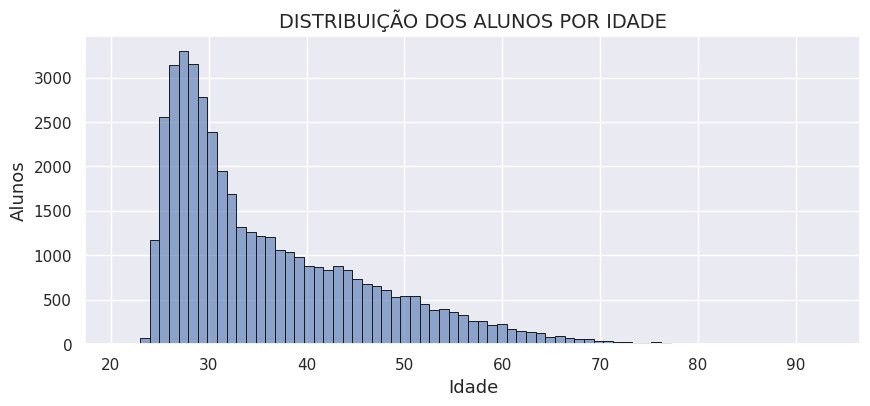

In [65]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 4))
distribuicao_idade = sns.histplot(data=df_aluno, x='IDADE',bins = 73, ec = "k", alpha = .6, palette='crest')
plt.title("DISTRIBUIÇÃO DOS ALUNOS POR IDADE", fontsize=14)
plt.xlabel("Idade", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('idades_alunos.png', transparent = True)

#3.3 Análise do perfil do aluno

In [66]:
perfil_aluno = df_aluno[['ID_ALUNO','RACA','GENERO','IDADE']]
perfil_aluno.head()

ID_ALUNO    RACA     GENERO  IDADE
1         1   Parda  Masculino     36
2         2   Parda   Feminino     43
3         3   Parda  Masculino     47
4         4   Parda  Masculino     33
5         5  Branca  Masculino     37

In [67]:
perfil_genero = perfil_aluno[['GENERO', 'ID_ALUNO']].groupby('GENERO').agg(['count'])
perfil_genero

ID_ALUNO
             count
GENERO            
Feminino     20554
Masculino    22356

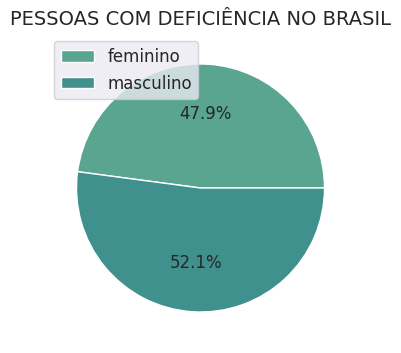

In [68]:
plt.figure(figsize = (4,10))
brasil = [20554,(22356)]
colors = sns.color_palette("crest")[1:]
labels = 'feminino', 'masculino'
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", fontsize=14)
plt.savefig('perfil_genero.png', transparent = True)

In [70]:
perfil_raca = perfil_aluno[['RACA', 'ID_ALUNO']].groupby('RACA').agg(['count'])
perfil_raca

ID_ALUNO
                                    count
RACA                                     
Aluno não quis declarar cor/raça     3845
Amarela                               826
Branca                              18248
Indígena                              273
Não dispõe da informação               76
Parda                               15806
Preta                                3836

In [71]:
#Criando o dataframe
df_perfil_raca = pd.DataFrame(perfil_raca['ID_ALUNO']['count'])
df_perfil_raca.reset_index(inplace=True)
df_perfil_raca

RACA  count
0  Aluno não quis declarar cor/raça   3845
1                           Amarela    826
2                            Branca  18248
3                          Indígena    273
4          Não dispõe da informação     76
5                             Parda  15806
6                             Preta   3836

In [72]:
#Renomeando colunas
df_perfil_raca = df_perfil_raca.rename(columns={
    'count':'ALUNOS',
})
df_perfil_raca.head(7)

RACA  ALUNOS
0  Aluno não quis declarar cor/raça    3845
1                           Amarela     826
2                            Branca   18248
3                          Indígena     273
4          Não dispõe da informação      76
5                             Parda   15806
6                             Preta    3836

In [73]:
df_perfil_raca = df_perfil_raca
racas = {
    'Aluno não quis declarar cor/raça':'Não declarado',
    'Não dispõe da informação':'Sem informação',
    'Parda':'Parda',
    'Branca':'Branca',
    'Amarela':'Amarela',
    'Indígena':'Indígena',
    'Preta':'Preta'
}
df_perfil_raca = df_perfil_raca.astype({'RACA':str})
df_perfil_raca.RACA = df_perfil_raca.RACA.map(racas)

In [74]:
df_perfil_raca_ordenado = df_perfil_raca.sort_values(['ALUNOS'], ascending=False)
df_perfil_raca_ordenado

RACA  ALUNOS
2          Branca   18248
5           Parda   15806
0   Não declarado    3845
6           Preta    3836
1         Amarela     826
3        Indígena     273
4  Sem informação      76

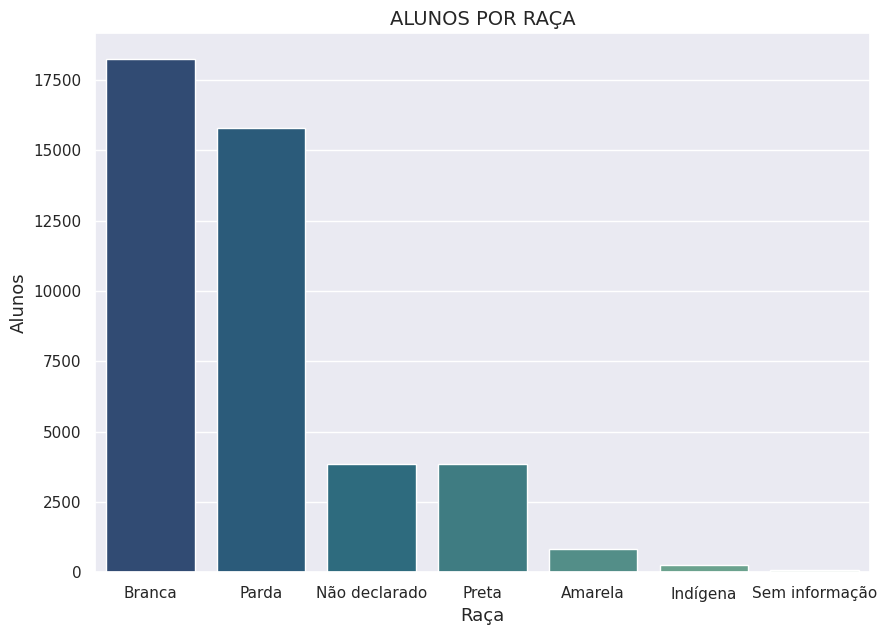

In [75]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'], hue=df_perfil_raca_ordenado['RACA'], legend=False)
plt.title("ALUNOS POR RAÇA", fontsize=14)

plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_raca.png', transparent = True)

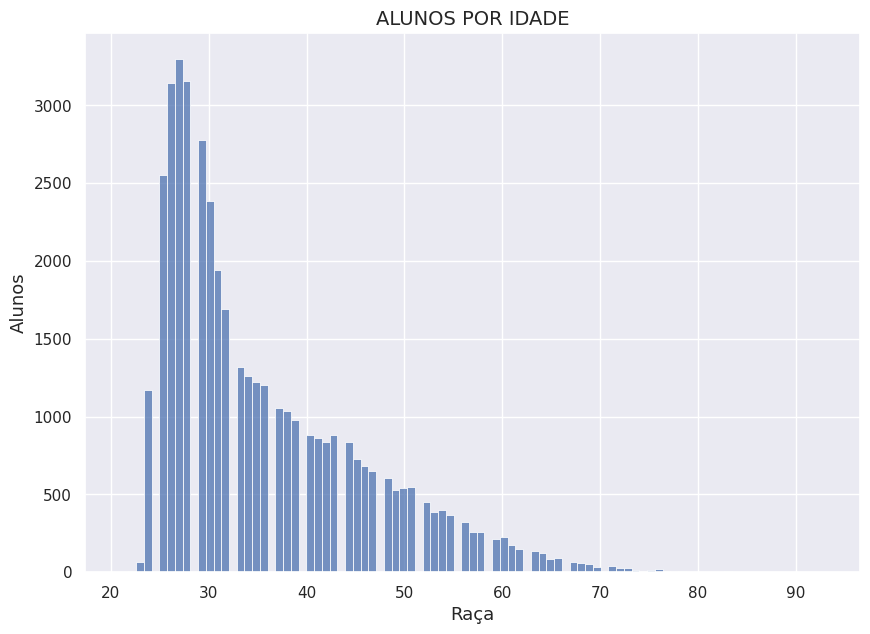

In [76]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
#sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])
sns.histplot(data=perfil_aluno, x='IDADE')
plt.title("ALUNOS POR IDADE", fontsize=14)

plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_idade.png', transparent = True)

In [77]:
perfil_aluno.describe()

ID_ALUNO         IDADE
count  42910.000000  42910.000000
mean   21455.500000     35.655791
std    12387.194362     10.280933
min        1.000000     21.000000
25%    10728.250000     28.000000
50%    21455.500000     32.000000
75%    32182.750000     42.000000
max    42910.000000     93.000000

In [ ]:
#Intervalo de confiança
a = perfil_aluno['IDADE']
mean, sigma = np.mean(a), np.std(a)

conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int

(np.float64(15.505766622087876), np.float64(55.80581575964132))

#3.4 Analisando os alunos que ingressaram na IES sem ser em vagas reservadas para alunos com deficiência

In [78]:
df_aluno.loc[df_aluno['INGRESSO_RESERVA_DEFICIENCIA'] == 'Não'].count

<bound method DataFrame.count of        ID_ALUNO  CODIGO_IES  CODIGO_CURSO                              RACA  \
6             6           1             1                             Parda   
11           11           1             3                             Parda   
27           27           1             9                            Branca   
59           59           1            23                             Parda   
60           60           1            23                             Parda   
...         ...         ...           ...                               ...   
42632     42632       18506       1276404                             Parda   
42635     42635       18506       1276409                             Parda   
42637     42637       18506       1276410                             Preta   
42655     42655       18506       5000732  Aluno não quis declarar cor/raça   
42801     42801       21088       1332568                            Branca   

      PAIS_ORIGEM     GENERO  ANO_NASCIMENTO VINCULO_CURSO  \
6          Brasil  Masculino            1984      Cursando   
11         Brasil  Masculino            1999      Cursando   
27         Brasil   Feminino            1992      Cursando   
59         Brasil   Feminino            1977      Cursando   
60         Brasil   Feminino            1998      Cursando   
...           ...        ...             ...           ...   
42632      Brasil   Feminino            1994      Cursando   
42635      Brasil   Feminino            1995      Cursando   
42637      Brasil   Feminino            2001      Cursando   
42655      Brasil  Masculino            2001      Cursando   
42801      Brasil  Masculino            1977      Cursando   

      INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  ...  \
6                              Não              Não  ...   
11                             Não              Não  ...   
27                             Não              Não  ...   
59                             Não              Não  ...   
60                             Não              Não  ...   
...                            ...              ...  ...   
42632                          Não              Não  ...   
42635                          Não              Não  ...   
42637                          Não              Não  ...   
42655                          Não              Não  ...   
42801                          Não              Não  ...   

       IN_DEFICIENCIA_SURDOCEGUEIRA  IN_DEFICIENCIA_BAIXA_VISAO  \
6                               0.0                         0.0   
11                              0.0                         0.0   
27                              0.0                         1.0   
59                              0.0                         0.0   
60                              0.0                         0.0   
...                             ...                         ...   
42632                           0.0                         0.0   
42635                           0.0                         0.0   
42637                           0.0                         0.0   
42655                           0.0                         0.0   
42801                           0.0                         1.0   

       IN_DEFICIENCIA_CEGUEIRA  IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  \
6                          0.0                          0.0             0.0   
11                         0.0                          0.0             0.0   
27                         0.0                          0.0             0.0   
59                         0.0                          0.0             0.0   
60                         0.0                          0.0             0.0   
...                        ...                          ...             ...   
42632                      0.0                          0.0             0.0   
42635                      1.0                          0.0             0.0   
42637                      1.0      

Podemos perceber que a maioria dos alunos com deficiência matriculados no ensino superior, 63747, ou seja, 95,41% ingressam nos cursos por meio de cotas reservadas a pessoas com deficiência. Apenas 4,59% ingressam ser ser por cotas reservadas.

#3.5 Analisando a quantidade de alunos com deficiência nos cursos

Calculando a quantidade de alunos com deficiência por curso

In [79]:
#Agrupando os dados de aluno e curso
df_alunos_deficiencia = pd.merge(df_aluno, df_curso, how='inner', on='CODIGO_CURSO')
df_alunos_deficiencia.head()

ID_ALUNO  CODIGO_IES_x  CODIGO_CURSO    RACA PAIS_ORIGEM     GENERO  \
0         1             1             1   Parda      Brasil  Masculino   
1         2             1             1   Parda      Brasil   Feminino   
2         3             1             1   Parda      Brasil  Masculino   
3         4             1             1   Parda      Brasil  Masculino   
4         5             1             1  Branca      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
0            1989      Cursando                          Sim              Não   
1            1982      Cursando                          Sim              Não   
2            1978      Cursando                          Sim              Não   
3            1992      Cursando                          Sim              Não   
4            1988      Cursando                          Sim              Não   

   ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  \
0  ...             0.0               0.0              0.0                1.0   
1  ...             0.0               0.0              0.0                1.0   
2  ...             0.0               0.0              0.0                1.0   
3  ...             0.0               0.0              0.0                1.0   
4  ...             0.0               0.0              0.0                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3              0.0              0.0                   0.0   
4              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
1                   0.0                      447                      75  
2                   0.0                      447                      75  
3                   0.0                      447                      75  
4                   0.0                      447                      75  

[5 rows x 55 columns]

In [81]:
#Calculando a quantidade total de alunos por deficiência
IN_DEFICIENCIA_AUDITIVA = df_alunos_deficiencia['IN_DEFICIENCIA_AUDITIVA'].sum()
IN_DEFICIENCIA_FISICA = df_alunos_deficiencia['IN_DEFICIENCIA_FISICA'].sum()
IN_DEFICIENCIA_INTELECTUAL = df_alunos_deficiencia['IN_DEFICIENCIA_INTELECTUAL'].sum()
IN_DEFICIENCIA_MULTIPLA = df_alunos_deficiencia['IN_DEFICIENCIA_MULTIPLA'].sum()
IN_DEFICIENCIA_SURDEZ = df_alunos_deficiencia['IN_DEFICIENCIA_SURDEZ'].sum()
IN_DEFICIENCIA_SURDOCEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_SURDOCEGUEIRA'].sum()
IN_DEFICIENCIA_BAIXA_VISAO = df_alunos_deficiencia['IN_DEFICIENCIA_BAIXA_VISAO'].sum()
IN_DEFICIENCIA_CEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_CEGUEIRA'].sum()
IN_DEFICIENCIA_SUPERDOTACAO = df_alunos_deficiencia['IN_DEFICIENCIA_SUPERDOTACAO'].sum()
IN_TGD_AUTISMO = df_alunos_deficiencia['IN_TGD_AUTISMO'].sum()
IN_TGD_SINDROME_ASPERGER = df_alunos_deficiencia['IN_TGD_SINDROME_ASPERGER'].sum()
IN_TGD_SINDROME_RETT = df_alunos_deficiencia['IN_TGD_SINDROME_RETT'].sum()
IN_TGD_TRANSTOR_DESINTEGRATIVO = df_alunos_deficiencia['IN_TGD_TRANSTOR_DESINTEGRATIVO'].sum()

In [82]:
#Criando um dicionário, onde cada chave representa uma coluna
tipo_deficiencia = {
'TIPO_DEFICIENCIA': ['IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'],
'ALUNOS': [IN_DEFICIENCIA_AUDITIVA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_INTELECTUAL, IN_DEFICIENCIA_MULTIPLA, IN_DEFICIENCIA_SURDEZ, IN_DEFICIENCIA_SURDOCEGUEIRA, IN_DEFICIENCIA_BAIXA_VISAO, IN_DEFICIENCIA_CEGUEIRA, IN_DEFICIENCIA_SUPERDOTACAO, IN_TGD_AUTISMO, IN_TGD_SINDROME_ASPERGER, IN_TGD_SINDROME_RETT, IN_TGD_TRANSTOR_DESINTEGRATIVO],
}
#Criando o dataframe
deficiencias = pd.DataFrame(tipo_deficiencia, columns=['TIPO_DEFICIENCIA','ALUNOS'])
deficiencias

TIPO_DEFICIENCIA   ALUNOS
0          IN_DEFICIENCIA_AUDITIVA   5707.0
1            IN_DEFICIENCIA_FISICA  14429.0
2       IN_DEFICIENCIA_INTELECTUAL   3841.0
3          IN_DEFICIENCIA_MULTIPLA    675.0
4            IN_DEFICIENCIA_SURDEZ   2311.0
5     IN_DEFICIENCIA_SURDOCEGUEIRA    144.0
6       IN_DEFICIENCIA_BAIXA_VISAO  12327.0
7          IN_DEFICIENCIA_CEGUEIRA   2260.0
8      IN_DEFICIENCIA_SUPERDOTACAO   1365.0
9                   IN_TGD_AUTISMO    847.0
10        IN_TGD_SINDROME_ASPERGER    534.0
11            IN_TGD_SINDROME_RETT    171.0
12  IN_TGD_TRANSTOR_DESINTEGRATIVO    282.0

In [83]:
deficiencias_ordenado = deficiencias.sort_values(['ALUNOS'], ascending=False)
deficiencias_ordenado

TIPO_DEFICIENCIA   ALUNOS
1            IN_DEFICIENCIA_FISICA  14429.0
6       IN_DEFICIENCIA_BAIXA_VISAO  12327.0
0          IN_DEFICIENCIA_AUDITIVA   5707.0
2       IN_DEFICIENCIA_INTELECTUAL   3841.0
4            IN_DEFICIENCIA_SURDEZ   2311.0
7          IN_DEFICIENCIA_CEGUEIRA   2260.0
8      IN_DEFICIENCIA_SUPERDOTACAO   1365.0
9                   IN_TGD_AUTISMO    847.0
3          IN_DEFICIENCIA_MULTIPLA    675.0
10        IN_TGD_SINDROME_ASPERGER    534.0
12  IN_TGD_TRANSTOR_DESINTEGRATIVO    282.0
11            IN_TGD_SINDROME_RETT    171.0
5     IN_DEFICIENCIA_SURDOCEGUEIRA    144.0

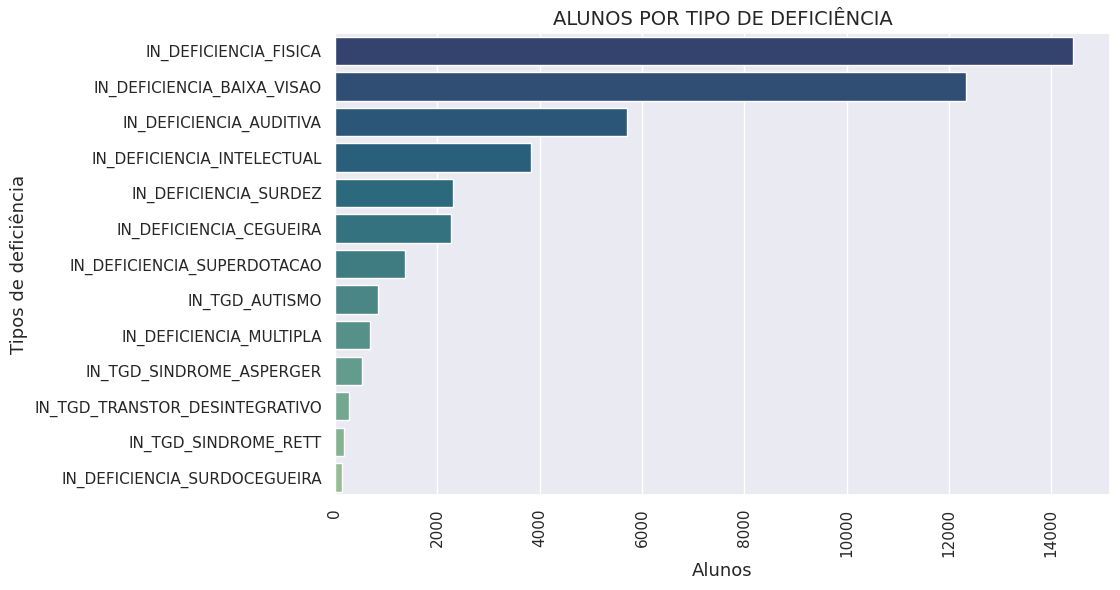

In [84]:
#Visualizando os tipos de deficiência dos alunos em  2019
plt.figure(figsize=(10,6))
defic = sns.barplot(x='ALUNOS', y='TIPO_DEFICIENCIA', data=deficiencias_ordenado, palette='crest_r', hue='TIPO_DEFICIENCIA', legend=False)
plt.xticks(rotation=90)
defic.set_title('ALUNOS POR TIPO DE DEFICIÊNCIA', fontsize = 14)
defic.set_xlabel('Alunos',fontsize = 13), defic.set_ylabel('Tipos de deficiência',fontsize=13)
plt.savefig('alunos_por_deficiencia.png', transparent = True)

#3.6 Analisando a quantidade de deficientes por grande área de formação

In [10]:
df_info_curso = pd.read_csv(r'dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NO_CURSO', 'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL'])
df_info_curso['NUM_DE_CURSOS'] = 1
df_info_curso = df_info_curso.groupby('NO_CURSO').sum().reset_index()
df_info_curso = df_info_curso.rename(columns={'NO_CURSO': 'NOME_CURSO', 'QT_MATRICULA_TOTAL': 'NUM_ALUNOS_MATRICULADOS', 'QT_CONCLUINTE_TOTAL': 'NUM_ALUNOS_CONCLUINTES'})
df_info_curso

NOME_CURSO  NUM_ALUNOS_MATRICULADOS  \
0                          ABI - ARTES CÊNICAS                      186   
1                        ABI - ARTES PLÁSTICAS                       50   
2                          ABI - ARTES VISUAIS                      464   
3       ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA                        0   
4     ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA                      133   
...                                        ...                      ...   
1242                    VITICULTURA E ENOLOGIA                      392   
1243                  WEB DESIGN E PROGRAMAÇÃO                        5   
1244               YOGA, ÊNFASE EM YOGATERAPIA                       33   
1245                                 ZOOTECNIA                    20500   
1246                       ÓPTICA E OPTOMETRIA                      959   

      NUM_ALUNOS_CONCLUINTES  NUM_DE_CURSOS  
0                          0              4  
1                          0              1  
2                          0              5  
3                          0              1  
4                          0              1  
...                      ...            ...  
1242                      48              5  
1243                       0              1  
1244                       5              1  
1245                    1927            119  
1246                      89              2  

[1247 rows x 4 columns]

In [86]:
df_curso_deficiencia = df_alunos_deficiencia[['NOME_IES', 'NOME_CURSO', 'AREA_FORMACAO']].copy()
df_curso_deficiencia['NUM_ALUNOS_DEFICIENTES'] = 1
df_curso_deficiencia = df_curso_deficiencia.groupby(by=['NOME_CURSO', 'AREA_FORMACAO']).sum().reset_index()
df_curso_deficiencia = pd.merge(df_curso_deficiencia, df_info_curso, how='inner', on='NOME_CURSO')
df_arealuno = df_curso_deficiencia.groupby(by=['AREA_FORMACAO']).sum()
df_arealuno['MEDIA_QNT_ALUNO_CURSO'] = df_arealuno['NUM_ALUNOS_DEFICIENTES'] / df_arealuno['NUM_DE_CURSOS']
df_arealuno

NOME_CURSO  \
AREA_FORMACAO                                                                                           
Agricultura, Veterinária, Recursos florestais e...  AGROECOLOGIAAGROINDÚSTRIAAGRONEGÓCIOAGRONOMIAA...   
Artes e Humanidades                                 ANIMAÇÃOARQUEOLOGIAARQUEOLOGIA E PRESERVAÇÃO P...   
Ciências Sociais, Jornalismo e Informação           ANTROPOLOGIAANTROPOLOGIA - DIVERSIDADE CULTURA...   
Ciências naturais, Matemática e Estatística         BIOLOGIABIOQUÍMICABIOTECNOLOGIABIOTECNOLOGIA I...   
Educação                                            ARTE EDUCAÇÃOARTESARTES CÊNICASARTES PLÁSTICAS...   
Engenharia, Produção e Construção                   ALIMENTOSANÁLISE DE PROCESSOS AGROINDUSTRIAISA...   
Negócios, Administração e Direito                   ADMINISTRAÇÃOADMINISTRAÇÃO DE EMPRESASADMINIST...   
Saúde e Bem-estar                                   BIOMEDICINACIÊNCIAS BIOMÉDICASCIÊNCIAS BIOMÉDI...   
Serviços                                            CIÊNCIAS AERONÁUTICASCIÊNCIAS MILITARESEMBELEZ...   
Tecnologias da informação e Comunicação (TIC)       ANÁLISE E DESENVOLVIMENTO DE SISTEMASBANCO DE ...   

                                                                                             NOME_IES  \
AREA_FORMACAO                                                                                           
Agricultura, Veterinária, Recursos florestais e...  UNIVERSIDADE ESTADUAL DE GOIÁSUNIVERSIDADE EST...   
Artes e Humanidades                                 UNIVERSIDADE FEDERAL DE SANTA CATARINAUNIVERSI...   
Ciências Sociais, Jornalismo e Informação           UNIVERSIDADE FEDERAL DE MINAS GERAISUNIVERSIDA...   
Ciências naturais, Matemática e Estatística         UNIVERSIDADE ESTADUAL DA PARAÍBAUNIVERSIDADE E...   
Educação                                            UNIVERSIDADE DO PLANALTO CATARINENSEUNIVERSIDA...   
Engenharia, Produção e Construção                   UNIVERSIDADE ESTADUAL DE CIÊNCIAS DA SAÚDE DE ...   
Negócios, Administração e Direito                   UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
Saúde e Bem-estar                                   UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
Serviços                                            UNIVERSIDADE ESTÁCIO DE SÁUNIVERSIDADE PITÁGOR...   
Tecnologias da informação e Comunicação (TIC)       UNIVERSIDADE DO VALE DO RIO DOS SINOSUNIVERSID...   

                                                    NUM_ALUNOS_DEFICIENTES  \
AREA_FORMACAO                                                                
Agricultura, Veterinária, Recursos florestais e...                    1445   
Artes e Humanidades                                                   1119   
Ciências Sociais, Jornalismo e Informação                             3016   
Ciências naturais, Matemática e Estatística                            737   
Educação                                                              9649   
Engenharia, Produção e Construção                                     4838   
Negócios, Administração e Direito                                    11829   
Saúde e Bem-estar                                                     7028   
Serviços                                                               718   
Tecnologias da informação e Comunicação (TIC)                         2370   

                                                    NUM_ALUNOS_MATRICULADOS  \
AREA_FORMACAO                                                                 
Agricultura, Veterinária, Recursos florestais e...                   275188   
Artes e Humanidades                                                  463720   
Ciências Sociais, Jornalismo e Informação                            525190   
Ciências naturais, Matemática e Estatística                          355234   
Educação                                                            2360697   
Engenharia, Produção e Construção                                   1145450   


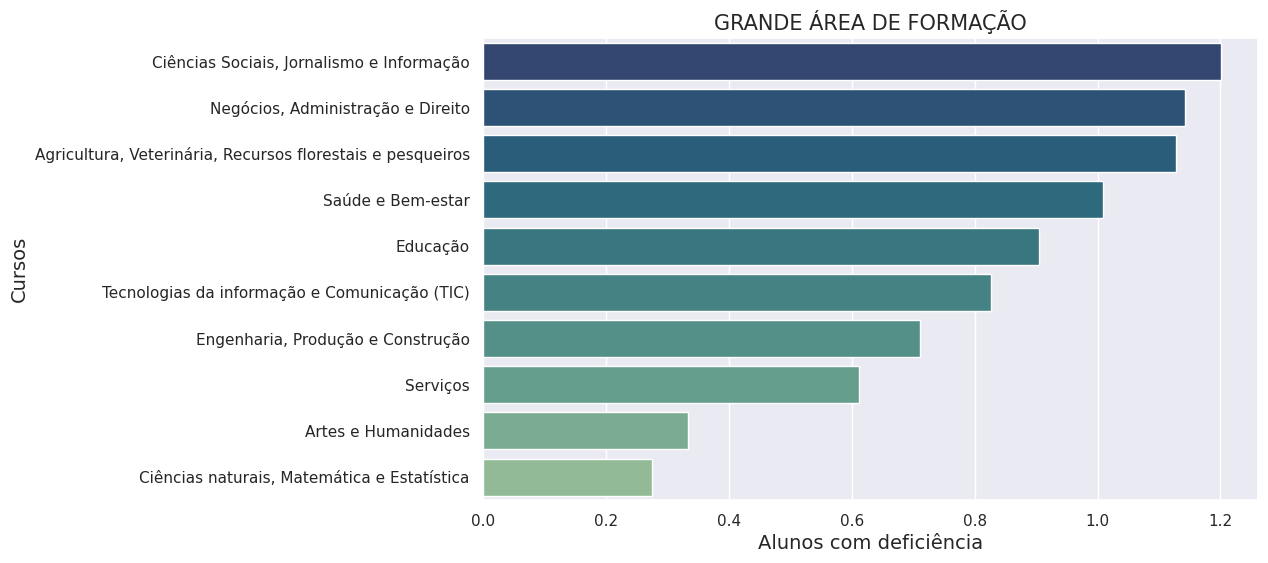

In [87]:
top10 = df_arealuno.sort_values('MEDIA_QNT_ALUNO_CURSO', ascending=False).reset_index()
plt.figure(figsize=(10,6))
df_arealuno_plot = sns.barplot(x='MEDIA_QNT_ALUNO_CURSO', y='AREA_FORMACAO', data=top10, palette="crest_r", hue='AREA_FORMACAO', legend=False)
df_arealuno_plot.set_title('GRANDE ÁREA DE FORMAÇÃO', fontsize = 15)
df_arealuno_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_arealuno_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('alunos_por_area_formacao.png', transparent = True)

#3.7 Analisando os recursos de acessibilidade disponíveis por curso

In [88]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso['RECURSOS'] = df_curso.apply(contar_recursos, axis=1)
df_curso.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO           UF  ANO_CENSO  \
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   

   CO_UF  CO_MUNICIPIO  ...  MATERIAL_BRAILLE MATERIAL_LIBRAS  \
0   51.0     5103403.0  ...               0.0             0.0   
0   51.0     5103403.0  ...               NaN             NaN   
0   51.0     5103403.0  ...               NaN             NaN   
0   51.0     5103403.0  ...               0.0             0.0   
0   51.0     5103403.0  ...               0.0             0.0   

  DISCIPLINA_LIBRAS TRADUTOR_LIBRAS GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0               1.0             0.0             0.0                   0.0   
0               NaN             NaN             NaN                   NaN   
0               NaN             NaN             NaN                   NaN   
0               1.0             1.0             1.0                   1.0   
0               1.0             0.0             0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  \
0                   0.0                      447                      75   
0                   NaN                      323                      28   
0                   NaN                      248                      45   
0                   1.0                      331                      53   
0                   0.0                      274                      32   

   RECURSOS  
0       1.0  
0       NaN  
0       NaN  
0       9.0  
0       1.0  

[5 rows x 32 columns]

Filtrando os dados para analisar apenas os cursos que estão "em atividade"


In [89]:
df_curso = df_curso.loc[df_curso['SITUACAO'] == 'Em atividade']
df_curso.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO           UF  ANO_CENSO  \
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   

   CO_UF  CO_MUNICIPIO  ...  MATERIAL_BRAILLE MATERIAL_LIBRAS  \
0   51.0     5103403.0  ...               0.0             0.0   
0   51.0     5103403.0  ...               NaN             NaN   
0   51.0     5103403.0  ...               NaN             NaN   
0   51.0     5103403.0  ...               0.0             0.0   
0   51.0     5103403.0  ...               0.0             0.0   

  DISCIPLINA_LIBRAS TRADUTOR_LIBRAS GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0               1.0             0.0             0.0                   0.0   
0               NaN             NaN             NaN                   NaN   
0               NaN             NaN             NaN                   NaN   
0               1.0             1.0             1.0                   1.0   
0               1.0             0.0             0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  \
0                   0.0                      447                      75   
0                   NaN                      323                      28   
0                   NaN                      248                      45   
0                   1.0                      331                      53   
0                   0.0                      274                      32   

   RECURSOS  
0       1.0  
0       NaN  
0       NaN  
0       9.0  
0       1.0  

[5 rows x 32 columns]

Analisando por quantidade de recursos disponíveis

In [90]:
area_formacao = df_curso[['AREA_FORMACAO','RECURSOS']].groupby('AREA_FORMACAO').agg(['mean','count'])
area_formacao

RECURSOS      
                                                        mean count
AREA_FORMACAO                                                     
Agricultura, Veterinária, Recursos florestais e...  6.591781  1095
Artes e Humanidades                                 7.563851  1527
Ciências Sociais, Jornalismo e Informação           7.420914  1903
Ciências naturais, Matemática e Estatística         7.494792   768
Educação                                            6.606715  6672
Engenharia, Produção e Construção                   7.135211  5680
Negócios, Administração e Direito                   7.042958  9451
Saúde e Bem-estar                                   7.222015  5896
Serviços                                            7.515888  1070
Tecnologias da informação e Comunicação (TIC)       7.169811  2332

In [91]:
recursos_por_cursos = df_curso[['NOME_CURSO','RECURSOS']].groupby('NOME_CURSO').agg(['mean', 'count'])
recursos_por_cursos

RECURSOS      
                                               mean count
NOME_CURSO                                               
ABI - ARTES CÊNICAS                        9.000000     3
ABI - ARTES PLÁSTICAS                     12.000000     1
ABI - ARTES VISUAIS                        8.000000     2
ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA     6.000000     1
ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA   6.000000     1
...                                             ...   ...
VISAGISMO E TERAPIAS CAPILARES            12.000000     1
VITICULTURA E ENOLOGIA                     5.250000     4
YOGA, ÊNFASE EM YOGATERAPIA                6.000000     1
ZOOTECNIA                                  6.262136   103
ÓPTICA E OPTOMETRIA                        7.000000     2

[1193 rows x 2 columns]

In [92]:
grau_academico = df_curso[['TIPO_GRAU_ACADEMICO','RECURSOS']].groupby('TIPO_GRAU_ACADEMICO').agg(['mean','count'])
grau_academico

RECURSOS       
                         mean  count
TIPO_GRAU_ACADEMICO                 
Bacharelado          7.181194  22280
Licenciatura         6.602466   6651
Tecnológico          7.134597   7437

In [93]:
modalidade_ensino = df_curso[['MODALIDADE_ENSINO','RECURSOS']].groupby('MODALIDADE_ENSINO').agg(['mean','count'])
modalidade_ensino

RECURSOS       
                       mean  count
MODALIDADE_ENSINO                 
1                  6.991103  32371
2                  7.693090   4226

#3.8 Analisando a correlação entre recursos e alunos com deficiência por curso

In [94]:
df_recursos = df_curso[['NOME_CURSO', 'RECURSOS']]
df_recursos = df_recursos.groupby('NOME_CURSO').sum().reset_index()
df_recurso_curso = pd.merge(df_curso_deficiencia, df_recursos, how='inner', on='NOME_CURSO')
df_recurso_curso = df_recurso_curso.drop(['AREA_FORMACAO'], axis=1)
df_recurso_curso

NOME_CURSO  \
0                                    ADMINISTRAÇÃO   
1                        ADMINISTRAÇÃO DE EMPRESAS   
2    ADMINISTRAÇÃO EM SISTEMAS E SERVIÇOS DE SAÚDE   
3                            ADMINISTRAÇÃO PÚBLICA   
4       ADMINISTRAÇÃO PÚBLICA E POLÍTICAS PÚBLICAS   
..                                             ...   
639                                        TURISMO   
640           TURISMO PATRIMONIAL E SOCIOAMBIENTAL   
641                         VITICULTURA E ENOLOGIA   
642                                      ZOOTECNIA   
643                            ÓPTICA E OPTOMETRIA   

                                              NOME_IES  \
0    UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
1    FACULDADE DE CIÊNCIAS APLICADAS E SOCIAIS DE P...   
2           UNIVERSIDADE ESTADUAL DO RIO GRANDE DO SUL   
3    UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
4    UNIVERSIDADE FEDERAL DA INTEGRAÇÃO LATINO-AMER...   
..                                                 ...   
639  UNIVERSIDADE DE BRASÍLIAUNIVERSIDADE FEDERAL D...   
640  FUNDAÇÃO UNIVERSIDADE FEDERAL DO TOCANTINSFUND...   
641  INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...   
642  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
643                    CENTRO UNIVERSITÁRIO BRAZ CUBAS   

     NUM_ALUNOS_DEFICIENTES  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  \
0                      2778                   643627                   91620   
1                         6                     1942                     299   
2                         1                      136                       1   
3                       176                    17381                    1519   
4                         3                      166                       5   
..                      ...                      ...                     ...   
639                      56                    13016                    1613   
640                       2                      114                       3   
641                       5                      392                      48   
642                     127                    20500                    1927   
643                       1                      959                      89   

     NUM_DE_CURSOS  RECURSOS  
0             2317   14366.0  
1                7      23.0  
2                1       0.0  
3               74     351.0  
4                1       7.0  
..             ...       ...  
639            162     829.0  
640              1      12.0  
641              5      21.0  
642            119     645.0  
643              2      14.0  

[644 rows x 7 columns]

In [95]:
df_recurso_curso[['NUM_ALUNOS_DEFICIENTES', 'NUM_ALUNOS_MATRICULADOS', 'NUM_ALUNOS_CONCLUINTES', 'RECURSOS']].corr()

NUM_ALUNOS_DEFICIENTES  NUM_ALUNOS_MATRICULADOS  \
NUM_ALUNOS_DEFICIENTES                 1.000000                 0.941443   
NUM_ALUNOS_MATRICULADOS                0.941443                 1.000000   
NUM_ALUNOS_CONCLUINTES                 0.931243                 0.993992   
RECURSOS                               0.817152                 0.916529   

                         NUM_ALUNOS_CONCLUINTES  RECURSOS  
NUM_ALUNOS_DEFICIENTES                 0.931243  0.817152  
NUM_ALUNOS_MATRICULADOS                0.993992  0.916529  
NUM_ALUNOS_CONCLUINTES                 1.000000  0.910411  
RECURSOS                               0.910411  1.000000

Percebe-se que existe uma alta correlação entre o numero de alunos com deficiência em relação aos cursos

In [96]:
df_recurso_curso = df_recurso_curso.sort_values('NUM_ALUNOS_DEFICIENTES', ascending=False)
top10 = df_recurso_curso.head(10)
top10

NOME_CURSO                                           NOME_IES  \
160             DIREITO  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
536           PEDAGOGIA  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
0         ADMINISTRAÇÃO  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
569          PSICOLOGIA  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
82   CIÊNCIAS CONTÁBEIS  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
502            MEDICINA  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
191          ENFERMAGEM  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
208    ENGENHARIA CIVIL  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
426     LETRAS - LIBRAS  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   
177     EDUCAÇÃO FÍSICA  UNIVERSIDADE FEDERAL DE MATO GROSSOUNIVERSIDAD...   

     NUM_ALUNOS_DEFICIENTES  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  \
160                    4308                   829487                  120936   
536                    3263                   813230                  123970   
0                      2778                   643627                   91620   
569                    1782                   270684                   37635   
82                     1368                   358173                   49930   
502                    1355                   187710                   20316   
191                    1223                   326055                   41217   
208                    1089                   273778                   48564   
426                     988                     9977                     296   
177                     795                   374787                   57667   

     NUM_DE_CURSOS  RECURSOS  
160           1568   10486.0  
536           1800   11081.0  
0             2317   14366.0  
569            927    6452.0  
82            1554   10149.0  
502            339    2252.0  
191           1112    7285.0  
208           1135    7621.0  
426             38     260.0  
177           1501   10203.0

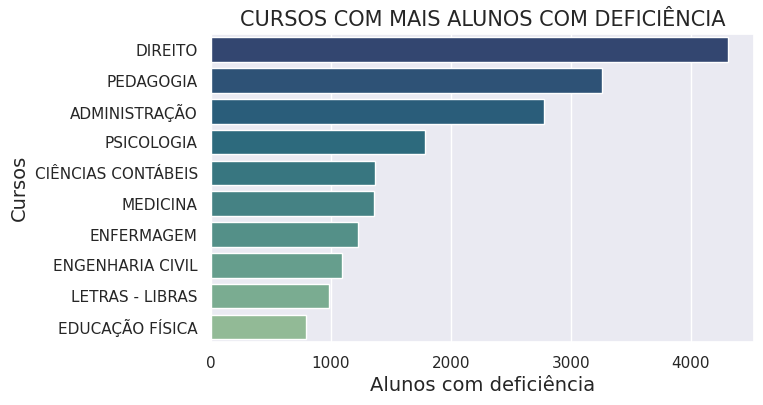

In [97]:
plt.figure(figsize=(7,4))
df_recurso_curso_plot = sns.barplot(x='NUM_ALUNOS_DEFICIENTES', y='NOME_CURSO', data=top10, palette="crest_r", hue='NOME_CURSO', legend=False)
df_recurso_curso_plot.set_title('CURSOS COM MAIS ALUNOS COM DEFICIÊNCIA', fontsize = 15)
df_recurso_curso_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_recurso_curso_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('curso_mais_alunos.png', transparent = True)

#3.9 Analisando os tipos de deficiência por IES

In [98]:
#Filtrando apenas as IES públicas
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_e_ies_publico = pd.read_csv(r'dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_e_ies_publico.loc[(df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_curso_e_ies_publico['RECURSOS'] = df_curso_e_ies_publico.apply(contar_recursos, axis=1)
df_curso_e_ies_publico.head()

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
3           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
4           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO           UF  ANO_CENSO  \
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
1    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
2    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
3    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
4    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   

   CO_UF  CO_MUNICIPIO  ...  ALUNOS_COM_SURDEZ ALUNOS_COM_SURDOCEGUEIRA  \
0   51.0     5103403.0  ...                  0                        0   
1   51.0     5103403.0  ...                  0                        0   
2   51.0     5103403.0  ...                  0                        0   
3   51.0     5103403.0  ...                  0                        0   
4   51.0     5103403.0  ...                  0                        0   

  ALUNOS_COM_BAIXA_VISAO ALUNOS_COM_CEGUEIRA ALUNOS_COM_SUPERDOTACAO  \
0                      0                   0                       0   
1                      0                   1                       0   
2                      0                   0                       0   
3                      1                   2                       0   
4                      0                   0                       0   

  ALUNOS_COM_TGD_AUTISMO  ALUNOS_COM_TGD_SINDROME_ASPERGER  \
0                      0                                 0   
1                      0                                 0   
2                      0                                 0   
3                      0                                 0   
4                      0                                 0   

   ALUNOS_COM_TGD_SINDROME_RETT  ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO  \
0                             0                                       0   
1                             0                                       0   
2                             0                                       0   
3                             0                                       0   
4                             0                                       0   

   RECURSOS  
0       1.0  
1       NaN  
2       NaN  
3       9.0  
4       1.0  

[5 rows x 46 columns]

In [99]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

SIGLA_IES
AMAN          1
CEFET/MG     13
CEFET/RJ     13
EEP/FUMEP     0
EG            8
             ..
USJ           0
USP          51
UTFPR        38
UVA          50
UnirG         8
Name: ALUNOS_COM_DEFICIENCIA, Length: 268, dtype: int64

In [100]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [101]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFPE']

ALUNOS_COM_DEFICIENCIA SIGLA_IES
208                     222      UFPE

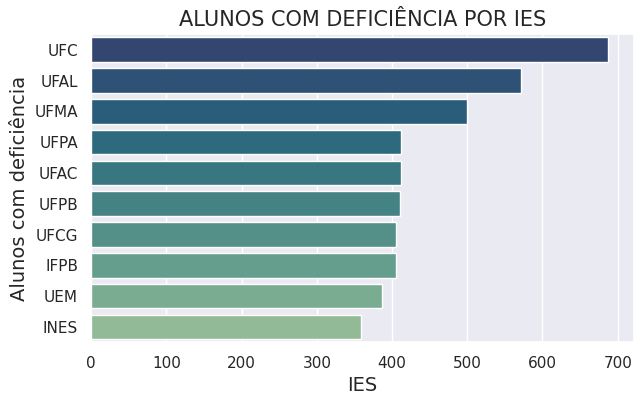

In [102]:
#Visualizando
plt.figure(figsize=(7,4))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r', hue='SIGLA_IES', legend=False)
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 15)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 14), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('alunos_por_ies.png', transparent = True)

#3.10 Analisando a quantidade de recursos de acessibilidade por IES

In [103]:
#Agrupando os recursos disponibilizados por IES
relacao = df_curso.groupby(['SIGLA_IES'])['RECURSOS'].sum().reset_index()
relacao.head()
relacao.loc[relacao['SIGLA_IES'] == 'UFPE']

SIGLA_IES  RECURSOS
1492      UFPE     108.0

In [104]:
#Transformando em um dataframe
df_recursos_ies = relacao
df_recursos_ies.index = range(len(df_recursos_ies.index))
df_recursos_ies.sort_values(by='RECURSOS', ascending=False, inplace=True)
df_recursos_ies

SIGLA_IES  RECURSOS
1689      UNIP   10207.0
1538     UNESA    2987.0
1685   UNINOVE    2547.0
1426       UAM    2172.0
1018       FMU    2016.0
...        ...       ...
968      FIPEN       0.0
970       FIRA       0.0
42      CES-CL       0.0
40    CEFET/RJ       0.0
11        AMAN       0.0

[1816 rows x 2 columns]

In [105]:
#Unindo as informações sobre recursos nas IES

df_recursos = df_recursos_ies.join(df_pcd_ies_publica.set_index('SIGLA_IES'), on='SIGLA_IES')
df_recursos.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)
df_recursos.head()

SIGLA_IES  RECURSOS  ALUNOS_COM_DEFICIENCIA
1470       UFC     464.0                   687.0
1467      UFAL     430.0                   571.0
1482      UFMA     734.0                   500.0
1490      UFPA     962.0                   412.0
1466      UFAC     160.0                   412.0

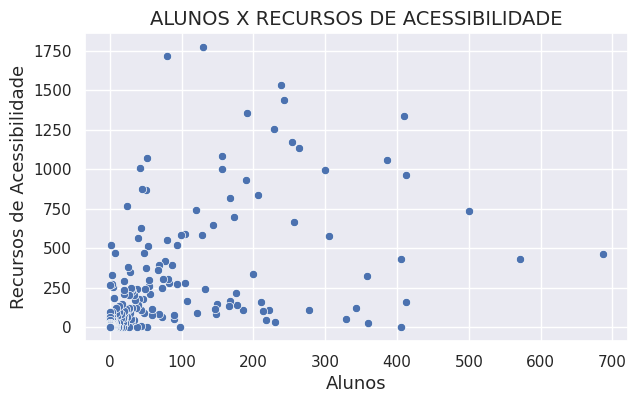

In [ ]:
#Visualizando a relação alunos com deficiência e recursos disponíveis pelas IES públicas
plt.figure(figsize=(7,4))
relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos)
relacao_plot.set_title('ALUNOS X RECURSOS DE ACESSIBILIDADE', fontsize = 14)
relacao_plot.set_xlabel('Alunos',fontsize = 13), relacao_plot.set_ylabel('Recursos de Acessibilidade',fontsize=13)
plt.savefig('relacao_alunos_recursos.png', transparent = True)

Pelo gráfico acima percebemos que não conseguimos enxergar uma relação entre a quantidade de recursos ofertados com a quantidades de alunos com deficiência nas IES de ensino público.

In [106]:
df_a = df_alunos_deficiencia[['NOME_IES']].copy()
df_a['NUM_ALUNOS_DEFICIENTES'] = 1
df_a = df_a.groupby('NOME_IES').sum(numeric_only=True).reset_index()
df_b = df_curso[['NOME_IES', 'NOME_CURSO', 'NUM_ALUNOS_MATRICULADOS', 'NUM_ALUNOS_CONCLUINTES', 'RECURSOS']].copy()
df_b['NUM_TOTAL_CURSOS'] = 1
df_b = df_b.groupby('NOME_IES').sum(numeric_only=True).reset_index()
df_recursos_por_ies = pd.merge(df_a, df_b, how='inner', on='NOME_IES')
df_recursos_por_ies
#df_teste

NOME_IES  \
0                           ABEU - CENTRO UNIVERSITÁRIO   
1                   AJES - FACULDADE DO VALE DO JURUENA   
2                          ALFA - Faculdade de Almenara   
3                   Academia Militar das Agulhas Negras   
4                CENTRO DE ENSINO SUPERIOR DE ARCOVERDE   
...                                                 ...   
1367           Universidade Estadual do Norte do Paraná   
1368                    Universidade Estadual do Paraná   
1369           Universidade Universus Veritas Guarulhos   
1370  Universidade do Estado de Mato Grosso Carlos A...   
1371                iCEV - Instituto de Ensino Superior   

      NUM_ALUNOS_DEFICIENTES  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  \
0                          3                     3441                     909   
1                          2                      585                     106   
2                          3                     1495                     146   
3                          1                     2167                     460   
4                          9                     1081                     197   
...                      ...                      ...                     ...   
1367                      28                     4851                     881   
1368                      27                     9520                    1386   
1369                      13                    14059                    2796   
1370                      31                    19293                    2174   
1371                       3                      371                       8   

      RECURSOS  NUM_TOTAL_CURSOS  
0         12.0                17  
1          7.0                 7  
2          6.0                 6  
3          0.0                 1  
4          9.0                 9  
...        ...               ...  
1367     347.0                29  
1368     113.0                72  
1369     177.0               100  
1370     230.0                95  
1371       7.0                 4  

[1372 rows x 6 columns]

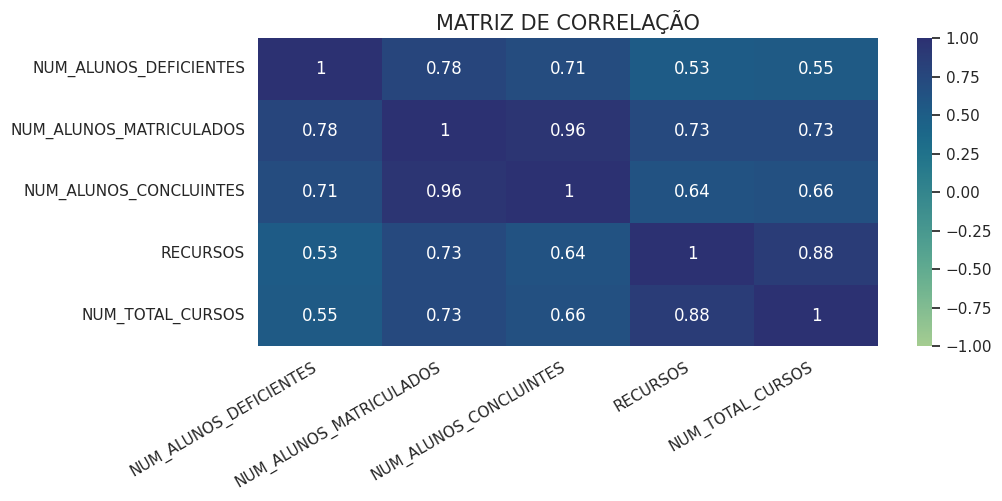

In [108]:
#Criando grafico de correlação no dataframe de recursos por ies
plt.figure(figsize=(10,4))
# Excluindo colunas não numéricas antes de calcular a correlação
corr = df_recursos_por_ies.drop(columns=['NOME_IES']).corr()
ax = sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('MATRIZ DE CORRELAÇÃO', fontsize = 15)
#ax.set_xlabel('IES',fontsize = 14), ax.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('matriz_correlacao_eda.png', transparent = True)

Percebe-se pelo grafico de correlação que a quantidade de alunos com deficiencia tem uma correlação mediana com a quantidade de recursos oferecidas pelas IES

In [109]:
#Filtrando apenas as IES públicas
df_curso_publico = pd.read_csv(r'dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual')]
df_curso_e_ies_publico.head()
#df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]

CODIGO_IES                             NOME_IES SIGLA_IES  \
0           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
3           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
4           1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

  TIPO_CATEGORIA_ADM TIPO_ORG_ACADEMICA        REGIAO           UF  ANO_CENSO  \
0    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
1    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
2    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
3    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   
4    Pública Federal       Universidade  Centro-Oeste  Mato Grosso       2019   

   CO_UF  CO_MUNICIPIO  ...  ALUNOS_COM_DEFICIENCIA_MULTIPLA  \
0   51.0     5103403.0  ...                                0   
1   51.0     5103403.0  ...                                0   
2   51.0     5103403.0  ...                                0   
3   51.0     5103403.0  ...                                0   
4   51.0     5103403.0  ...                                1   

  ALUNOS_COM_SURDEZ ALUNOS_COM_SURDOCEGUEIRA ALUNOS_COM_BAIXA_VISAO  \
0                 0                        0                      0   
1                 0                        0                      0   
2                 0                        0                      0   
3                 0                        0                      1   
4                 0                        0                      0   

  ALUNOS_COM_CEGUEIRA ALUNOS_COM_SUPERDOTACAO  ALUNOS_COM_TGD_AUTISMO  \
0                   0                       0                       0   
1                   1                       0                       0   
2                   0                       0                       0   
3                   2                       0                       0   
4                   0                       0                       0   

   ALUNOS_COM_TGD_SINDROME_ASPERGER  ALUNOS_COM_TGD_SINDROME_RETT  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 45 columns]

In [110]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

SIGLA_IES
AMAN          1
CEFET/MG     13
CEFET/RJ     13
EEP/FUMEP     0
EG            8
             ..
USJ           0
USP          51
UTFPR        38
UVA          50
UnirG         8
Name: ALUNOS_COM_DEFICIENCIA, Length: 268, dtype: int64

In [111]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [112]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFPE']

ALUNOS_COM_DEFICIENCIA SIGLA_IES
208                     222      UFPE

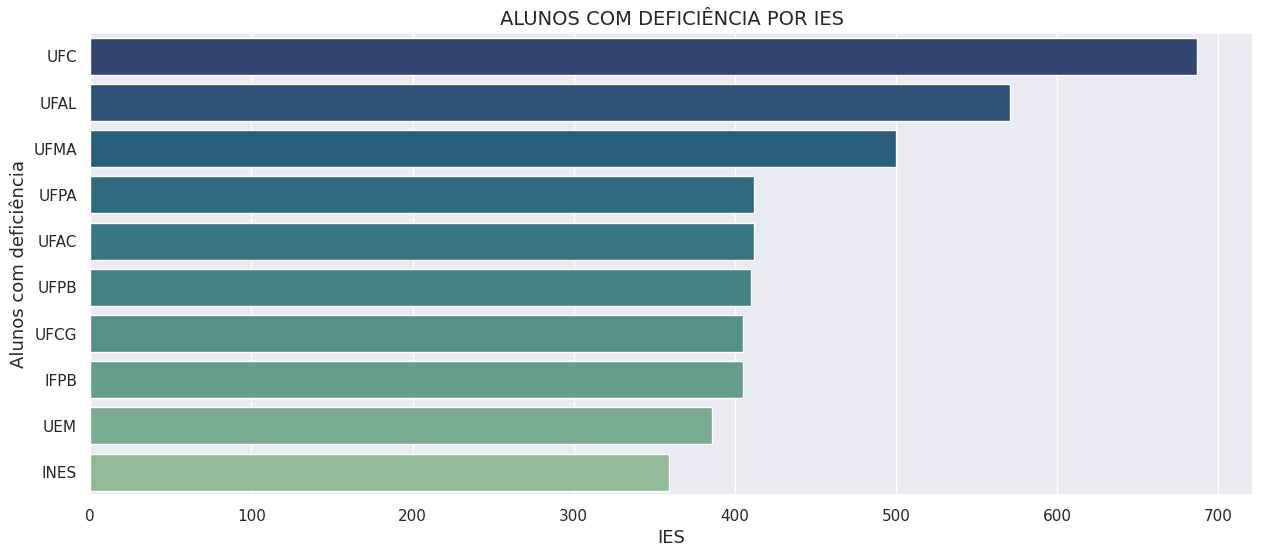

In [113]:
#Visualizando
plt.figure(figsize =(15, 6))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r', hue='SIGLA_IES', legend=False)
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=13)
plt.savefig('alunos_ies.png', transparent = True)



#3.11 Analisando a quantidade de deficientes por categoria administrativa

<Figure size 1200x200 with 0 Axes>

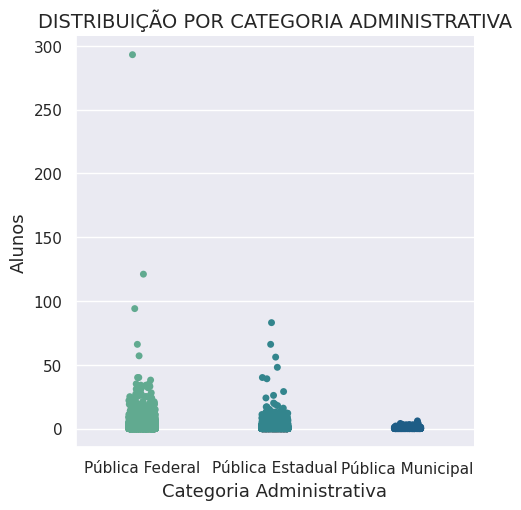

In [114]:
#Gráfico categórico Catplot
plt.figure(figsize =(12, 2))
ies_publica_federal = sns.catplot(x='TIPO_CATEGORIA_ADM', y='ALUNOS_COM_DEFICIENCIA', data=df_curso_e_ies_publico, palette='crest', hue='TIPO_CATEGORIA_ADM', legend=False)
plt.title("DISTRIBUIÇÃO POR CATEGORIA ADMINISTRATIVA", fontsize=14)
plt.xlabel('Categoria Administrativa', fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('alunos_por_categoriaadm.png', transparent = True)

Mas conseguimos perceber que os alunos com deficiência estão mais concentrados nas IES públicas federais.

#3.12 Análise dos alunos concluintes no Ensino Superior

In [115]:
import pandas as pd
#Importando os dados de concluintes de 2019
alunos_2019 = pd.read_csv(r'dados/alunodeficiente_2019.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2019 = alunos_2019.loc[alunos_2019['IN_CONCLUINTE'] == 1]
alunos_2019.head()

NU_ANO_CENSO  CO_CURSO  CO_ALUNO_CURSO  TP_COR_RACA  TP_SEXO  \
22           2019         6        74005404            3        1   
34           2019         7        73973642            5        1   
152          2019    100775        73966504            1        2   
179          2019    116560        73961425            2        2   
239          2019   1103426        73966379            3        2   

     NU_ANO_NASCIMENTO  IN_CONCLUINTE  NU_ANO_INGRESSO  
22                1979              1             2016  
34                1977              1             2015  
152               1997              1             2015  
179               1991              1             2016  
239               1969              1             2012

In [116]:
#Importando os dados de concluintes de 2018
alunos_2018 = pd.read_csv(r'dados/alunodeficiente_2018.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2018 = alunos_2018.loc[alunos_2018['IN_CONCLUINTE'] == 1]
alunos_2018.head()

NU_ANO_CENSO  CO_CURSO  CO_ALUNO_CURSO  TP_COR_RACA  TP_SEXO  \
3           2018         1        76445978            3        2   
12          2018         6        76472979            3        1   
23          2018         8        76479389            2        2   
57          2018        21        76484150            1        1   
85          2018     22837        76495920            3        1   

    NU_ANO_NASCIMENTO  IN_CONCLUINTE  NU_ANO_INGRESSO  
3                1995              1             2014  
12               1990              1             2014  
23               1968              1             2016  
57               1993              1             2014  
85               1995              1             2015

In [117]:
#Importando os dados de concluintes de 2017
alunos_2017 = pd.read_csv(r'dados/alunodeficiente_2017.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO','NU_ANO_CENSO'])
alunos_2017 = alunos_2017.loc[alunos_2017['IN_CONCLUINTE'] == 1]
alunos_2017.head()

NU_ANO_CENSO  CO_CURSO  CO_ALUNO_CURSO  TP_COR_RACA  TP_SEXO  \
4            2017         2        48734293            1        1   
48           2017     41673        48741262            3        1   
99           2017    117004        48739644            3        2   
119          2017   1103426        48765021            2        2   
156          2017   1205603        48754027            3        1   

     NU_ANO_NASCIMENTO  IN_CONCLUINTE  NU_ANO_INGRESSO  
4                 1989              1             2014  
48                1975              1             2014  
99                1990              1             2012  
119               1982              1             2012  
156               1989              1             2014

In [118]:
#Juntando os dados de 2017 a 2019
anos = [alunos_2019, alunos_2018, alunos_2017]
df_concluintes_parcial = pd.concat(anos)
df_concluintes_parcial.head()

NU_ANO_CENSO  CO_CURSO  CO_ALUNO_CURSO  TP_COR_RACA  TP_SEXO  \
22           2019         6        74005404            3        1   
34           2019         7        73973642            5        1   
152          2019    100775        73966504            1        2   
179          2019    116560        73961425            2        2   
239          2019   1103426        73966379            3        2   

     NU_ANO_NASCIMENTO  IN_CONCLUINTE  NU_ANO_INGRESSO  
22                1979              1             2016  
34                1977              1             2015  
152               1997              1             2015  
179               1991              1             2016  
239               1969              1             2012

In [119]:
df_concluintes_parcial = df_concluintes_parcial.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO  RACA  GENERO  \
22        2019             6            74005404     3       1   
34        2019             7            73973642     5       1   
152       2019        100775            73966504     1       2   
179       2019        116560            73961425     2       2   
239       2019       1103426            73966379     3       2   

     DATA_NASCIMENTO  CONCLUINTE  ANO_INGRESSO  
22              1979           1          2016  
34              1977           1          2015  
152             1997           1          2015  
179             1991           1          2016  
239             1969           1          2012

In [120]:
#Importando os dados de concluintes de 2016
alunos_2016 = pd.read_csv(r'dados/alunodeficiente_2016.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2016 = alunos_2016.loc[alunos_2016['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2016['NU_ANO_CENSO']=2016
alunos_2016.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
22       116        13069741                  3              0   
25       119        13073087                  1              0   
38       135        12381872                  1              1   
39       135        13065287                  1              1   
45       136        13071528                  3              0   

    NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
22               1990              1          2011          2016  
25               1993              1          2010          2016  
38               1989              1          2009          2016  
39               1989              1          2010          2016  
45               1987              1          2010          2016

In [121]:
#Importando os dados de concluintes de 2015
alunos_2015 = pd.read_csv(r'dados/alunodeficiente_2015.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2015 = alunos_2015.loc[alunos_2015['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2015['NU_ANO_CENSO']=2015
alunos_2015.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
53    122200        20404275                  3              1   
58    300151        12631680                  0              0   
66       160        13795351                  3              0   
67     34642        20403767                  1              0   
80     18032         9483270                  3              0   

    NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
53               1988              1          2011          2015  
58               1989              1          2008          2015  
66               1987              1          2013          2015  
67               1989              1          2007          2015  
80               1985              1          2012          2015

In [122]:
#Importando os dados de concluintes de 2014
alunos_2014 = pd.read_csv(r'dados/alunodeficiente_2014.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2014 = alunos_2014.loc[alunos_2014['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2014['NU_ANO_CENSO']=2014
alunos_2014.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
43        145         8490077                  3              0   
64        156         8554999                  3              1   
88        167         8446376                  4              0   
102       303        20290999                  1              1   
107       304        20315417                  3              1   

     NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
43                1988              1          2009          2014  
64                1991              1          2011          2014  
88                1991              1          2009          2014  
102               1981              1          2010          2014  
107               1990              1          2009          2014

In [123]:
#Importando os dados de concluintes de 2013
alunos_2013 = pd.read_csv(r'dados/alunodeficiente_2013.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2013 = alunos_2013.loc[alunos_2013['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2013['NU_ANO_CENSO']=2013
alunos_2013.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
1           8        22606124                  1              0   
33        137         8183326                  0              0   
36        138         8204517                  6              0   
137       300         7626956                  4              0   
161       315         7633903                  3              1   

     NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
1                 1989              1          2007          2013  
33                1990              1          2007          2013  
36                1980              1          1998          2013  
137               1982              1          2008          2013  
161               1983              1          2009          2013

In [124]:
#Importando os dados de concluintes de 2012
alunos_2012 = pd.read_csv(r'dados/alunodeficiente_2012.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2012 = alunos_2012.loc[alunos_2012['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2012['NU_ANO_CENSO']=2012
alunos_2012.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
3      20477          156255                  3              1   
5     100547          225029                  1              1   
31     75284        11833178                  6              0   
32   1123238         7280581                  2              0   
47     92951         8797596                  0              1   

    NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
3                1986              1          2007          2012  
5                1982              1          2008          2012  
31               1988              1          2010          2012  
32               1977              1          2010          2012  
47               1985              1          2009          2012

In [125]:
#Importando os dados de concluintes de 2011
alunos_2011 = pd.read_csv(r'dados/alunodeficiente_2011.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2011 = alunos_2011.loc[alunos_2011['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2011['NU_ANO_CENSO']=2011
alunos_2011.head()

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
1      51212           12461                  6              1   
21    104958           16137                  1              0   
24     85696           24160                  6              1   
40     51277           28634                  1              1   
43    116176           27774                  1              0   

    NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
1                1985              1          2007          2011  
21               1978              1          2007          2011  
24               1986              1          2006          2011  
40               1987              1          2006          2011  
43               1982              1          2010          2011

In [126]:
#Juntando os dados de todos os anos
anos_parcial_2 = [alunos_2016, alunos_2015, alunos_2014, alunos_2013, alunos_2012, alunos_2011]
df_concluintes_parcial_2 = pd.concat(anos_parcial_2)
df_concluintes_parcial_2

CO_CURSO  CO_ALUNO_CURSO  CO_COR_RACA_ALUNO  IN_SEXO_ALUNO  \
22          116        13069741                  3              0   
25          119        13073087                  1              0   
38          135        12381872                  1              1   
39          135        13065287                  1              1   
45          136        13071528                  3              0   
...         ...             ...                ...            ...   
28997     90657        11802882                  6              0   
29003     98447        13325677                  6              1   
29005     10480        13194631                  2              1   
29018     68048        15178374                  1              1   
29031    106824        17777399                  3              1   

       NU_ANO_ALUNO_NASC  IN_CONCLUINTE  ANO_INGRESSO  NU_ANO_CENSO  
22                  1990              1          2011          2016  
25                  1993              1          2010          2016  
38                  1989              1          2009          2016  
39                  1989              1          2010          2016  
45                  1987              1          2010          2016  
...                  ...            ...           ...           ...  
28997               1986              1          2007          2011  
29003               1981              1          2008          2011  
29005               1988              1          2006          2011  
29018               1989              1          2008          2011  
29031               1982              1          2008          2011  

[24155 rows x 8 columns]

In [127]:
df_concluintes_parcial_2 = df_concluintes_parcial_2.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'CO_COR_RACA_ALUNO':'RACA',
    'IN_SEXO_ALUNO':'GENERO',
    'NU_ANO_ALUNO_NASC':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial_2.head()

CODIGO_CURSO  CODIGO_ALUNO_CURSO  RACA  GENERO  DATA_NASCIMENTO  \
22           116            13069741     3       0             1990   
25           119            13073087     1       0             1993   
38           135            12381872     1       1             1989   
39           135            13065287     1       1             1989   
45           136            13071528     3       0             1987   

    CONCLUINTE  ANO_INGRESSO  ANO_CENSO  
22           1          2011       2016  
25           1          2010       2016  
38           1          2009       2016  
39           1          2010       2016  
45           1          2010       2016

In [128]:
#Juntando os dados de todos os anos
partes = [df_concluintes_parcial,df_concluintes_parcial_2]
df_concluintes = pd.concat(partes)
df_concluintes.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO  RACA  GENERO  \
22        2019             6            74005404     3       1   
34        2019             7            73973642     5       1   
152       2019        100775            73966504     1       2   
179       2019        116560            73961425     2       2   
239       2019       1103426            73966379     3       2   

     DATA_NASCIMENTO  CONCLUINTE  ANO_INGRESSO  
22              1979           1          2016  
34              1977           1          2015  
152             1997           1          2015  
179             1991           1          2016  
239             1969           1          2012

In [129]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_concluintes = df_concluintes.astype({'RACA':str})
df_concluintes.RACA = df_concluintes.RACA.map(raca)
df_concluintes.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO      RACA  GENERO  \
22        2019             6            74005404     Parda       1   
34        2019             7            73973642  Indígena       1   
152       2019        100775            73966504    Branca       2   
179       2019        116560            73961425     Preta       2   
239       2019       1103426            73966379     Parda       2   

     DATA_NASCIMENTO  CONCLUINTE  ANO_INGRESSO  
22              1979           1          2016  
34              1977           1          2015  
152             1997           1          2015  
179             1991           1          2016  
239             1969           1          2012

In [130]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_concluintes = df_concluintes.astype({'GENERO':str})
df_concluintes.GENERO = df_concluintes.GENERO.map(genero)
df_concluintes.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO      RACA     GENERO  \
22        2019             6            74005404     Parda   Feminino   
34        2019             7            73973642  Indígena   Feminino   
152       2019        100775            73966504    Branca  Masculino   
179       2019        116560            73961425     Preta  Masculino   
239       2019       1103426            73966379     Parda  Masculino   

     DATA_NASCIMENTO  CONCLUINTE  ANO_INGRESSO  
22              1979           1          2016  
34              1977           1          2015  
152             1997           1          2015  
179             1991           1          2016  
239             1969           1          2012

In [131]:
#Inserindo a coluna Idade
df_concluintes['IDADE']=2021-df_concluintes['DATA_NASCIMENTO']
df_concluintes.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO      RACA     GENERO  \
22        2019             6            74005404     Parda   Feminino   
34        2019             7            73973642  Indígena   Feminino   
152       2019        100775            73966504    Branca  Masculino   
179       2019        116560            73961425     Preta  Masculino   
239       2019       1103426            73966379     Parda  Masculino   

     DATA_NASCIMENTO  CONCLUINTE  ANO_INGRESSO  IDADE  
22              1979           1          2016     42  
34              1977           1          2015     44  
152             1997           1          2015     24  
179             1991           1          2016     30  
239             1969           1          2012     52

In [132]:
#Inserindo o tempo de conclusão
df_concluintes = df_concluintes.rename(columns={'CONCLUINTE':'CONCLUSÃO'})
df_concluintes['CONCLUSÃO']=df_concluintes['ANO_CENSO']
df_concluintes['TEMPO_CONCLUSÃO']=df_concluintes['CONCLUSÃO']-df_concluintes['ANO_INGRESSO']+1
df_concluintes.head()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO      RACA     GENERO  \
22        2019             6            74005404     Parda   Feminino   
34        2019             7            73973642  Indígena   Feminino   
152       2019        100775            73966504    Branca  Masculino   
179       2019        116560            73961425     Preta  Masculino   
239       2019       1103426            73966379     Parda  Masculino   

     DATA_NASCIMENTO  CONCLUSÃO  ANO_INGRESSO  IDADE  TEMPO_CONCLUSÃO  
22              1979       2019          2016     42                4  
34              1977       2019          2015     44                5  
152             1997       2019          2015     24                5  
179             1991       2019          2016     30                4  
239             1969       2019          2012     52                8

In [133]:
df_concluintes.describe()

ANO_CENSO  CODIGO_CURSO  CODIGO_ALUNO_CURSO  DATA_NASCIMENTO  \
count  40033.000000  4.003300e+04        4.003300e+04     40033.000000   
mean    2015.478905  2.854052e+05        2.416646e+07      1983.700997   
std        2.499762  5.803838e+05        1.744576e+07         9.919700   
min     2011.000000  1.000000e+00        3.170000e+02      1926.000000   
25%     2013.000000  2.840800e+04        1.235078e+07      1978.000000   
50%     2016.000000  8.964400e+04        1.941763e+07      1986.000000   
75%     2018.000000  1.145640e+05        2.887949e+07      1991.000000   
max     2019.000000  5.001412e+06        7.900380e+07      2000.000000   

          CONCLUSÃO  ANO_INGRESSO         IDADE  TEMPO_CONCLUSÃO  
count  40033.000000  40033.000000  40033.000000     40033.000000  
mean    2015.478905   2011.794819     37.299003         4.684086  
std        2.499762      2.982482      9.919700         1.784711  
min     2011.000000   1982.000000     21.000000         1.000000  
25%     2013.000000   2010.000000     30.000000         4.000000  
50%     2016.000000   2012.000000     35.000000         5.000000  
75%     2018.000000   2014.000000     43.000000         6.000000  
max     2019.000000   2019.000000     95.000000        34.000000

In [134]:
#Somando os concluintes por ano
df_concluintes_por_ano = pd.DataFrame(columns=['ANO_CENSO'])
df_concluintes_por_ano['ANO_CENSO'] = df_concluintes['ANO_CENSO'].unique()
df_concluintes_por_ano

ANO_CENSO
0       2019
1       2018
2       2017
3       2016
4       2015
5       2014
6       2013
7       2012
8       2011

In [135]:
def contar_concluintes(row):
  df_concluintes_no_ano = df_concluintes.loc[df_concluintes['ANO_CENSO'] == row['ANO_CENSO']]
  row['CONCLUINTES'] = len(df_concluintes_no_ano.index)
  row['MEDIA_IDADE'] = df_concluintes_no_ano['IDADE'].mean()
  row['TEMPO_MEDIO']  = df_concluintes_no_ano['TEMPO_CONCLUSÃO'].mean()
  return row
df_concluintes_por_ano = df_concluintes_por_ano.apply(contar_concluintes, axis=1)
df_concluintes_por_ano = df_concluintes_por_ano.astype({'ANO_CENSO':int})
df_concluintes_por_ano = df_concluintes_por_ano.astype({'CONCLUINTES':int})
df_concluintes_por_ano

ANO_CENSO  CONCLUINTES  MEDIA_IDADE  TEMPO_MEDIO
0       2019         5618    34.107156     4.773585
1       2018         5200    35.068462     4.781923
2       2017         5060    36.078854     4.796640
3       2016         4809    36.524433     4.838844
4       2015         5154    38.143772     4.641055
5       2014         3918    38.784839     4.492343
6       2013         3795    38.612648     4.603953
7       2012         3595    40.291238     4.631711
8       2011         2884    41.984050     4.385922

In [136]:
total_matriculados = pd.read_csv(r'dados/total_matriculados.csv')
total_matriculados.head()

ANO  ALUNO COM DEFICIENCIA PORCENTAGEM  ALUNO TOTAL  POPULACAO TOTAL
0  2010                  25205       0,30%      8337219        194890682
1  2011                  29033       0,32%      8961724        196603732
2  2012                  34656       0,36%      9565483        198314934
3  2013                  37796       0,38%      9929289        200004188
4  2014                  45088       0,56%      8081369        201717541

In [137]:
df_concluintes_por_ano = df_concluintes_por_ano.join(total_matriculados[['ANO','ALUNO COM DEFICIENCIA']].set_index('ANO'), on='ANO_CENSO')

In [138]:
df_concluintes_por_ano = df_concluintes_por_ano.reindex(index=df_concluintes_por_ano.index[::-1])
df_concluintes_por_ano

ANO_CENSO  CONCLUINTES  MEDIA_IDADE  TEMPO_MEDIO  ALUNO COM DEFICIENCIA
8       2011         2884    41.984050     4.385922                  29033
7       2012         3595    40.291238     4.631711                  34656
6       2013         3795    38.612648     4.603953                  37796
5       2014         3918    38.784839     4.492343                  45088
4       2015         5154    38.143772     4.641055                  51685
3       2016         4809    36.524433     4.838844                  49813
2       2017         5060    36.078854     4.796640                  52542
1       2018         5200    35.068462     4.781923                  59496
0       2019         5618    34.107156     4.773585                  66750

In [139]:
df_concluintes_por_ano['PORCENTAGEM_CONCLUINTES'] = df_concluintes_por_ano['CONCLUINTES']/df_concluintes_por_ano['ALUNO COM DEFICIENCIA'] * 100
df_concluintes_por_ano

ANO_CENSO  CONCLUINTES  MEDIA_IDADE  TEMPO_MEDIO  ALUNO COM DEFICIENCIA  \
8       2011         2884    41.984050     4.385922                  29033   
7       2012         3595    40.291238     4.631711                  34656   
6       2013         3795    38.612648     4.603953                  37796   
5       2014         3918    38.784839     4.492343                  45088   
4       2015         5154    38.143772     4.641055                  51685   
3       2016         4809    36.524433     4.838844                  49813   
2       2017         5060    36.078854     4.796640                  52542   
1       2018         5200    35.068462     4.781923                  59496   
0       2019         5618    34.107156     4.773585                  66750   

   PORCENTAGEM_CONCLUINTES  
8                 9.933524  
7                10.373384  
6                10.040745  
5                 8.689674  
4                 9.971945  
3                 9.654106  
2                 9.630391  
1                 8.740083  
0                 8.416479

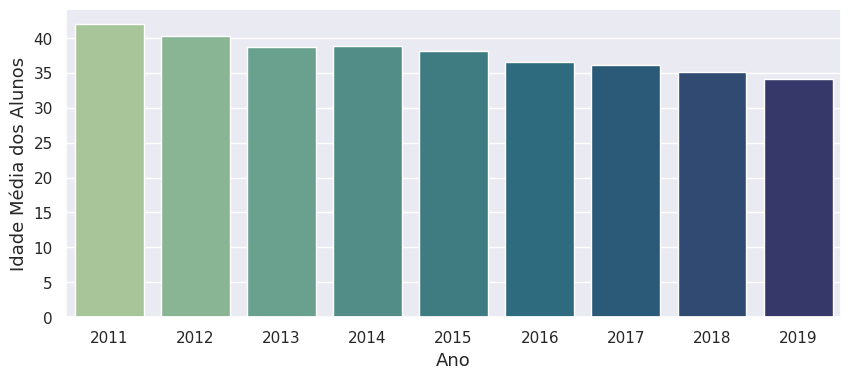

In [140]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='MEDIA_IDADE', data=df_concluintes_por_ano, palette='crest', hue='ANO_CENSO', legend=False)
#pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Idade Média dos Alunos',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

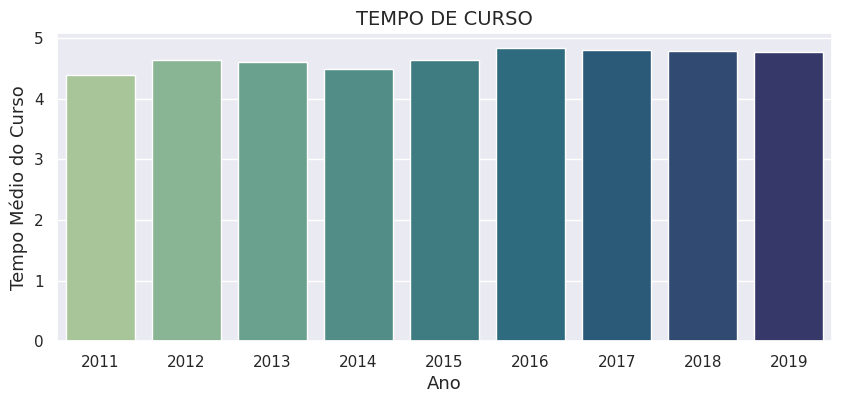

In [141]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='TEMPO_MEDIO', data=df_concluintes_por_ano, palette='crest', hue='ANO_CENSO', legend=False)
pcd_ies_publica_plot.set_title('TEMPO DE CURSO', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Tempo Médio do Curso',fontsize=13)
plt.savefig('tempo_curso.png', transparent = True)

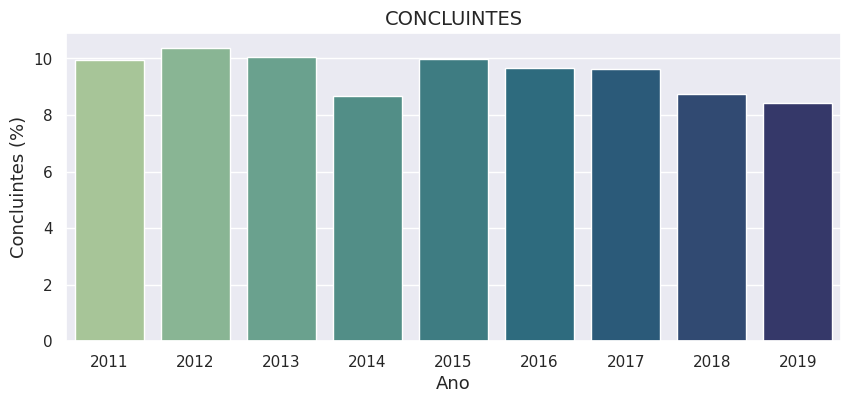

In [142]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='PORCENTAGEM_CONCLUINTES', data=df_concluintes_por_ano, palette='crest', hue='ANO_CENSO', legend=False)
pcd_ies_publica_plot.set_title('CONCLUINTES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Concluintes (%)',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

#3.13 Analisando deficiências e recursos

In [143]:
df_alunos_deficiencia.head(3)

ID_ALUNO  CODIGO_IES_x  CODIGO_CURSO   RACA PAIS_ORIGEM     GENERO  \
0         1             1             1  Parda      Brasil  Masculino   
1         2             1             1  Parda      Brasil   Feminino   
2         3             1             1  Parda      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
0            1989      Cursando                          Sim              Não   
1            1982      Cursando                          Sim              Não   
2            1978      Cursando                          Sim              Não   

   ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  \
0  ...             0.0               0.0              0.0                1.0   
1  ...             0.0               0.0              0.0                1.0   
2  ...             0.0               0.0              0.0                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
1                   0.0                      447                      75  
2                   0.0                      447                      75  

[3 rows x 55 columns]

In [144]:
#Renomeando colunas
df_alunos_deficiencia = df_alunos_deficiencia.rename(columns={
    'CODIGO_IES_x':'CODIGO_IES',
    'IN_DEFICIENCIA_AUDITIVA':'ALUNOS_COM_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA':'ALUNOS_COM_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL':'ALUNOS_COM_DEFICIENCIA_INTELECTUAL',
    'IN_DEFICIENCIA_MULTIPLA':'ALUNOS_COM_DEFICIENCIA_MULTIPLA',
    'IN_DEFICIENCIA_SURDEZ':'ALUNOS_COM_SURDEZ',
    'IN_DEFICIENCIA_SURDOCEGUEIRA':'ALUNOS_COM_SURDOCEGUEIRA',
    'IN_DEFICIENCIA_BAIXA_VISAO':'ALUNOS_COM_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA':'ALUNOS_COM_CEGUEIRA',
    'IN_DEFICIENCIA_SUPERDOTACAO':'ALUNOS_COM_SUPERDOTACAO',
    'IN_TGD_AUTISMO':'ALUNOS_COM_TGD_AUTISMO',
    'IN_TGD_SINDROME_ASPERGER':'ALUNOS_COM_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT':'ALUNOS_COM_TGD_SINDROME_RETT',
    'IN_TGD_TRANSTOR_DESINTEGRATIVO':'ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO'
    })
df_alunos_deficiencia.head(5)

ID_ALUNO  CODIGO_IES  CODIGO_CURSO    RACA PAIS_ORIGEM     GENERO  \
0         1           1             1   Parda      Brasil  Masculino   
1         2           1             1   Parda      Brasil   Feminino   
2         3           1             1   Parda      Brasil  Masculino   
3         4           1             1   Parda      Brasil  Masculino   
4         5           1             1  Branca      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
0            1989      Cursando                          Sim              Não   
1            1982      Cursando                          Sim              Não   
2            1978      Cursando                          Sim              Não   
3            1992      Cursando                          Sim              Não   
4            1988      Cursando                          Sim              Não   

   ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  \
0  ...             0.0               0.0              0.0                1.0   
1  ...             0.0               0.0              0.0                1.0   
2  ...             0.0               0.0              0.0                1.0   
3  ...             0.0               0.0              0.0                1.0   
4  ...             0.0               0.0              0.0                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3              0.0              0.0                   0.0   
4              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
1                   0.0                      447                      75  
2                   0.0                      447                      75  
3                   0.0                      447                      75  
4                   0.0                      447                      75  

[5 rows x 55 columns]

#Deficiências

In [ ]:
df_alunos_deficiencia.head(3)

ID_ALUNO  CODIGO_IES  CODIGO_CURSO   RACA PAIS_ORIGEM     GENERO  \
0         1           1             1  Parda      Brasil  Masculino   
1         2           1             1  Parda      Brasil   Feminino   
2         3           1             1  Parda      Brasil  Masculino   

   ANO_NASCIMENTO VINCULO_CURSO INGRESSO_RESERVA_DEFICIENCIA ALUNO_CONCLUINTE  \
0            1989      Cursando                          Sim              Não   
1            1982      Cursando                          Sim              Não   
2            1978      Cursando                          Sim              Não   

   ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  \
0  ...             0.0               0.0              0.0                1.0   
1  ...             0.0               0.0              0.0                1.0   
2  ...             0.0               0.0              0.0                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  NUM_ALUNOS_MATRICULADOS  NUM_ALUNOS_CONCLUINTES  
0                   0.0                      447                      75  
1                   0.0                      447                      75  
2                   0.0                      447                      75  

[3 rows x 55 columns]

In [177]:
df_alunos_deficiencia = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF','CODIGO_CURSO','NOME_IES','SIGLA_IES','ALUNOS_COM_DEFICIENCIA_AUDITIVA','ALUNOS_COM_DEFICIENCIA_FISICA','ALUNOS_COM_DEFICIENCIA_INTELECTUAL','ALUNOS_COM_DEFICIENCIA_MULTIPLA','ALUNOS_COM_SURDEZ','ALUNOS_COM_SURDOCEGUEIRA','ALUNOS_COM_BAIXA_VISAO','ALUNOS_COM_CEGUEIRA','ALUNOS_COM_SUPERDOTACAO','ALUNOS_COM_TGD_AUTISMO','ALUNOS_COM_TGD_SINDROME_ASPERGER','ALUNOS_COM_TGD_SINDROME_RETT','ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_alunos_deficiencia.head(3)

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_TATIL  MATERIAL_IMPRESSO  \
0                                 0.0  ...             0.0                0.0   
1                                 0.0  ...             0.0                0.0   
2                                 0.0  ...             0.0                0.0   

   MATERIAL_AUDIO  MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  \
0             0.0               0.0              0.0                1.0   
1             0.0               0.0              0.0                1.0   
2             0.0               0.0              0.0                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  
0                   0.0  
1                   0.0  
2                   0.0  

[3 rows x 32 columns]

In [178]:
#Alunos com deficiênca física
df_alunos_deficiencia['DEFICIENCIA_FISICA'] = df_alunos_deficiencia['ALUNOS_COM_DEFICIENCIA_FISICA']
df_alunos_deficiencia.head(3)

/tmp/ipython-input-2249056204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alunos_deficiencia['DEFICIENCIA_FISICA'] = df_alunos_deficiencia['ALUNOS_COM_DEFICIENCIA_FISICA']


CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_IMPRESSO  MATERIAL_AUDIO  \
0                                 0.0  ...                0.0             0.0   
1                                 0.0  ...                0.0             0.0   
2                                 0.0  ...                0.0             0.0   

   MATERIAL_BRAILLE  MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  \
0               0.0              0.0                1.0              0.0   
1               0.0              0.0                1.0              0.0   
2               0.0              0.0                1.0              0.0   

   GUIA_INTERPRETE  RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  \
0              0.0                   0.0                   0.0   
1              0.0                   0.0                   0.0   
2              0.0                   0.0                   0.0   

   DEFICIENCIA_FISICA  
0                 1.0  
1                 1.0  
2                 1.0  

[3 rows x 33 columns]

In [179]:
#Agrupando as deficiêncas auditivas do aluno
def def_auditiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_AUDITIVA'] + row['ALUNOS_COM_SURDEZ'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_AUDITIVA'] = df_alunos_deficiencia.apply(def_auditiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

/tmp/ipython-input-334374662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alunos_deficiencia['DEFICIENCIA_AUDITIVA'] = df_alunos_deficiencia.apply(def_auditiva, axis=1)
/tmp/ipython-input-334374662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alunos_deficiencia.fillna(0, inplace = True)


CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0                                 0.0  ...             0.0               0.0   
1                                 0.0  ...             0.0               0.0   
2                                 0.0  ...             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  DEFICIENCIA_FISICA  \
0                   0.0                   0.0                 1.0   
1                   0.0                   0.0                 1.0   
2                   0.0                   0.0                 1.0   

   DEFICIENCIA_AUDITIVA  
0                   0.0  
1                   0.0  
2                   0.0  

[3 rows x 34 columns]

In [180]:
#Agrupando as deficiêncas visuais do aluno
def def_visual(row):
  return row['ALUNOS_COM_BAIXA_VISAO'] + row['ALUNOS_COM_CEGUEIRA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_VISUAL'] = df_alunos_deficiencia.apply(def_visual, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

/tmp/ipython-input-4219876799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alunos_deficiencia['DEFICIENCIA_VISUAL'] = df_alunos_deficiencia.apply(def_visual, axis=1)
/tmp/ipython-input-4219876799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alunos_deficiencia.fillna(0, inplace = True)


CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_BRAILLE  MATERIAL_LIBRAS  \
0                                 0.0  ...               0.0              0.0   
1                                 0.0  ...               0.0              0.0   
2                                 0.0  ...               0.0              0.0   

   DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0                1.0              0.0              0.0                   0.0   
1                1.0              0.0              0.0                   0.0   
2                1.0              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0                   0.0                 1.0                   0.0   
1                   0.0                 1.0                   0.0   
2                   0.0                 1.0                   0.0   

   DEFICIENCIA_VISUAL  
0                 0.0  
1                 0.0  
2                 0.0  

[3 rows x 35 columns]

In [182]:
#Agrupando as deficiêncas cognitivas do aluno
def def_cognitiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_INTELECTUAL'] + row['ALUNOS_COM_SUPERDOTACAO'] + row['ALUNOS_COM_TGD_AUTISMO'] + row['ALUNOS_COM_TGD_SINDROME_ASPERGER'] + row['ALUNOS_COM_TGD_SINDROME_RETT'] + row['ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO']

df_alunos_deficiencia['DEFICIENCIA_COGNITIVA'] = df_alunos_deficiencia.apply(def_cognitiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_LIBRAS  \
0                                 0.0  ...              0.0   
1                                 0.0  ...              0.0   
2                                 0.0  ...              0.0   

   DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0                1.0              0.0              0.0                   0.0   
1                1.0              0.0              0.0                   0.0   
2                1.0              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0                   0.0                 1.0                   0.0   
1                   0.0                 1.0                   0.0   
2                   0.0                 1.0                   0.0   

   DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    0.0  

[3 rows x 36 columns]

In [183]:
#Agrupando as deficiêncas múltiplas do aluno
def def_mutipla(row):
  return row['ALUNOS_COM_DEFICIENCIA_MULTIPLA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_MULTIPLA'] = df_alunos_deficiencia.apply(def_mutipla, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  DISCIPLINA_LIBRAS  \
0                                 0.0  ...                1.0   
1                                 0.0  ...                1.0   
2                                 0.0  ...                1.0   

   TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0                   0.0                 1.0                   0.0   
1                   0.0                 1.0                   0.0   
2                   0.0                 1.0                   0.0   

   DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  
0                 0.0                    0.0                   0.0  
1                 0.0                    0.0                   0.0  
2                 0.0                    0.0                   0.0  

[3 rows x 37 columns]

In [165]:
df_classes = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF','SIGLA_IES']].drop_duplicates()
df_classes.head()

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO                UF SIGLA_IES
0             1    Pública Federal  Centro-Oeste       Mato Grosso      UFMT
210           2    Pública Federal  Centro-Oeste  Distrito Federal       UNB
340           3    Pública Federal      Nordeste           Sergipe       UFS
698           4    Pública Federal         Norte          Amazonas      UFAM
911           5    Pública Federal      Nordeste             Piauí      UFPI

In [166]:
df_classes = df_classes.set_index('CODIGO_IES')
df_classes.head()

TIPO_CATEGORIA_ADM        REGIAO                UF SIGLA_IES
CODIGO_IES                                                             
1             Pública Federal  Centro-Oeste       Mato Grosso      UFMT
2             Pública Federal  Centro-Oeste  Distrito Federal       UNB
3             Pública Federal      Nordeste           Sergipe       UFS
4             Pública Federal         Norte          Amazonas      UFAM
5             Pública Federal      Nordeste             Piauí      UFPI

In [167]:
df_alunos_deficiencia.head()

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO           UF  CODIGO_CURSO  \
0           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
1           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
2           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
3           1    Pública Federal  Centro-Oeste  Mato Grosso             1   
4           1    Pública Federal  Centro-Oeste  Mato Grosso             1   

                              NOME_IES SIGLA_IES  \
0  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
1  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
2  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
3  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   
4  UNIVERSIDADE FEDERAL DE MATO GROSSO      UFMT   

   ALUNOS_COM_DEFICIENCIA_AUDITIVA  ALUNOS_COM_DEFICIENCIA_FISICA  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   
3                              0.0                            1.0   
4                              0.0                            1.0   

   ALUNOS_COM_DEFICIENCIA_INTELECTUAL  ...  MATERIAL_LIBRAS  \
0                                 0.0  ...              0.0   
1                                 0.0  ...              0.0   
2                                 0.0  ...              0.0   
3                                 0.0  ...              0.0   
4                                 0.0  ...              0.0   

   DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  RECURSOS_COMUNICACAO  \
0                1.0              0.0              0.0                   0.0   
1                1.0              0.0              0.0                   0.0   
2                1.0              0.0              0.0                   0.0   
3                1.0              0.0              0.0                   0.0   
4                1.0              0.0              0.0                   0.0   

   RECURSOS_INFORMATICA  DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
0                   0.0                   0.0                 0.0   
1                   0.0                   0.0                 0.0   
2                   0.0                   0.0                 0.0   
3                   0.0                   0.0                 0.0   
4                   0.0                   0.0                 0.0   

   DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  
0                    0.0                   0.0  
1                    0.0                   0.0  
2                    0.0                   0.0  
3                    0.0                   0.0  
4                    0.0                   0.0  

[5 rows x 36 columns]

In [ ]:
#df_ies_deficiencia = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
#df_ies_deficiencia.head(3)

#Recursos

In [168]:
df_deficiencias_e_recursos = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_deficiencias_e_recursos.head(3)

CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  
0                   0.0                   0.0  
1                   0.0                   0.0  
2                   0.0                   0.0

In [169]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência física
def recurso_def_fisica(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_FISICA'] = df_deficiencias_e_recursos.apply(recurso_def_fisica, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/tmp/ipython-input-2203189217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos['RECURSOS_DEF_FISICA'] = df_deficiencias_e_recursos.apply(recurso_def_fisica, axis=1)
/tmp/ipython-input-2203189217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos.fillna(0, inplace = True)


CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  
0                   0.0                   0.0                  0.0  
1                   0.0                   0.0                  0.0  
2                   0.0                   0.0                  0.0

In [170]:
#Agrupando os recursos referentes às necessidades de alunos com deficiências visuais
def recurso_def_visual(row):
  return row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_VISUAL'] = df_deficiencias_e_recursos.apply(recurso_def_visual, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/tmp/ipython-input-2599595399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos['RECURSOS_DEF_VISUAL'] = df_deficiencias_e_recursos.apply(recurso_def_visual, axis=1)
/tmp/ipython-input-2599595399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos.fillna(0, inplace = True)


CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   RECURSOS_DEF_VISUAL  
0                  0.0  
1                  0.0  
2                  0.0

In [171]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência auditiva
def recurso_def_auditiva(row):
  return row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_AUDITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_auditiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/tmp/ipython-input-1888870066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos['RECURSOS_DEF_AUDITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_auditiva, axis=1)
/tmp/ipython-input-1888870066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos.fillna(0, inplace = True)


CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  
0                  0.0                    1.0  
1                  0.0                    1.0  
2                  0.0                    1.0

In [172]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência cognitiva
def recurso_def_cognitiva(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_COGNITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_cognitiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/tmp/ipython-input-103130593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos['RECURSOS_DEF_COGNITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_cognitiva, axis=1)
/tmp/ipython-input-103130593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos.fillna(0, inplace = True)


CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  
0                  0.0                    1.0                     0.0  
1                  0.0                    1.0                     0.0  
2                  0.0                    1.0                     0.0

In [173]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência múltipla
def recurso_def_multipla(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_MULTIPLA'] = df_deficiencias_e_recursos.apply(recurso_def_multipla, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

/tmp/ipython-input-456097284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos['RECURSOS_DEF_MULTIPLA'] = df_deficiencias_e_recursos.apply(recurso_def_multipla, axis=1)
/tmp/ipython-input-456097284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficiencias_e_recursos.fillna(0, inplace = True)


CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                  0.0                    1.0                     0.0   
1                  0.0                    1.0                     0.0   
2                  0.0                    1.0                     0.0   

   RECURSOS_DEF_MULTIPLA  
0                    0.0  
1                    0.0  
2                    0.0

In [174]:
df_recursos = df_deficiencias_e_recursos
df_recursos.head(3)

CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0           1             1               0.0                0.0   
1           1             1               0.0                0.0   
2           1             1               0.0                0.0   

   MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0             0.0                0.0             0.0               0.0   
1             0.0                0.0             0.0               0.0   
2             0.0                0.0             0.0               0.0   

   MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0              0.0                1.0              0.0              0.0   
1              0.0                1.0              0.0              0.0   
2              0.0                1.0              0.0              0.0   

   RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                  0.0                    1.0                     0.0   
1                  0.0                    1.0                     0.0   
2                  0.0                    1.0                     0.0   

   RECURSOS_DEF_MULTIPLA  
0                    0.0  
1                    0.0  
2                    0.0

Juntando todas as informações por curso

In [ ]:
#Alunos com deficiênca física
# df_alunos_deficiencia['DEFICIENCIA_FISICA'] = df_alunos_deficiencia['ALUNOS_COM_DEFICIENCIA_FISICA']
# df_alunos_deficiencia.head(3)

In [185]:
df_deficiencias = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
df_deficiencias.head(3)

CODIGO_IES  CODIGO_CURSO  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0           1             1                 1.0                   0.0   
1           1             1                 1.0                   0.0   
2           1             1                 1.0                   0.0   

   DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  
0                 0.0                    0.0                   0.0  
1                 0.0                    0.0                   0.0  
2                 0.0                    0.0                   0.0

In [186]:
#Agrupando alunos com deficiência por curso e ies
df_deficiencias_agrupado = df_deficiencias.groupby(['CODIGO_CURSO','CODIGO_IES']).sum()
df_deficiencias_agrupado.reset_index(inplace=True)
df_deficiencias_agrupado.head(5)

CODIGO_CURSO  CODIGO_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0             1           1                 8.0                   0.0   
1             2           1                 1.0                   0.0   
2             3           1                 2.0                   0.0   
3             6           1                 4.0                   1.0   
4             7           1                 1.0                   2.0   

   DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  
0                 0.0                    0.0                   0.0  
1                 1.0                    0.0                   0.0  
2                 0.0                    0.0                   0.0  
3                 3.0                    0.0                   0.0  
4                 0.0                    0.0                   1.0

In [187]:
df_recursos.drop_duplicates('CODIGO_CURSO')

CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0               1             1               0.0                0.0   
8               1             2               0.0                0.0   
10              1             3               0.0                0.0   
12              1             6               1.0                1.0   
20              1             7               0.0                0.0   
...           ...           ...               ...                ...   
42904       23700       1458087               0.0                0.0   
42905       23705       5001434               0.0                0.0   
42906       23713       1503889               0.0                0.0   
42908       23867       1525967               0.0                0.0   
42909       24672       1496238               1.0                0.0   

       MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0                 0.0                0.0             0.0               0.0   
8                 0.0                0.0             0.0               0.0   
10                0.0                0.0             0.0               0.0   
12                1.0                0.0             1.0               0.0   
20                0.0                0.0             0.0               0.0   
...               ...                ...             ...               ...   
42904             0.0                0.0             1.0               0.0   
42905             0.0                0.0             0.0               0.0   
42906             0.0                0.0             0.0               0.0   
42908             0.0                0.0             0.0               0.0   
42909             0.0                0.0             1.0               0.0   

       MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0                  0.0                1.0              0.0              0.0   
8                  0.0                0.0              0.0              0.0   
10                 0.0                0.0              0.0              0.0   
12                 0.0                1.0              1.0              1.0   
20                 0.0                1.0              0.0              0.0   
...                ...                ...              ...              ...   
42904              0.0                0.0              0.0              0.0   
42905              0.0                0.0              0.0              0.0   
42906              0.0                0.0              0.0              0.0   
42908              0.0                0.0              0.0              1.0   
42909              0.0                0.0              0.0              1.0   

       RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                       0.0                   0.0                  0.0   
8                       0.0                   0.0                  0.0   
10                      0.0                   0.0                  0.0   
12                      1.0                   1.0                  3.0   
20                      0.0                   0.0                  0.0   
...                     ...                   ...                  ...   
42904                   0.0                   0.0                  0.0   
42905                   0.0                   0.0                  0.0   
42906                   0.0                   0.0                  0.0   
42908                   0.0                   1.0                  1.0   
42909                   0.0                   1.0                  2.0   

       RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                      0.0                    1.0                     0.0   
8                      0.0                    0.0                     0.0   
10                     0.0                    0.0                     0.0   
12                     7.0                    6.0          

In [188]:
#Agrupando alunos com deficiência por curso
df_recursos_agrupado = df_recursos.drop_duplicates('CODIGO_CURSO')
df_recursos_agrupado.head(5)

CODIGO_IES  CODIGO_CURSO  MATERIAL_DIGITAL  MATERIAL_AMPLIADO  \
0            1             1               0.0                0.0   
8            1             2               0.0                0.0   
10           1             3               0.0                0.0   
12           1             6               1.0                1.0   
20           1             7               0.0                0.0   

    MATERIAL_TATIL  MATERIAL_IMPRESSO  MATERIAL_AUDIO  MATERIAL_BRAILLE  \
0              0.0                0.0             0.0               0.0   
8              0.0                0.0             0.0               0.0   
10             0.0                0.0             0.0               0.0   
12             1.0                0.0             1.0               0.0   
20             0.0                0.0             0.0               0.0   

    MATERIAL_LIBRAS  DISCIPLINA_LIBRAS  TRADUTOR_LIBRAS  GUIA_INTERPRETE  \
0               0.0                1.0              0.0              0.0   
8               0.0                0.0              0.0              0.0   
10              0.0                0.0              0.0              0.0   
12              0.0                1.0              1.0              1.0   
20              0.0                1.0              0.0              0.0   

    RECURSOS_COMUNICACAO  RECURSOS_INFORMATICA  RECURSOS_DEF_FISICA  \
0                    0.0                   0.0                  0.0   
8                    0.0                   0.0                  0.0   
10                   0.0                   0.0                  0.0   
12                   1.0                   1.0                  3.0   
20                   0.0                   0.0                  0.0   

    RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                   0.0                    1.0                     0.0   
8                   0.0                    0.0                     0.0   
10                  0.0                    0.0                     0.0   
12                  7.0                    6.0                     3.0   
20                  0.0                    1.0                     0.0   

    RECURSOS_DEF_MULTIPLA  
0                     0.0  
8                     0.0  
10                    0.0  
12                    3.0  
20                    0.0

In [189]:
df_recursos_agrupado = df_recursos_agrupado[['CODIGO_IES','CODIGO_CURSO','RECURSOS_DEF_FISICA','RECURSOS_DEF_VISUAL','RECURSOS_DEF_AUDITIVA','RECURSOS_DEF_COGNITIVA','RECURSOS_DEF_MULTIPLA']]
df_recursos_agrupado.head(3)

CODIGO_IES  CODIGO_CURSO  RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  \
0            1             1                  0.0                  0.0   
8            1             2                  0.0                  0.0   
10           1             3                  0.0                  0.0   

    RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  RECURSOS_DEF_MULTIPLA  
0                     1.0                     0.0                    0.0  
8                     0.0                     0.0                    0.0  
10                    0.0                     0.0                    0.0

In [190]:
#Join aluno e recurso
df_deficiencias_e_recursos = df_deficiencias_agrupado.join(df_recursos_agrupado.set_index(['CODIGO_IES','CODIGO_CURSO']), on=['CODIGO_IES','CODIGO_CURSO'])
df_deficiencias_e_recursos.head(3)

CODIGO_CURSO  CODIGO_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0             1           1                 8.0                   0.0   
1             2           1                 1.0                   0.0   
2             3           1                 2.0                   0.0   

   DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  \
0                 0.0                    0.0                   0.0   
1                 1.0                    0.0                   0.0   
2                 0.0                    0.0                   0.0   

   RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  \
0                  0.0                  0.0                    1.0   
1                  0.0                  0.0                    0.0   
2                  0.0                  0.0                    0.0   

   RECURSOS_DEF_COGNITIVA  RECURSOS_DEF_MULTIPLA  
0                     0.0                    0.0  
1                     0.0                    0.0  
2                     0.0                    0.0

In [191]:
#Agrupando por IES
df_ies_agrupado = df_deficiencias_e_recursos.drop(columns='CODIGO_CURSO').groupby('CODIGO_IES').sum().reset_index()
df_ies_agrupado

CODIGO_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0              1                92.0                  58.0   
1              2                39.0                  32.0   
2              3               190.0                  56.0   
3              4                64.0                  33.0   
4              5               137.0                  50.0   
...          ...                 ...                   ...   
1373       23700                 0.0                   0.0   
1374       23705                 1.0                   0.0   
1375       23713                 1.0                   0.0   
1376       23867                 1.0                   0.0   
1377       24672                 1.0                   0.0   

      DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  \
0                   44.0                   17.0                   2.0   
1                   27.0                   32.0                   8.0   
2                   94.0                   16.0                   2.0   
3                   54.0                   60.0                   2.0   
4                   73.0                   36.0                   3.0   
...                  ...                    ...                   ...   
1373                 1.0                    0.0                   0.0   
1374                 0.0                    0.0                   0.0   
1375                 0.0                    1.0                   0.0   
1376                 0.0                    0.0                   0.0   
1377                 0.0                    0.0                   0.0   

      RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  \
0                    23.0                 49.0                  107.0   
1                   276.0                621.0                  552.0   
2                    62.0                141.0                  208.0   
3                     0.0                  0.0                   77.0   
4                   252.0                588.0                  588.0   
...                   ...                  ...                    ...   
1373                  0.0                  1.0                    0.0   
1374                  0.0                  0.0                    0.0   
1375                  0.0                  0.0                    0.0   
1376                  1.0                  2.0                    2.0   
1377                  2.0                  4.0                    3.0   

      RECURSOS_DEF_COGNITIVA  RECURSOS_DEF_MULTIPLA  
0                       23.0                   23.0  
1                      276.0                  276.0  
2                       62.0                   62.0  
3                        0.0                    0.0  
4                      252.0                  252.0  
...                      ...                    ...  
1373                     0.0                    0.0  
1374                     0.0                    0.0  
1375                     0.0                    0.0  
1376                     1.0                    1.0  
1377                     2.0                    2.0  

[1378 rows x 11 columns]

In [192]:
#Unindo com as informações sobre IES
df_dados_ies = pd.merge(df_classes.reset_index(), df_ies_agrupado, on='CODIGO_IES', how='left')
df_dados_ies.head()

CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO                UF SIGLA_IES  \
0           1    Pública Federal  Centro-Oeste       Mato Grosso      UFMT   
1           2    Pública Federal  Centro-Oeste  Distrito Federal       UNB   
2           3    Pública Federal      Nordeste           Sergipe       UFS   
3           4    Pública Federal         Norte          Amazonas      UFAM   
4           5    Pública Federal      Nordeste             Piauí      UFPI   

   DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
0                92.0                  58.0                44.0   
1                39.0                  32.0                27.0   
2               190.0                  56.0                94.0   
3                64.0                  33.0                54.0   
4               137.0                  50.0                73.0   

   DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  RECURSOS_DEF_FISICA  \
0                   17.0                   2.0                 23.0   
1                   32.0                   8.0                276.0   
2                   16.0                   2.0                 62.0   
3                   60.0                   2.0                  0.0   
4                   36.0                   3.0                252.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                 49.0                  107.0                    23.0   
1                621.0                  552.0                   276.0   
2                141.0                  208.0                    62.0   
3                  0.0                   77.0                     0.0   
4                588.0                  588.0                   252.0   

   RECURSOS_DEF_MULTIPLA  
0                   23.0  
1                  276.0  
2                   62.0  
3                    0.0  
4                  252.0

In [193]:
df_dados_ies = pd.merge(df_cursos_por_ies, df_dados_ies, on='CODIGO_IES', how='left')
df_dados_ies.head()

NUM_CURSOS  CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO                UF  \
0         114           1    Pública Federal  Centro-Oeste       Mato Grosso   
1         149           2    Pública Federal  Centro-Oeste  Distrito Federal   
2         116           3    Pública Federal      Nordeste           Sergipe   
3         107           4    Pública Federal         Norte          Amazonas   
4         100           5    Pública Federal      Nordeste             Piauí   

  SIGLA_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
0      UFMT                92.0                  58.0                44.0   
1       UNB                39.0                  32.0                27.0   
2       UFS               190.0                  56.0                94.0   
3      UFAM                64.0                  33.0                54.0   
4      UFPI               137.0                  50.0                73.0   

   DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  RECURSOS_DEF_FISICA  \
0                   17.0                   2.0                 23.0   
1                   32.0                   8.0                276.0   
2                   16.0                   2.0                 62.0   
3                   60.0                   2.0                  0.0   
4                   36.0                   3.0                252.0   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0                 49.0                  107.0                    23.0   
1                621.0                  552.0                   276.0   
2                141.0                  208.0                    62.0   
3                  0.0                   77.0                     0.0   
4                588.0                  588.0                   252.0   

   RECURSOS_DEF_MULTIPLA  
0                   23.0  
1                  276.0  
2                   62.0  
3                    0.0  
4                  252.0

In [196]:
df_dados_ies.loc[df_dados_ies['NUM_CURSOS'] > 200]

NUM_CURSOS  CODIGO_IES           TIPO_CATEGORIA_ADM   REGIAO  \
38           296          55             Pública Estadual  Sudeste   
39           215          56             Pública Estadual  Sudeste   
88           563         163  Privada com fins lucrativos  Sudeste   
150          284         316  Privada sem fins lucrativos  Sudeste   
153          928         322  Privada com fins lucrativos  Sudeste   
1357         247        3172             Pública Estadual    Norte   

                  UF SIGLA_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
38         São Paulo       USP                12.0                   8.0   
39         São Paulo     UNESP                29.0                  17.0   
88    Rio de Janeiro     UNESA               246.0                  88.0   
150        São Paulo   UNINOVE               505.0                 234.0   
153        São Paulo      UNIP               470.0                 364.0   
1357        Amazonas       UEA                 3.0                   2.0   

      DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  \
38                  10.0                   23.0                   0.0   
39                  24.0                   36.0                   7.0   
88                 135.0                   36.0                  13.0   
150                388.0                   99.0                  17.0   
153                127.0                   23.0                   5.0   
1357                 9.0                    1.0                   1.0   

      RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  \
38                   87.0                145.0                  116.0   
39                   54.0                 85.0                   83.0   
88                  558.0                847.0                  951.0   
150                 756.0               1396.0                 1443.0   
153                1459.0               2919.0                 2554.0   
1357                  0.0                  0.0                    0.0   

      RECURSOS_DEF_COGNITIVA  RECURSOS_DEF_MULTIPLA  
38                      87.0                   87.0  
39                      54.0                   54.0  
88                     558.0                  558.0  
150                    756.0                  756.0  
153                   1459.0                 1459.0  
1357                     0.0                    0.0

In [ ]:
#df_dados_ies.loc[df_dados_ies['CODIGO_CURSO'] > 200]

In [200]:
#Calculando a média dos recursos
df_dados_ies['RECURSOS_DEF_FISICA'] = df_dados_ies['RECURSOS_DEF_FISICA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_VISUAL'] = df_dados_ies['RECURSOS_DEF_VISUAL']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_AUDITIVA'] = df_dados_ies['RECURSOS_DEF_AUDITIVA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_COGNITIVA'] = df_dados_ies['RECURSOS_DEF_COGNITIVA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies['RECURSOS_DEF_MULTIPLA'] = df_dados_ies['RECURSOS_DEF_MULTIPLA']/ df_dados_ies['NUM_CURSOS']
df_dados_ies.head()

NUM_CURSOS  CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO                UF  \
0         114           1    Pública Federal  Centro-Oeste       Mato Grosso   
1         149           2    Pública Federal  Centro-Oeste  Distrito Federal   
2         116           3    Pública Federal      Nordeste           Sergipe   
3         107           4    Pública Federal         Norte          Amazonas   
4         100           5    Pública Federal      Nordeste             Piauí   

  SIGLA_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
0      UFMT                92.0                  58.0                44.0   
1       UNB                39.0                  32.0                27.0   
2       UFS               190.0                  56.0                94.0   
3      UFAM                64.0                  33.0                54.0   
4      UFPI               137.0                  50.0                73.0   

   DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  RECURSOS_DEF_FISICA  \
0                   17.0                   2.0             0.001770   
1                   32.0                   8.0             0.012432   
2                   16.0                   2.0             0.004608   
3                   60.0                   2.0             0.000000   
4                   36.0                   3.0             0.025200   

   RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
0             0.003770               0.008233                0.001770   
1             0.027972               0.024864                0.012432   
2             0.010479               0.015458                0.004608   
3             0.000000               0.006725                0.000000   
4             0.058800               0.058800                0.025200   

   RECURSOS_DEF_MULTIPLA  
0               0.001770  
1               0.012432  
2               0.004608  
3               0.000000  
4               0.025200

In [201]:
df_dados_ies.describe()

NUM_CURSOS    CODIGO_IES  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
count  2608.000000   2608.000000         1378.000000           1378.000000   
mean     15.609279   6872.965874           10.470972              5.923077   
std      33.813705   7545.457622           37.475156             31.165147   
min       1.000000      1.000000            0.000000              0.000000   
25%       2.000000   1373.750000            0.000000              0.000000   
50%       6.000000   2857.000000            1.000000              1.000000   
75%      15.000000  14161.250000            5.000000              3.000000   
max     928.000000  24672.000000          505.000000            883.000000   

       DEFICIENCIA_VISUAL  DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  \
count         1378.000000            1378.000000           1378.000000   
mean            10.690131               5.108853              0.594340   
std             39.208349              24.047455              2.440019   
min              0.000000               0.000000              0.000000   
25%              0.000000               0.000000              0.000000   
50%              1.000000               0.000000              0.000000   
75%              5.000000               2.000000              0.000000   
max            616.000000             634.000000             42.000000   

       RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  RECURSOS_DEF_AUDITIVA  \
count          1378.000000          1378.000000            1378.000000   
mean              0.285698             0.492234               0.546350   
std               0.748993             1.281510               1.415846   
min               0.000000             0.000000               0.000000   
25%               0.008793             0.019580               0.024884   
50%               0.040000             0.074146               0.086420   
75%               0.160000             0.274133               0.310896   
max               4.000000             9.000000               8.000000   

       RECURSOS_DEF_COGNITIVA  RECURSOS_DEF_MULTIPLA  
count             1378.000000            1378.000000  
mean                 0.285698               0.285698  
std                  0.748993               0.748993  
min                  0.000000               0.000000  
25%                  0.008793               0.008793  
50%                  0.040000               0.040000  
75%                  0.160000               0.160000  
max                  4.000000               4.000000

In [ ]:
df_dados_ies.loc[df_dados_ies['RECURSOS_DEF_FISICA'] > 200]

Empty DataFrame
Columns: [CODIGO_CURSO, CODIGO_IES, TIPO_CATEGORIA_ADM, REGIAO, UF, DEFICIENCIA_FISICA, DEFICIENCIA_AUDITIVA, DEFICIENCIA_VISUAL, DEFICIENCIA_COGNITIVA, DEFICIENCIA_MULTIPLA, RECURSOS_DEF_FISICA, RECURSOS_DEF_VISUAL, RECURSOS_DEF_AUDITIVA, RECURSOS_DEF_COGNITIVA, RECURSOS_DEF_MULTIPLA]
Index: []

Analisando a correlação entre os dados

In [202]:
df_dados_ies.drop(columns=['TIPO_CATEGORIA_ADM', 'REGIAO', 'UF', 'SIGLA_IES']).corr()

NUM_CURSOS  CODIGO_IES  DEFICIENCIA_FISICA  \
NUM_CURSOS                1.000000   -0.252775            0.619667   
CODIGO_IES               -0.252775    1.000000           -0.145038   
DEFICIENCIA_FISICA        0.619667   -0.145038            1.000000   
DEFICIENCIA_AUDITIVA      0.435116   -0.096852            0.748141   
DEFICIENCIA_VISUAL        0.435401   -0.138757            0.779292   
DEFICIENCIA_COGNITIVA     0.266265   -0.102329            0.475872   
DEFICIENCIA_MULTIPLA      0.442854   -0.131606            0.602815   
RECURSOS_DEF_FISICA      -0.182347    0.301215           -0.083122   
RECURSOS_DEF_VISUAL      -0.183167    0.285209           -0.083535   
RECURSOS_DEF_AUDITIVA    -0.184137    0.315366           -0.083860   
RECURSOS_DEF_COGNITIVA   -0.182347    0.301215           -0.083122   
RECURSOS_DEF_MULTIPLA    -0.182347    0.301215           -0.083122   

                        DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
NUM_CURSOS                          0.435116            0.435401   
CODIGO_IES                         -0.096852           -0.138757   
DEFICIENCIA_FISICA                  0.748141            0.779292   
DEFICIENCIA_AUDITIVA                1.000000            0.690710   
DEFICIENCIA_VISUAL                  0.690710            1.000000   
DEFICIENCIA_COGNITIVA               0.466556            0.497631   
DEFICIENCIA_MULTIPLA                0.521373            0.660917   
RECURSOS_DEF_FISICA                -0.037886           -0.079373   
RECURSOS_DEF_VISUAL                -0.031113           -0.079790   
RECURSOS_DEF_AUDITIVA              -0.036744           -0.079884   
RECURSOS_DEF_COGNITIVA             -0.037886           -0.079373   
RECURSOS_DEF_MULTIPLA              -0.037886           -0.079373   

                        DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  \
NUM_CURSOS                           0.266265              0.442854   
CODIGO_IES                          -0.102329             -0.131606   
DEFICIENCIA_FISICA                   0.475872              0.602815   
DEFICIENCIA_AUDITIVA                 0.466556              0.521373   
DEFICIENCIA_VISUAL                   0.497631              0.660917   
DEFICIENCIA_COGNITIVA                1.000000              0.400433   
DEFICIENCIA_MULTIPLA                 0.400433              1.000000   
RECURSOS_DEF_FISICA                 -0.061699             -0.079789   
RECURSOS_DEF_VISUAL                 -0.059670             -0.079075   
RECURSOS_DEF_AUDITIVA               -0.060061             -0.080042   
RECURSOS_DEF_COGNITIVA              -0.061699             -0.079789   
RECURSOS_DEF_MULTIPLA               -0.061699             -0.079789   

                        RECURSOS_DEF_FISICA  RECURSOS_DEF_VISUAL  \
NUM_CURSOS                        -0.182347            -0.183167   
CODIGO_IES                         0.301215             0.285209   
DEFICIENCIA_FISICA                -0.083122            -0.083535   
DEFICIENCIA_AUDITIVA              -0.037886            -0.031113   
DEFICIENCIA_VISUAL                -0.079373            -0.079790   
DEFICIENCIA_COGNITIVA             -0.061699            -0.059670   
DEFICIENCIA_MULTIPLA              -0.079789            -0.079075   
RECURSOS_DEF_FISICA                1.000000             0.965504   
RECURSOS_DEF_VISUAL                0.965504             1.000000   
RECURSOS_DEF_AUDITIVA              0.967918             0.960862   
RECURSOS_DEF_COGNITIVA             1.000000             0.965504   
RECURSOS_DEF_MULTIPLA              1.000000             0.965504   

                        RECURSOS_DEF_AUDITIVA  RECURSOS_DEF_COGNITIVA  \
NUM_CURSOS                          -0.184137               -0.182347   
CODIGO_IES                           0.315366                0.301215   
DEFICIENCIA_FISICA                  -0.083860               -0.083122   
DEFICIENCIA_AUDITIVA                -0.036744               -0.037886   
DEFICIENCIA_VISUAL                  -0.079884         

In [203]:
print(df_dados_ies.columns)

Index(['NUM_CURSOS', 'CODIGO_IES', 'TIPO_CATEGORIA_ADM', 'REGIAO', 'UF',
       'SIGLA_IES', 'DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA',
       'DEFICIENCIA_VISUAL', 'DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA',
       'RECURSOS_DEF_FISICA', 'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA',
       'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA'],
      dtype='object')


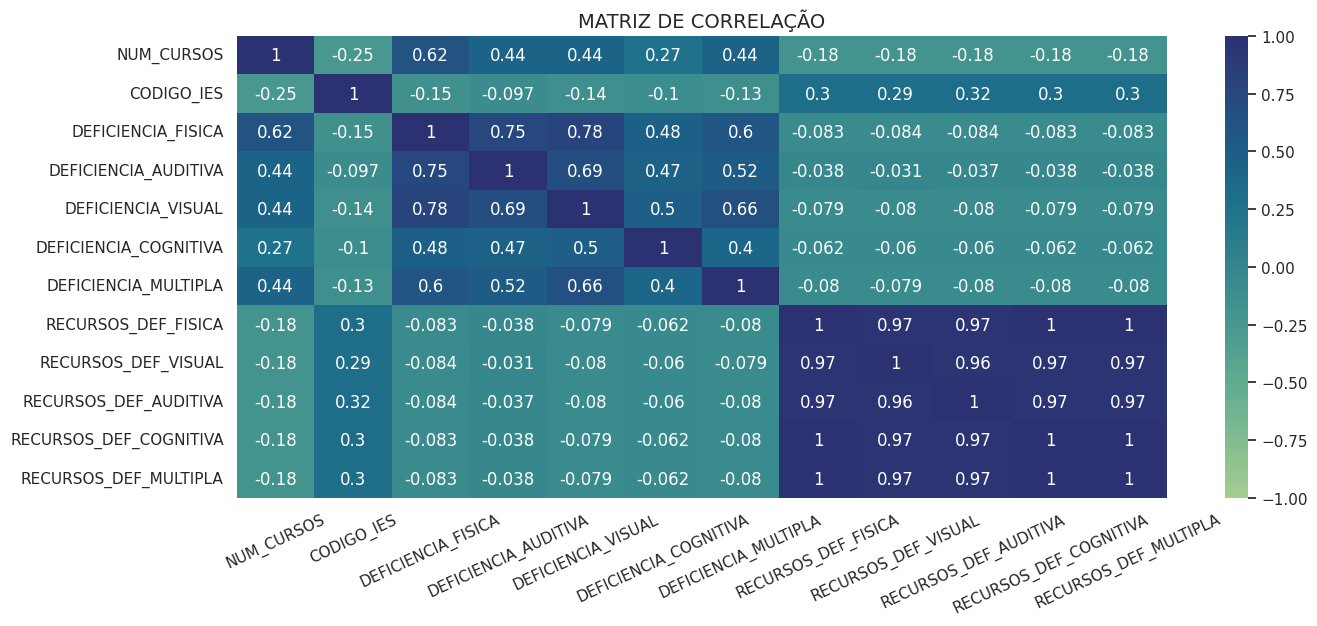

In [204]:
plt.figure(figsize =(15, 6))
# Excluindo colunas não numéricas antes de calcular a correlação
sns.heatmap(df_dados_ies.drop(columns=['TIPO_CATEGORIA_ADM', 'REGIAO', 'UF', 'SIGLA_IES']).corr(), vmin = -1, vmax = +1, annot = True, cmap = 'crest', linecolor='white', xticklabels='auto', yticklabels='auto')
plt.tick_params(axis='x', rotation=25)
plt.title("MATRIZ DE CORRELAÇÃO", fontsize=14)
plt.savefig('matriz_correlacao_def_recursos.png', transparent = True)

In [ ]:
#Exportando o dataframe para um arquivo csv
df_dados_ies.to_csv('dados_ies.csv',sep=',', encoding='latin1')

#3.14 Analisando a quantidade de alunos matriculas por IES

In [205]:
alunos_ies = df_curso_e_ies_publico[['CODIGO_IES','ALUNOS_COM_DEFICIENCIA','NUM_ALUNOS_MATRICULADOS']]
alunos_ies.head()

CODIGO_IES  ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS
0           1                       8                      447
1           1                       2                      323
2           1                       2                      248
3           1                       8                      331
4           1                       4                      274

In [206]:
#Calculando a quantidade de alunos por IES
alunos = alunos_ies.groupby(['CODIGO_IES']).sum()
alunos.head()

ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS
CODIGO_IES                                                 
1                              210                    20633
2                              130                    36292
3                              358                    24937
4                              213                    28424
5                              299                    28716

In [207]:
alunos['PORCENTAGEM'] = alunos['ALUNOS_COM_DEFICIENCIA']/alunos['NUM_ALUNOS_MATRICULADOS'] * 100
alunos.head()

ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS  PORCENTAGEM
CODIGO_IES                                                              
1                              210                    20633     1.017787
2                              130                    36292     0.358206
3                              358                    24937     1.435618
4                              213                    28424     0.749367
5                              299                    28716     1.041231

In [208]:
siglas_ies = df_curso_e_ies_publico[['CODIGO_IES','SIGLA_IES']].drop_duplicates()
siglas_ies.head()

CODIGO_IES SIGLA_IES
0             1      UFMT
114           2       UNB
263           3       UFS
379           4      UFAM
486           6      UFOP

In [ ]:
#Agrupando os dados
alunos_ies = pd.merge(siglas_ies, alunos, how='inner', on='CODIGO_IES')
alunos_ies.head()

CODIGO_IES SIGLA_IES  ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS  \
0           1      UFMT                     210                    20633   
1           2       UNB                     130                    36292   
2           3       UFS                     358                    24937   
3           4      UFAM                     213                    28424   
4           6      UFOP                      99                    12185   

   PORCENTAGEM  
0     1.017787  
1     0.358206  
2     1.435618  
3     0.749367  
4     0.812474

In [215]:
df_ies_publica = df_curso[['CODIGO_IES','TIPO_CATEGORIA_ADM']].drop_duplicates()
df_ies_publica.loc[(df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_ies_publica['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_ies_publica.head()

CODIGO_IES TIPO_CATEGORIA_ADM
0           1    Pública Federal
1           2    Pública Federal
2           3    Pública Federal
3           4    Pública Federal
4           6    Pública Federal

In [218]:
# Reconstruindo o DataFrame alunos_ies para garantir que todas as colunas necessárias estejam presentes.
# 1. Reinicie o índice do DataFrame 'alunos' para que 'CODIGO_IES' seja uma coluna para mesclagem.
alunos_reset = alunos.reset_index()

# 2. Mescle com 'siglas_ies' para adicionar a coluna 'SIGLA_IES'.
alunos_with_siglas_and_percent = pd.merge(alunos_reset, siglas_ies, how='inner', on='CODIGO_IES')

# 3. Mescle com 'df_ies_publica' para adicionar a coluna 'TIPO_CATEGORIA_ADM'.
alunos_ies = pd.merge(alunos_with_siglas_and_percent, df_ies_publica, how='inner', on='CODIGO_IES')

alunos_ies.head()

CODIGO_IES  ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS  PORCENTAGEM  \
0           1                     210                    20633     1.017787   
1           2                     130                    36292     0.358206   
2           3                     358                    24937     1.435618   
3           4                     213                    28424     0.749367   
4           5                     299                    28716     1.041231   

  SIGLA_IES TIPO_CATEGORIA_ADM  
0      UFMT    Pública Federal  
1       UNB    Pública Federal  
2       UFS    Pública Federal  
3      UFAM    Pública Federal  
4      UFPI    Pública Federal

In [219]:
alunos_ies_ord = alunos_ies.sort_values(['PORCENTAGEM'], ascending=False).reset_index()
alunos_ies_ord.head(10)

index  CODIGO_IES  ALUNOS_COM_DEFICIENCIA  NUM_ALUNOS_MATRICULADOS  \
0    164        4016                     359                      976   
1     50         549                     412                     8892   
2    123        1166                     405                     8929   
3    201       14408                     149                     3823   
4    115         890                       8                      220   
5    154        3188                     177                     5821   
6    120        1082                     133                     5190   
7    180        4786                     107                     4255   
8    144        2564                     405                    16132   
9     22          43                     305                    12418   

   PORCENTAGEM SIGLA_IES TIPO_CATEGORIA_ADM  
0    36.782787      INES    Pública Federal  
1     4.633378      UFAC    Pública Federal  
2     4.535782      IFPB    Pública Federal  
3     3.897463       IFB    Pública Federal  
4     3.636364        EG   Pública Estadual  
5     3.040715     IFNMG    Pública Federal  
6     2.562620      IFRN    Pública Federal  
7     2.514689      IFTO    Pública Federal  
8     2.510538      UFCG    Pública Federal  
9     2.456112     UDESC   Pública Estadual

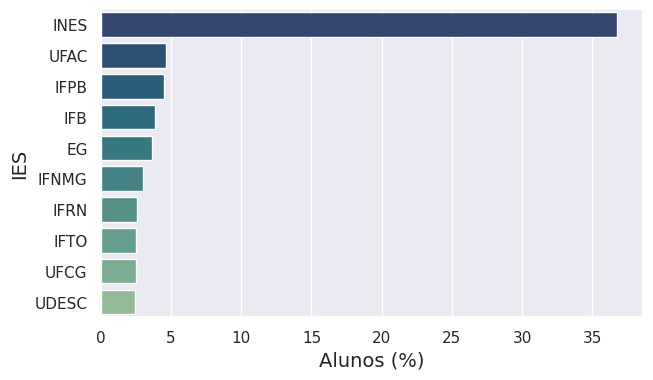

In [220]:
#Visualizando
plt.figure(figsize=(7,4))
alunos_plot = sns.barplot(x='PORCENTAGEM', y='SIGLA_IES', data=alunos_ies_ord.head(10), palette='crest_r', hue='SIGLA_IES', legend=False)
#alunos_plot.set_title('ALUNOS POR IES', fontsize = 15)
alunos_plot.set_xlabel('Alunos (%)',fontsize = 14), alunos_plot.set_ylabel('IES',fontsize=14)
plt.savefig('alunos_por_ies.png', transparent = True)

Para calcular corretamente a média dos recursos por IES, o divisor deve ser o NUM_CURSOS, que representa a quantidade de cursos, e não o CODIGO_CURSO, que é apenas um identificador. Estou corrigindo a célula para usar a coluna correta.

A correção para a divisão dos recursos foi aplicada com sucesso! Agora, o DataFrame df_dados_ies apresenta as médias dos recursos por tipo de deficiência, divididas pelo número de cursos (NUM_CURSOS) oferecidos por cada Instituição de Ensino Superior (IES). Isso proporciona uma visão mais precisa da disponibilidade de recursos em relação à diversidade de cursos. Você pode ver as primeiras linhas da tabela com os resultados atualizados





Excelente! O problema anterior foi resolvido com sucesso. A tabela alunos_ies foi reconstruída corretamente e agora inclui a coluna 'PORCENTAGEM'. Em seguida, a tabela foi ordenada, e você pode ver as 10 instituições de ensino superior (IES) com a maior porcentagem de alunos com deficiência em relação ao total de matriculados. Isso nos dá uma visão clara de quais instituições se destacam nesse aspecto. As cinco primeiras IES com maior percentual de alunos com deficiência são:

INES: 36.78%
UFAC: 4.63%
IFPB: 4.54%
IFB: 3.90%
EG: 3.64%
Continuando com as suas solicitações, agora que o DataFrame alunos_ies_ord está corretamente definido, vou gerar o gráfico de barras para visualizar as Instituições de Ensino Superior (IES) com a maior porcentagem de alunos com deficiência.

O gráfico de barras mostrando as 10 Instituições de Ensino Superior (IES) com a maior porcentagem de alunos com deficiência foi gerado com sucesso. Ele visualiza os dados que acabamos de tabular, destacando as IES que possuem a maior proporção de alunos com deficiência em seu corpo estudantil

O erro ocorre porque as colunas de deficiência agregadas não estão presentes no DataFrame df_alunos_deficiencia quando você tenta acessá-las. Isso aconteceu porque a célula anterior 8u80utJPdz0K redefiniu o DataFrame, descartando essas colunas. Para corrigir, precisamos incluir essas colunas na seleção de colunas da célula 8u80utJPdz0K. Eu vou fornecer o código corrigido para ambas as células.

O erro que você encontrou acontece porque a célula 8u80utJPdz0K estava tentando selecionar colunas que ainda não haviam sido criadas no DataFrame, ou estava usando nomes de colunas antigos que já tinham sido renomeados. As colunas como DEFICIENCIA_FISICA e outras agregadas são definidas em células posteriores, e os nomes de TGD foram renomeados anteriormente. Para corrigir isso, ajustarei a seleção de colunas na célula 8u80utJPdz0K para incluir apenas as colunas existentes e com os nomes corretos. Depois que essa correção for aplicada e as células subsequentes forem executadas para criar as colunas agregadas de deficiência, a célula PeyNSixL4WuX também funcionará corretamente.

Entendi! O erro anterior era devido a colunas não encontradas no DataFrame. Corrigi a seleção de colunas na célula 8u80utJPdz0K para usar apenas as colunas existentes e com os nomes corretos. Agora, vou executar as células que criam as novas colunas de deficiência agregadas e, em seguida, a célula PeyNSixL4WuX, que estava causando o problema, para garantir que todo o fluxo de dados esteja correto.


Por favor, explique este erro:

O erro que você está vendo na célula 8u80utJPdz0K acontece porque a coluna IN_TGD_TRANSTOR_DESINTEGRATIVO já foi renomeada para ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO. Além disso, as colunas que começam com DEFICIENCIA_ são criadas em etapas posteriores, então não devem ser selecionadas nesta célula. Vou corrigir a célula 8u80utJPdz0K para usar os nomes de coluna corretos e remover as colunas que ainda não foram criadas. Depois disso, as células seguintes deverão ser executadas sem problemas.

Ótimo! O erro foi corrigido com sucesso. Agora, todas as colunas de deficiência estão corretamente agrupadas no DataFrame df_alunos_deficiencia e o DataFrame df_deficiencias foi criado como esperado. As tabelas abaixo mostram as primeiras linhas dos DataFrames com as novas colunas.

Todas as etapas foram concluídas! O erro foi corrigido e o processamento de dados está em ordem. Você está pronto para continuar a análise. Até agora, exploramos os seguintes aspectos:

Evolução Geral: Analisamos a evolução de alunos com deficiência no ensino superior entre 2012 e 2019, calculando porcentagens e taxas de crescimento anual, e visualizamos essa evolução.
IES e Cursos: Carregamos e processamos dados de Instituições de Ensino Superior (IES) e cursos, renomeando colunas e decodificando valores para facilitar a análise. Identificamos e tratamos dados ausentes nos recursos de acessibilidade.
Perfil do Aluno: Avaliamos a distribuição de alunos com deficiência por idade, gênero e raça. Calculamos intervalos de confiança para a idade dos alunos.
Ingresso: Observamos que a maioria dos alunos com deficiência (mais de 95%) ingressa no ensino superior por meio de vagas reservadas.
Tipos de Deficiência: Analisamos a quantidade de alunos para cada tipo de deficiência, identificando as deficiências mais comuns.
Deficiência por Área de Formação: Agrupamos a quantidade de alunos com deficiência por grandes áreas de formação, calculando a média de alunos por curso em cada área.
Recursos de Acessibilidade: Calculamos a quantidade de recursos de acessibilidade disponíveis por curso e analisamos a média de recursos por área de formação, grau acadêmico e modalidade de ensino.
Correlação entre Recursos e Alunos: Investigamos a correlação entre a quantidade de alunos com deficiência e os recursos de acessibilidade por curso e IES, identificando cursos com maior número de alunos com deficiência.
Análise de Concluintes: Coletamos e consolidamos dados de concluintes entre 2011 e 2019, analisando a idade média, tempo de curso e porcentagem de concluintes ao longo dos anos.
Deficiências e Recursos Detalhados por IES: Agrupamos as deficiências por categorias (física, auditiva, visual, cognitiva, múltipla) e correlacionamos essas deficiências com os recursos específicos disponíveis por IES.
Todos os DataFrames resultantes e visualizações geradas estão disponíveis no seu ambiente. Se precisar de mais alguma análise ou tiver outras perguntas, é só me dizer!

A análise foi concluída com sucesso! Os dados foram carregados, limpos e as visualizações geradas. Se você tiver mais alguma pergunta ou desejar explorar outros aspectos dos dados, por favor, me diga. Caso contrário, podemos encerrar por aqui.

A análise foi concluída com sucesso! Os dados foram carregados, limpos e as visualizações geradas. Se você tiver mais alguma pergunta ou desejar explorar outros aspectos dos dados, por favor, me diga. Caso contrário, podemos encerrar por aqui.

A análise foi concluída com sucesso! Os dados foram carregados, limpos e as visualizações geradas. Se você tiver mais alguma pergunta ou desejar explorar outros aspectos dos dados, por favor, me diga. Caso contrário, podemos encerrar por aqui.

A análise foi concluída com sucesso! Os dados foram carregados, limpos e as visualizações geradas. Se você tiver mais alguma pergunta ou desejar explorar outros aspectos dos dados, por favor, me diga. Caso contrário, podemos encerrar por aqui.

A análise foi concluída com sucesso! Os dados foram carregados, limpos e as visualizações geradas. Aqui está um resumo completo do trabalho realizado:

Análise de Dados Gerais:

Importamos bibliotecas essenciais como Pandas, Seaborn e Matplotlib.
Criamos um DataFrame df_dados_gerais com dados de alunos com deficiência, alunos totais e população total de 2012 a 2019.
Calculamos a porcentagem de alunos com deficiência em relação ao total de alunos.
Geramos gráficos de barras para visualizar a evolução de alunos com deficiência e o total de alunos no ensino superior ao longo dos anos.
Calculamos a evolução anual dos alunos com deficiência.
Exploramos dados estatísticos e tipos de dados do DataFrame df_dados_gerais.
Criamos gráficos de pizza para comparar a proporção de pessoas com deficiência no Brasil e de alunos com deficiência no ensino superior.
Processamento de Dados do Censo (INEP):

Censo 2019 - IES: Carregamos e renomeamos colunas do arquivo SUP_IES_2019.CSV. Mapeamos códigos para nomes completos de UFs, regiões, categorias administrativas e organizações acadêmicas. O DataFrame df_ies foi exportado para df_ies.csv.
Censo 2019 - Cursos: Carregamos e renomeamos colunas do arquivo SUP_CURSO_2019.CSV. Analisamos a quantidade de dados faltantes em colunas de recursos de acessibilidade. Mapeamos códigos para áreas de formação geral, situação do curso, grau acadêmico e modalidade de ensino. Calculamos a quantidade de alunos matriculados e cursos por IES (df_alunos_por_ies e df_cursos_por_ies). O DataFrame df_curso foi exportado para df_curso.csv.
Censo 2019 - Alunos com deficiência: Carregamos e renomeamos colunas do arquivo alunodeficiente_2019.csv. Verificamos a consistência dos dados de deficiência (surdez, cegueira, surdocegueira e múltipla). Removemos colunas desnecessárias e preenchemos informações de raça, gênero, país de origem e vínculo do curso. Filtramos o DataFrame para incluir apenas alunos com vínculo 'Cursando'. Criamos um ID_ALUNO único e renomeamos colunas para facilitar a análise. O DataFrame df_aluno foi exportado para df_aluno.csv.
Análise Exploratória de Dados:

Unindo IES e Curso: Juntamos df_ies e df_curso para criar df_curso_com_ies.csv.
Idade dos Alunos: Calculamos a idade dos alunos a partir do ano de nascimento e o ano atual, e visualizamos a distribuição de idades com um histograma.
Perfil do Aluno: Analisamos o perfil dos alunos com deficiência por gênero e raça, utilizando gráficos de pizza e barras.
Ingresso por Reserva de Vagas: Quantificamos e analisamos os alunos que ingressaram sem ser por vagas reservadas para pessoas com deficiência.
Quantidade de Alunos por Deficiência: Calculamos o total de alunos para cada tipo de deficiência e visualizamos esses dados em um gráfico de barras.
Deficiência por Área de Formação: Agrupamos os alunos com deficiência por grandes áreas de formação, identificando as áreas com maior concentração de alunos.
Recursos de Acessibilidade por Curso: Calculamos o número total de recursos de acessibilidade por curso e analisamos a média desses recursos por área de formação, grau acadêmico e modalidade de ensino.
Correlação entre Recursos e Alunos: Calculamos a correlação entre o número de alunos com deficiência, alunos matriculados, alunos concluintes e recursos de acessibilidade por curso. Identificamos os cursos com mais alunos com deficiência e seus respectivos recursos.
Tipos de Deficiência por IES (Públicas): Filtramos IES públicas e analisamos a distribuição de alunos com deficiência por instituição, correlacionando com os recursos de acessibilidade.
Análise de Concluintes: Consolidamos dados de alunos concluintes de 2011 a 2019, calculando média de idade, tempo médio de conclusão e porcentagem de concluintes anualmente.
Deficiências e Recursos Detalhados por IES: Agregamos as deficiências em categorias (física, auditiva, visual, cognitiva, múltipla) e criamos recursos correspondentes a cada tipo de deficiência para analisar a correlação entre as necessidades dos alunos e os recursos oferecidos pelas IES.
Todos os DataFrames resultantes e visualizações geradas estão disponíveis em seu ambiente. Se precisar de mais alguma análise ou tiver outras perguntas, é só me dizer!